In [81]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot') # Choice of style 'ggplot' 

# Make plot for retina display
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina') 

In [82]:
pd.set_option("display.max_colwidth",999)
pd.set_option("display.max_rows",999)
pd.set_option("display.max_columns",999)

In [83]:
col_description = pd.read_csv('data/HomeCredit_columns_description.csv',
                              index_col=0,encoding='cp1252')

def col_name(name, col_description=col_description):
    values = col_description[col_description['Row'] == name]['Description'].values
    print(name + ': \n')
    for i in values:
        print (i+'\n')
    table = col_description[col_description['Row'] == name]['Table'].values
    print('Table: {}\n'.format(table))

In [84]:
def plot_data(col_name, df, numeric=True):
    if numeric:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
        sns.boxplot(df[col_name], ax=ax1);
        sns.distplot(df[col_name].dropna(), ax=ax2);
        plt.show();
    else:
        plt.figure(figsize=(10,4))
        sns.countplot(x=col, data=df, orient='h',
                      order = pct.index, alpha=.7)
        plt.show()

# Main Table : application_{train|test}.csv

- This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
- Static data for all applications. One row represents one loan in our data sample.

In [85]:
application_train = pd.read_csv('data/application_train.csv.zip') 

Missing value information

In [86]:
# checking missing data
total = application_train.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(20)

Total    Percent
COMMONAREA_MEDI           214865  69.872297
COMMONAREA_AVG            214865  69.872297
COMMONAREA_MODE           214865  69.872297
NONLIVINGAPARTMENTS_MODE  213514  69.432963
NONLIVINGAPARTMENTS_MEDI  213514  69.432963
NONLIVINGAPARTMENTS_AVG   213514  69.432963
FONDKAPREMONT_MODE        210295  68.386172
LIVINGAPARTMENTS_MEDI     210199  68.354953
LIVINGAPARTMENTS_MODE     210199  68.354953
LIVINGAPARTMENTS_AVG      210199  68.354953
FLOORSMIN_MEDI            208642  67.848630
FLOORSMIN_MODE            208642  67.848630
FLOORSMIN_AVG             208642  67.848630
YEARS_BUILD_MEDI          204488  66.497784
YEARS_BUILD_AVG           204488  66.497784
YEARS_BUILD_MODE          204488  66.497784
OWN_CAR_AGE               202929  65.990810
LANDAREA_MODE             182590  59.376738
LANDAREA_AVG              182590  59.376738
LANDAREA_MEDI             182590  59.376738

In [87]:
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

## Numeric Features Summary

### Every feature is described as follow:

```
Column Name
Column Name Explaination
Source table
Missing values information
Summary statistics
Boxplot & histogram (for numeric features)
Barplot (for categorical features)
```


SK_ID_CURR: 

ID of loan in our sample

ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau 

ID of loan in our sample

ID of loan in our sample

ID of loan in our sample

ID of loan in our sample

Table: ['application_{train|test}.csv' 'bureau.csv' 'POS_CASH_balance.csv'
 'credit_card_balance.csv' 'previous_application.csv'
 'installments_payments.csv']

Missing values:
Total      0.0
Percent    0.0
Name: SK_ID_CURR, dtype: float64

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64


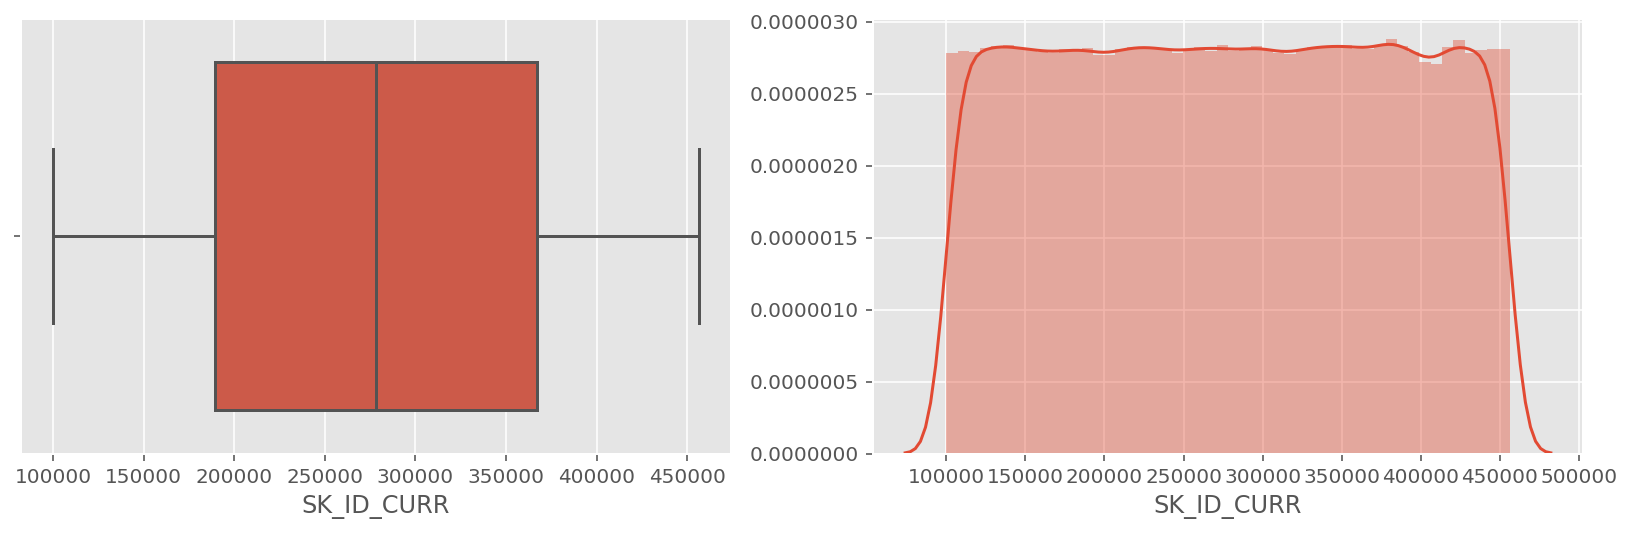

AMT_INCOME_TOTAL: 

Income of the client

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: AMT_INCOME_TOTAL, dtype: float64

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


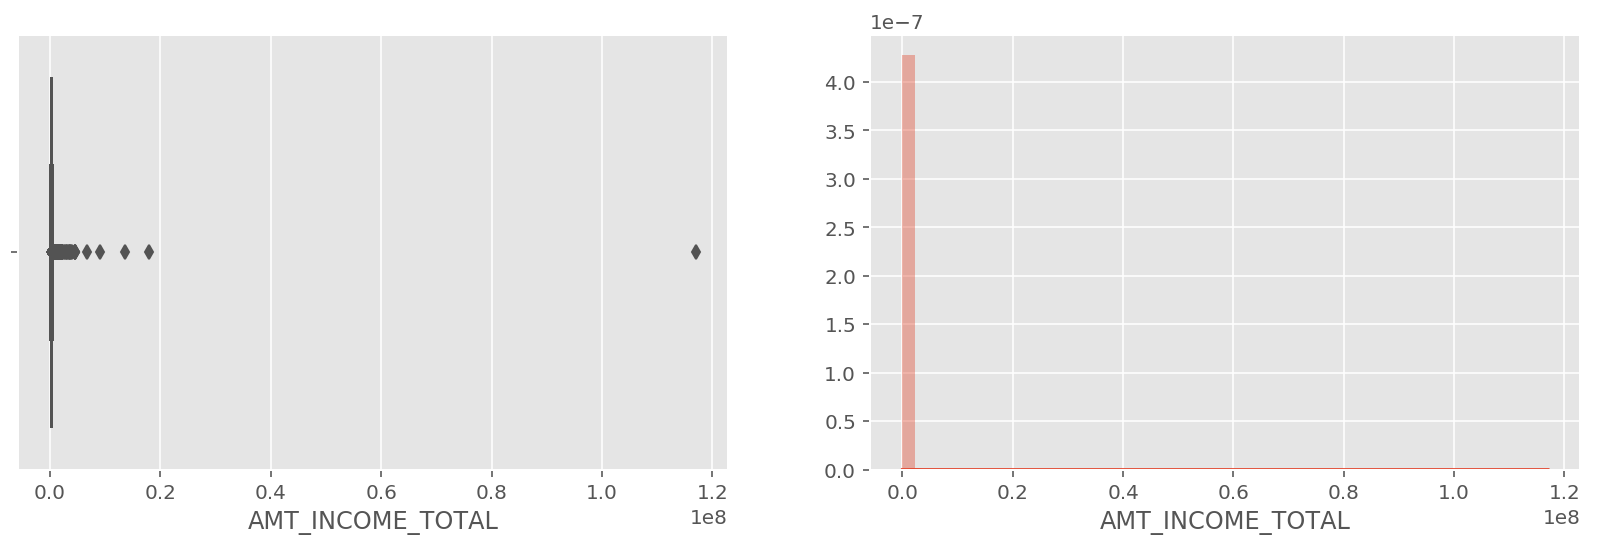

AMT_CREDIT: 

Credit amount of the loan

Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT

Table: ['application_{train|test}.csv' 'previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: AMT_CREDIT, dtype: float64

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


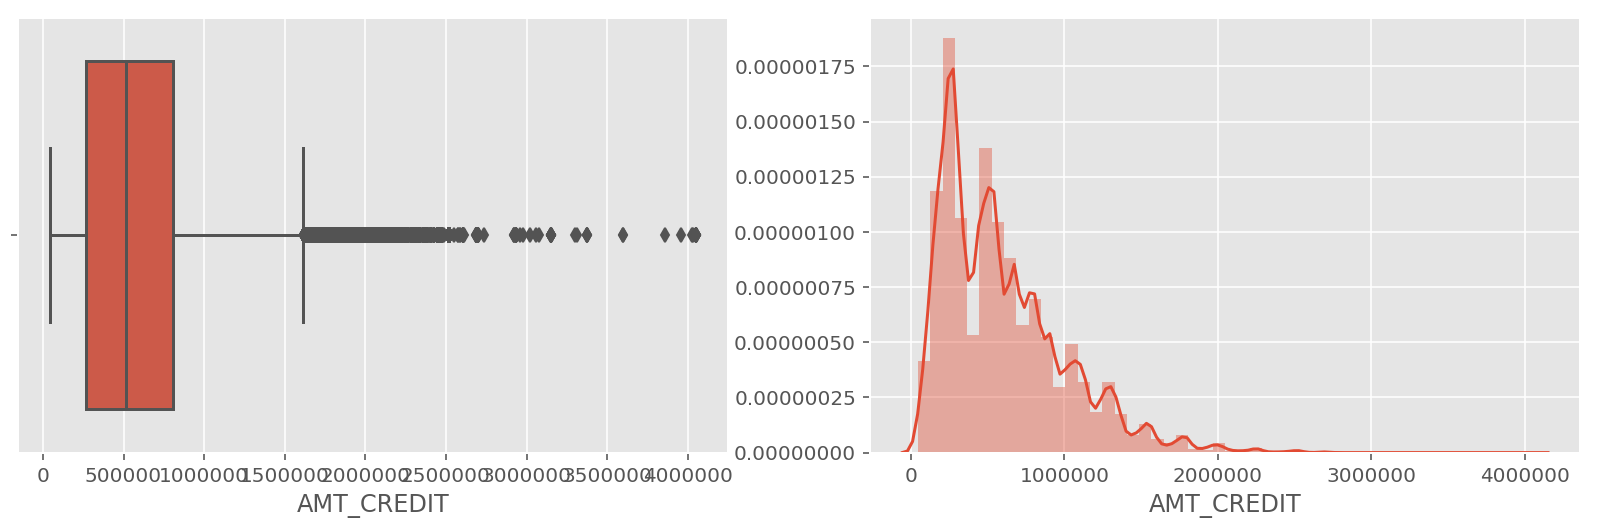

AMT_ANNUITY: 

Loan annuity

Annuity of the Credit Bureau credit

Annuity of previous application

Table: ['application_{train|test}.csv' 'bureau.csv' 'previous_application.csv']

Missing values:
Total      12.000000
Percent     0.003902
Name: AMT_ANNUITY, dtype: float64

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


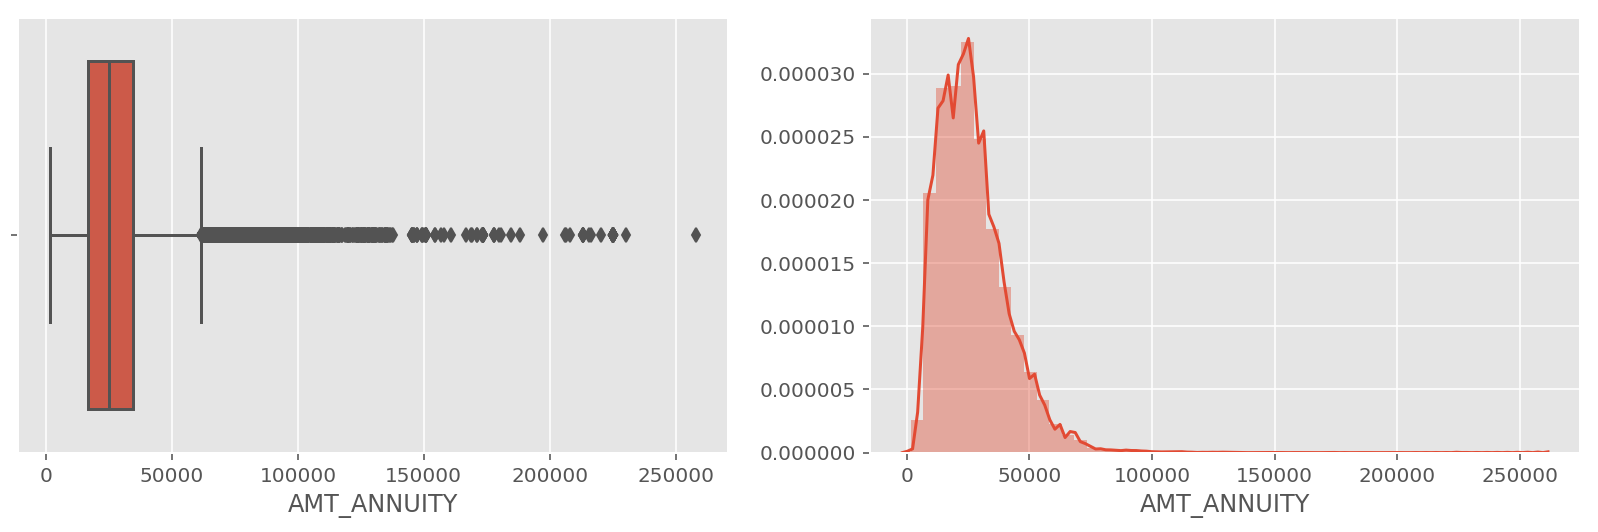

AMT_GOODS_PRICE: 

For consumer loans it is the price of the goods for which the loan is given

Goods price of good that client asked for (if applicable) on the previous application

Table: ['application_{train|test}.csv' 'previous_application.csv']

Missing values:
Total      278.000000
Percent      0.090403
Name: AMT_GOODS_PRICE, dtype: float64

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


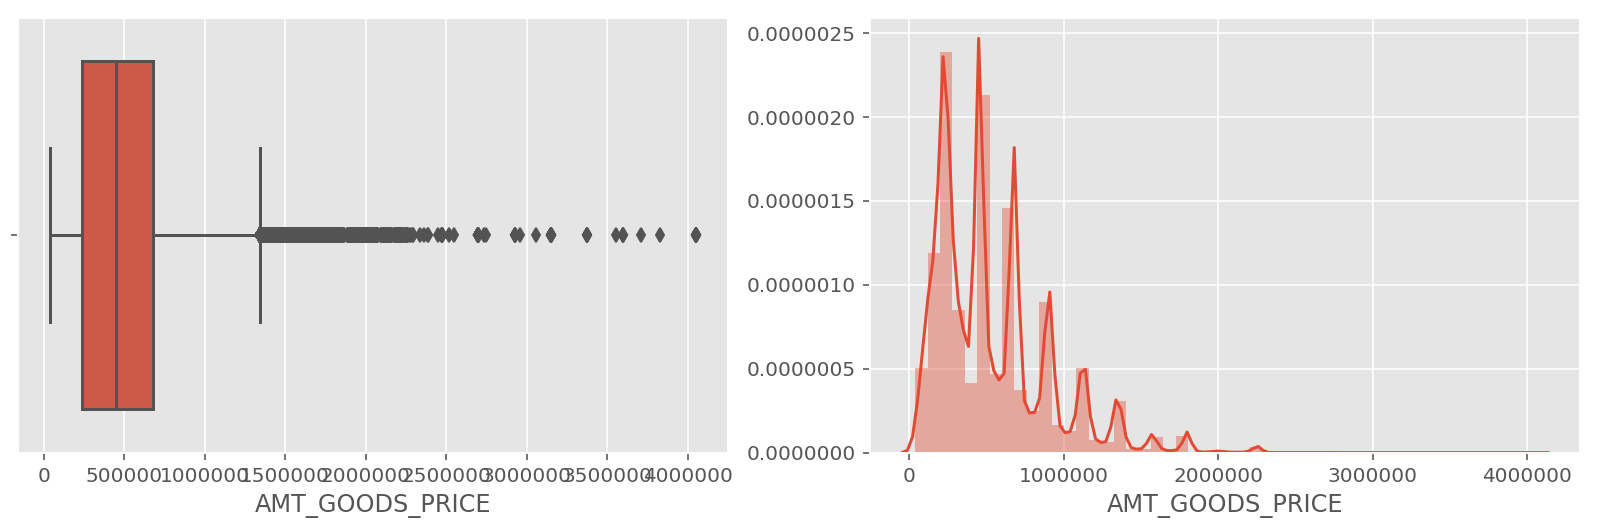

REGION_POPULATION_RELATIVE: 

Normalized population of region where client lives (higher number means the client lives in more populated region)

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: REGION_POPULATION_RELATIVE, dtype: float64

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


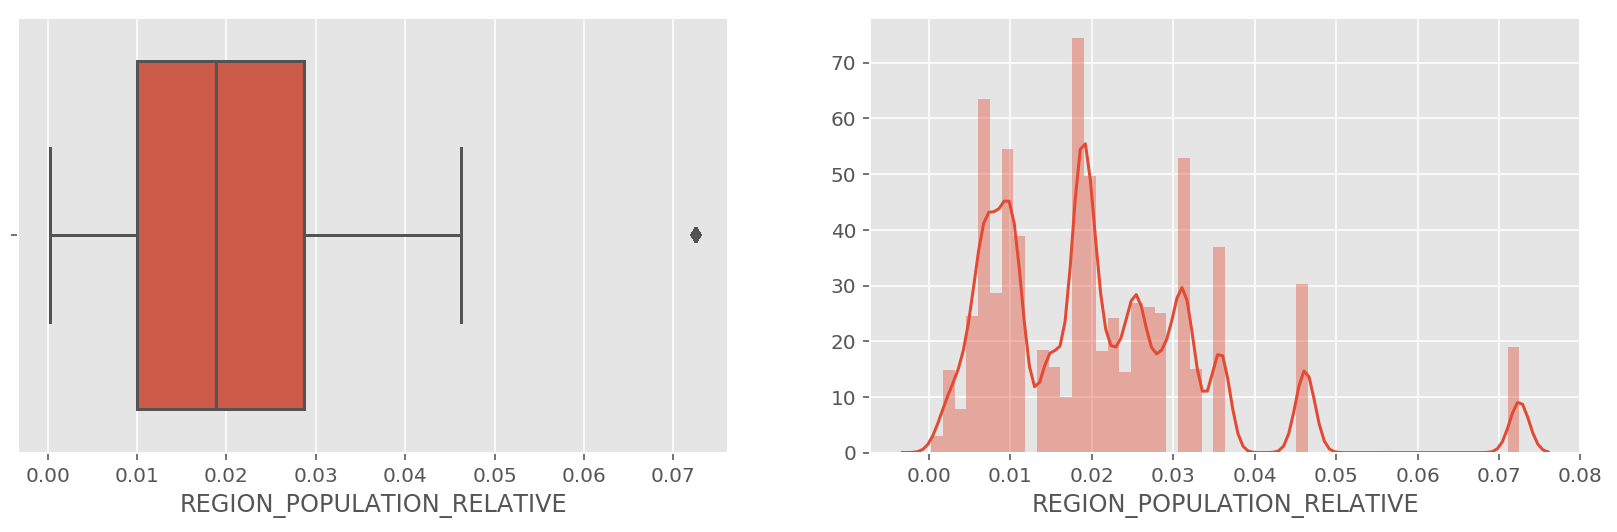

DAYS_BIRTH: 

Client's age in days at the time of application

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: DAYS_BIRTH, dtype: float64

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64


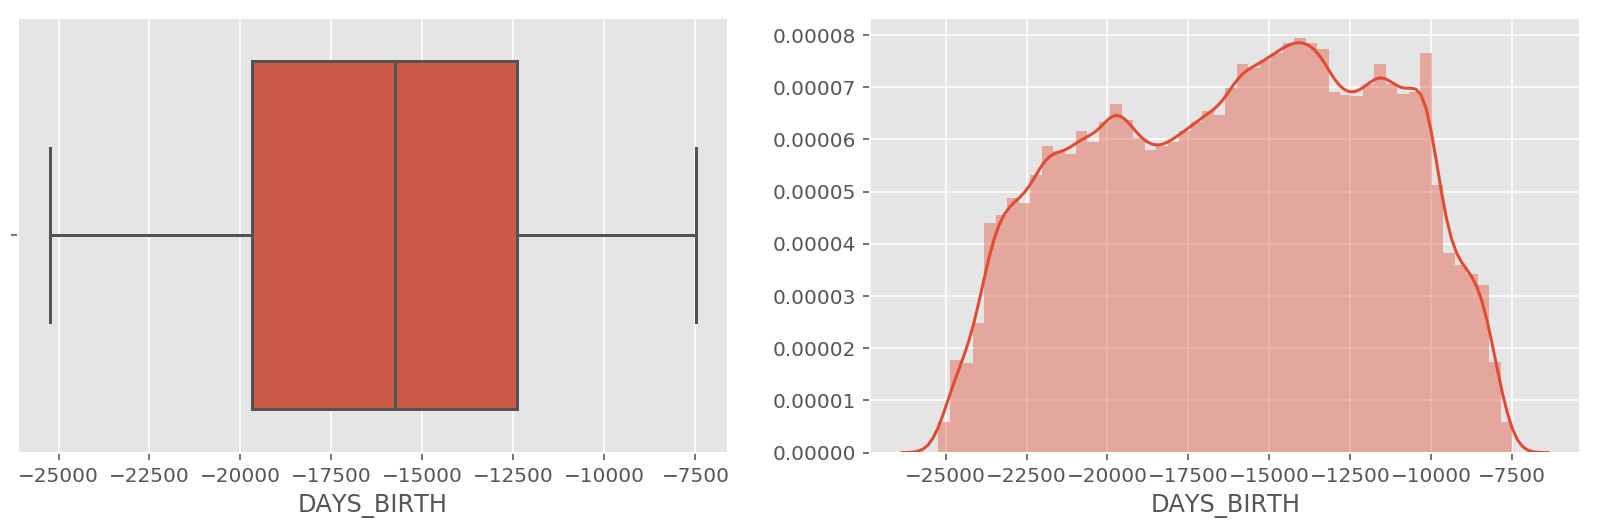

DAYS_EMPLOYED: 

How many days before the application the person started current employment

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: DAYS_EMPLOYED, dtype: float64

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


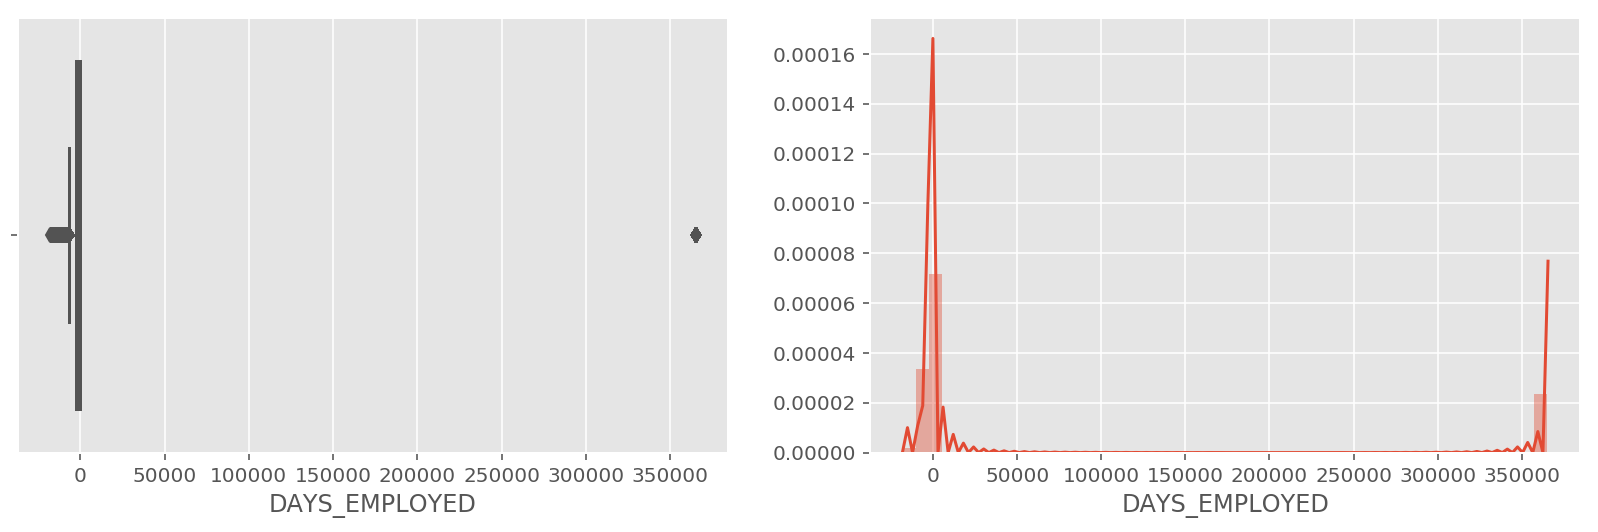

DAYS_REGISTRATION: 

How many days before the application did client change his registration

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: DAYS_REGISTRATION, dtype: float64

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64


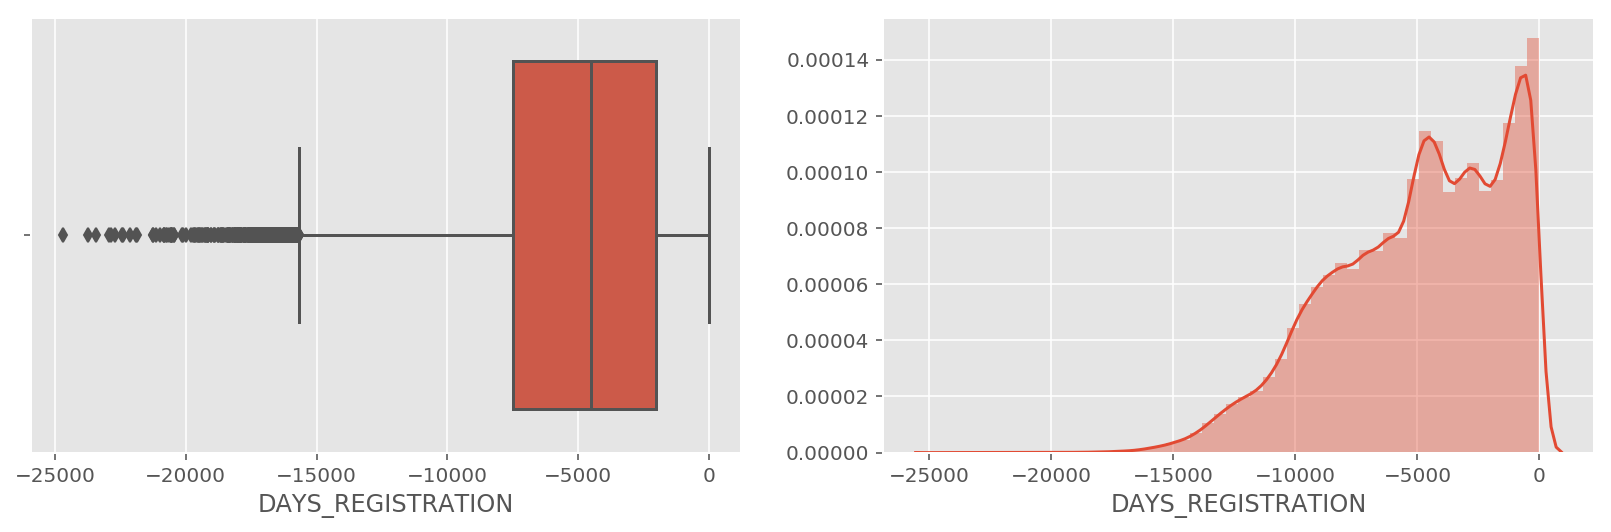

DAYS_ID_PUBLISH: 

How many days before the application did client change the identity document with which he applied for the loan

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: DAYS_ID_PUBLISH, dtype: float64

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64


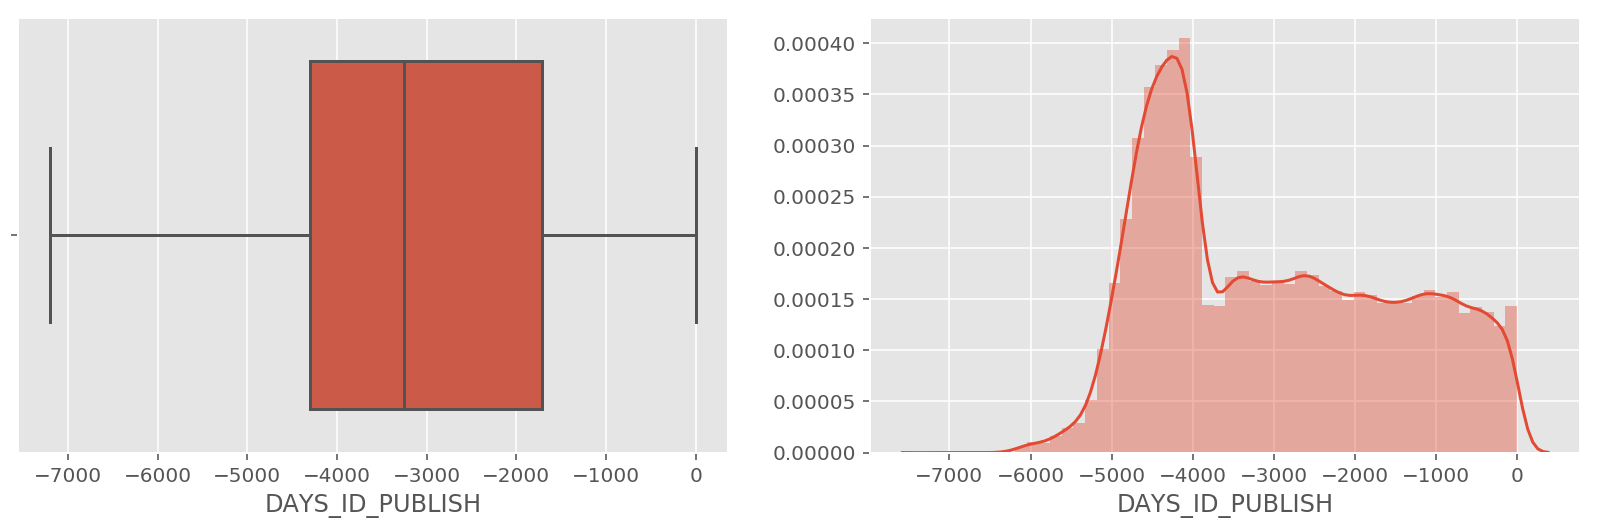

OWN_CAR_AGE: 

Age of client's car

Table: ['application_{train|test}.csv']

Missing values:
Total      202929.00000
Percent        65.99081
Name: OWN_CAR_AGE, dtype: float64

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64


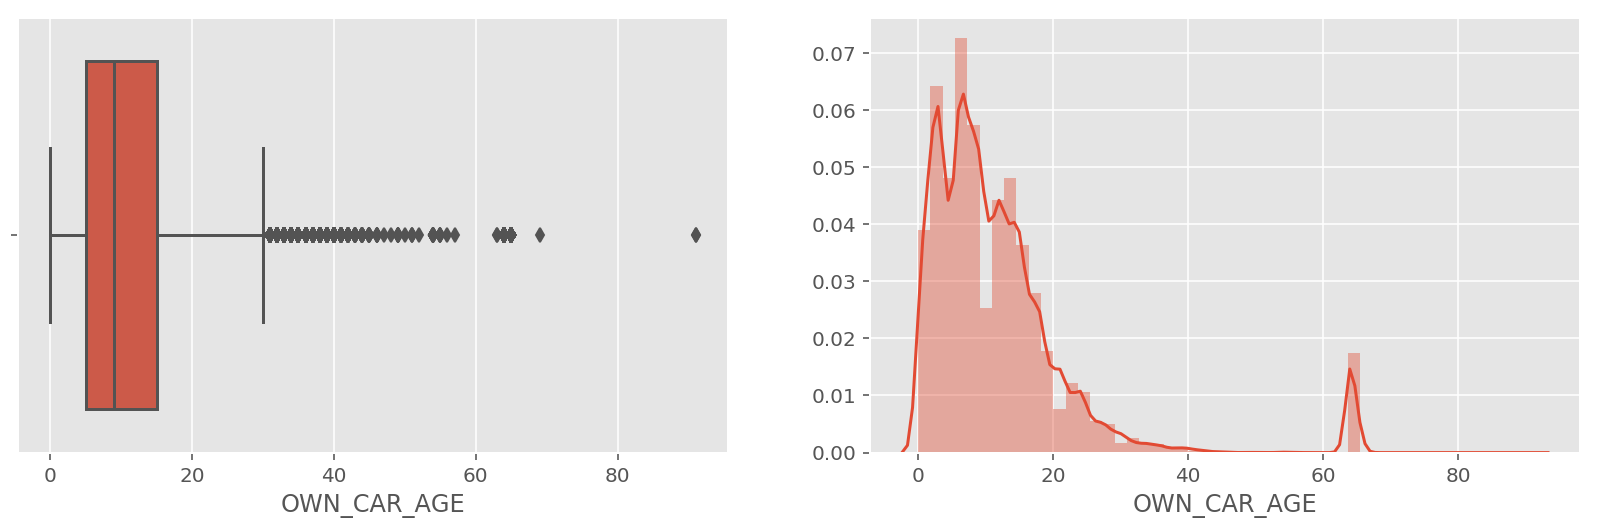

HOUR_APPR_PROCESS_START: 

Approximately at what hour did the client apply for the loan

Approximately at what day hour did the client apply for the previous application

Table: ['application_{train|test}.csv' 'previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: HOUR_APPR_PROCESS_START, dtype: float64

count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


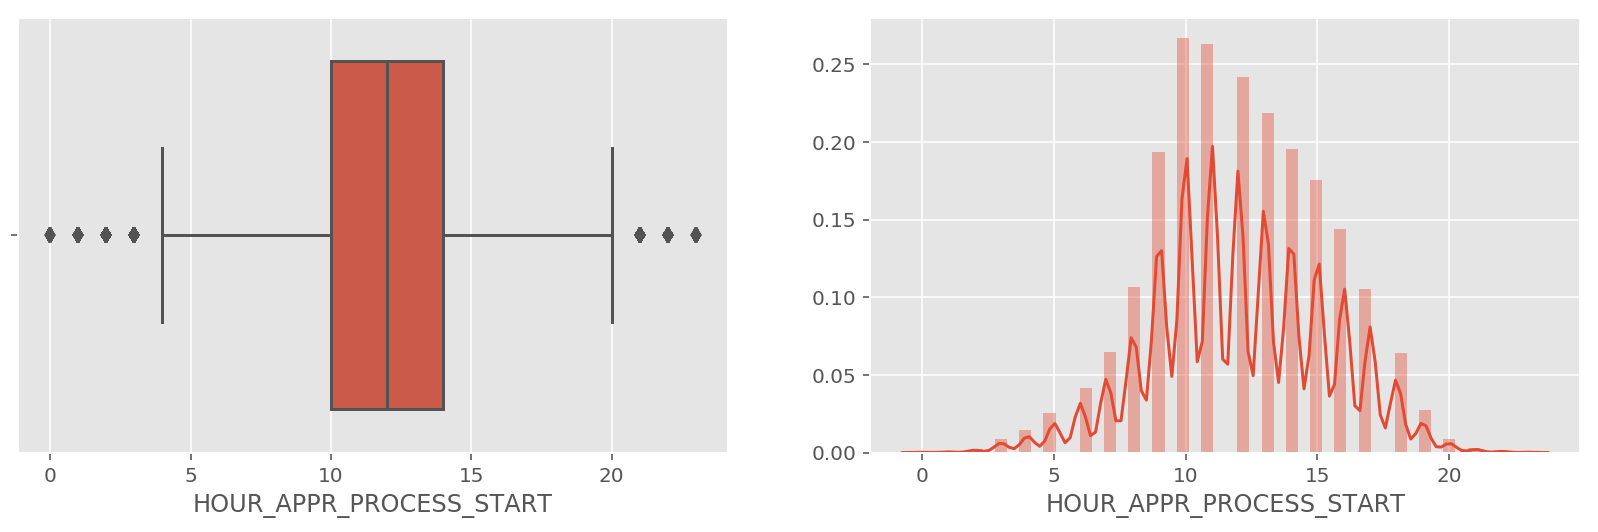

EXT_SOURCE_1: 

Normalized score from external data source

Table: ['application_{train|test}.csv']

Missing values:
Total      173378.000000
Percent        56.381073
Name: EXT_SOURCE_1, dtype: float64

count    134133.000000
mean          0.502130
std           0.211062
min           0.014568
25%           0.334007
50%           0.505998
75%           0.675053
max           0.962693
Name: EXT_SOURCE_1, dtype: float64


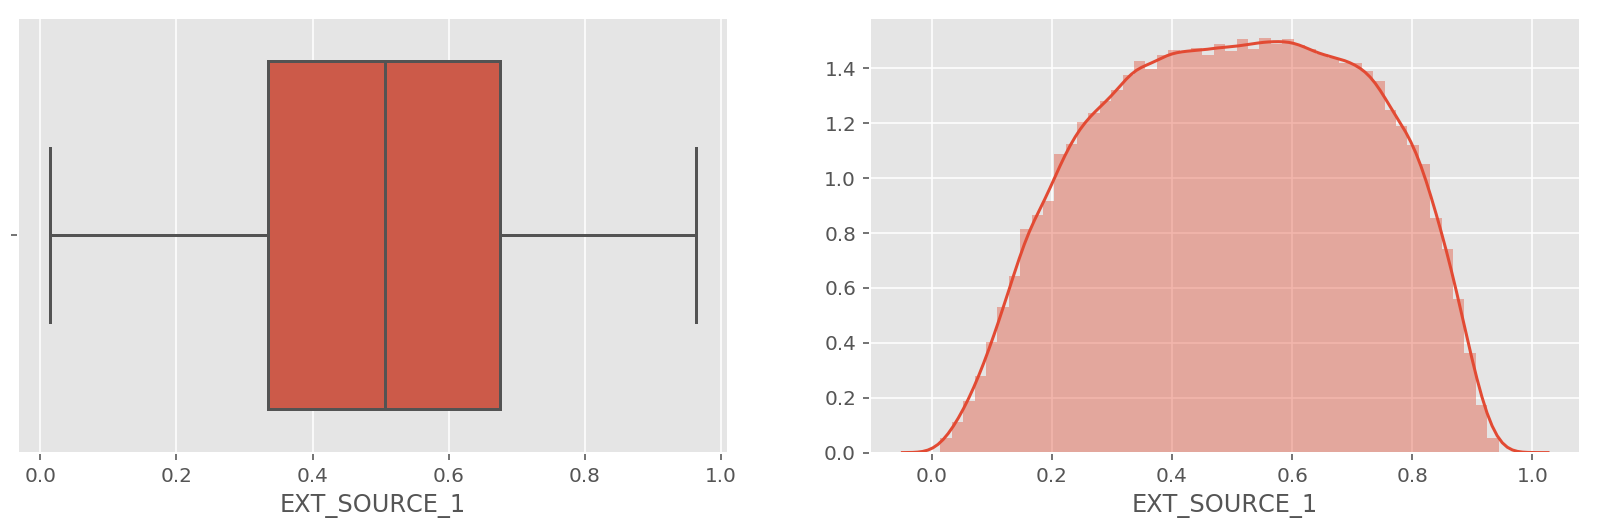

EXT_SOURCE_2: 

Normalized score from external data source

Table: ['application_{train|test}.csv']

Missing values:
Total      660.000000
Percent      0.214626
Name: EXT_SOURCE_2, dtype: float64

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


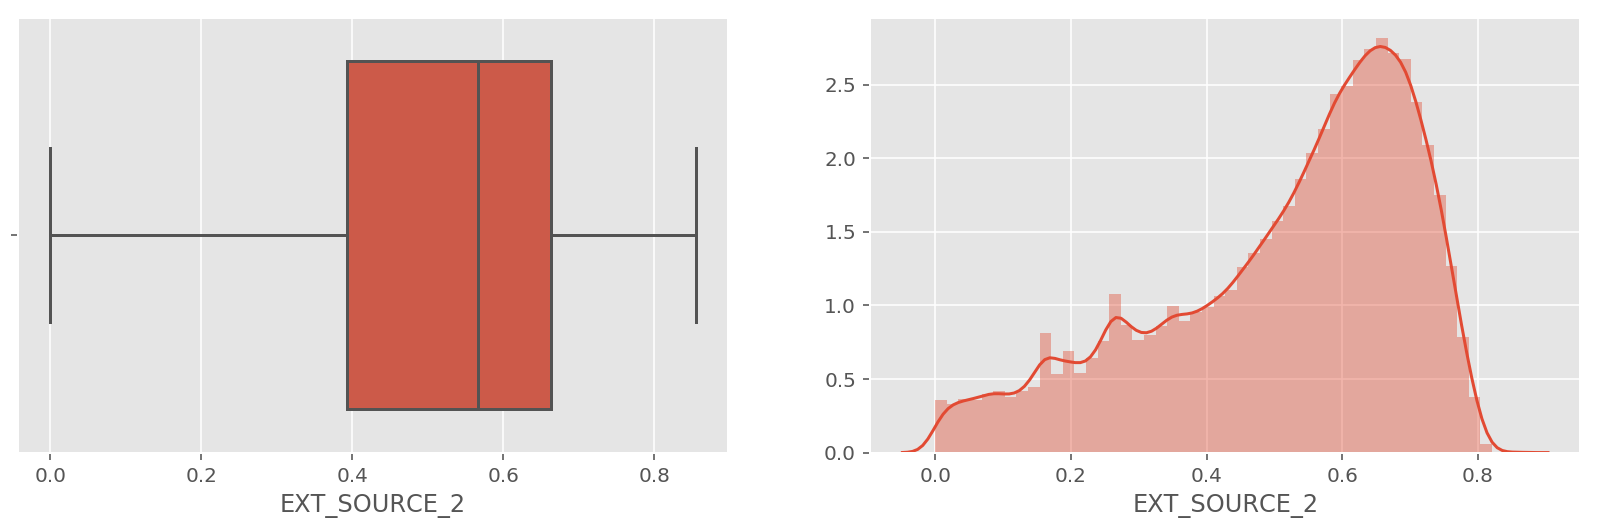

EXT_SOURCE_3: 

Normalized score from external data source

Table: ['application_{train|test}.csv']

Missing values:
Total      60965.000000
Percent       19.825307
Name: EXT_SOURCE_3, dtype: float64

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


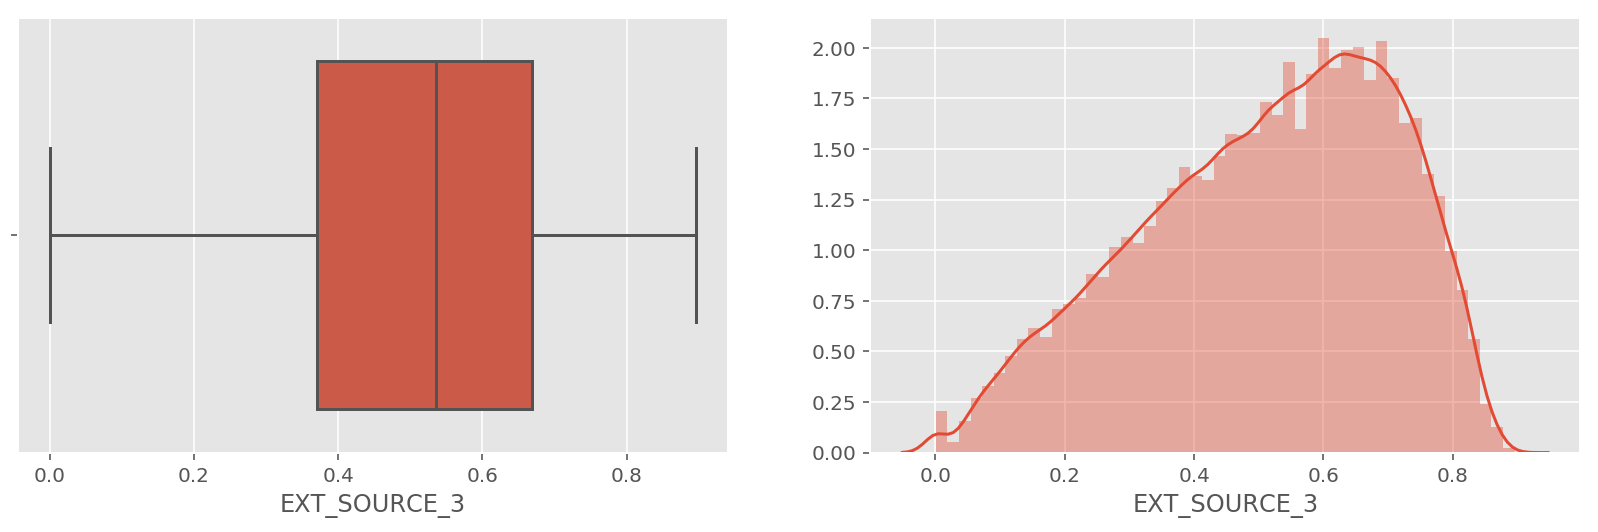

APARTMENTS_AVG: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      156061.000000
Percent        50.749729
Name: APARTMENTS_AVG, dtype: float64

count    151450.00000
mean          0.11744
std           0.10824
min           0.00000
25%           0.05770
50%           0.08760
75%           0.14850
max           1.00000
Name: APARTMENTS_AVG, dtype: float64


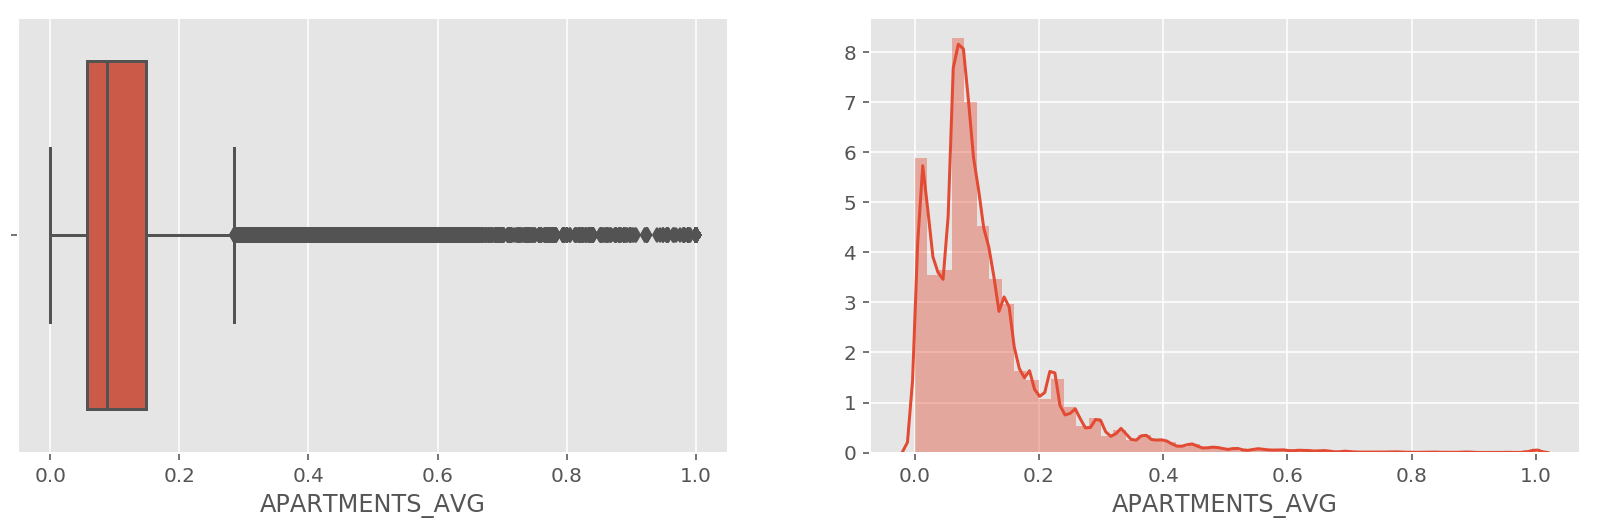

BASEMENTAREA_AVG: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      179943.000000
Percent        58.515956
Name: BASEMENTAREA_AVG, dtype: float64

count    127568.000000
mean          0.088442
std           0.082438
min           0.000000
25%           0.044200
50%           0.076300
75%           0.112200
max           1.000000
Name: BASEMENTAREA_AVG, dtype: float64


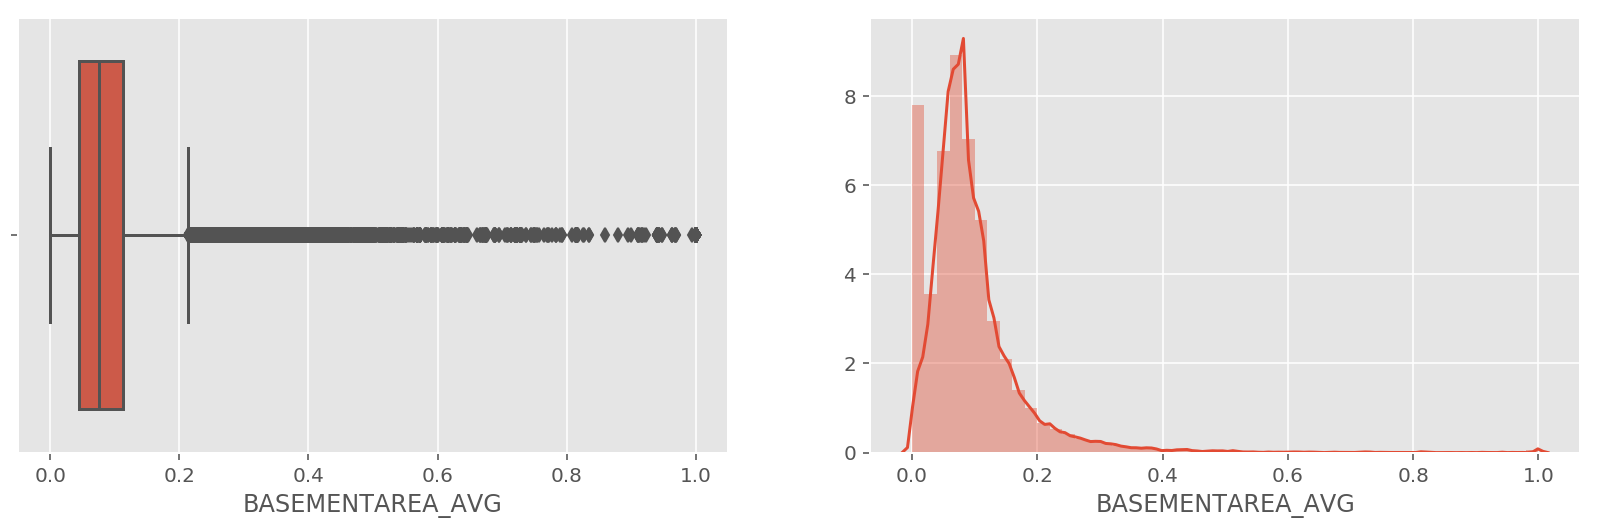

YEARS_BEGINEXPLUATATION_AVG: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      150007.000000
Percent        48.781019
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

count    157504.000000
mean          0.977735
std           0.059223
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64


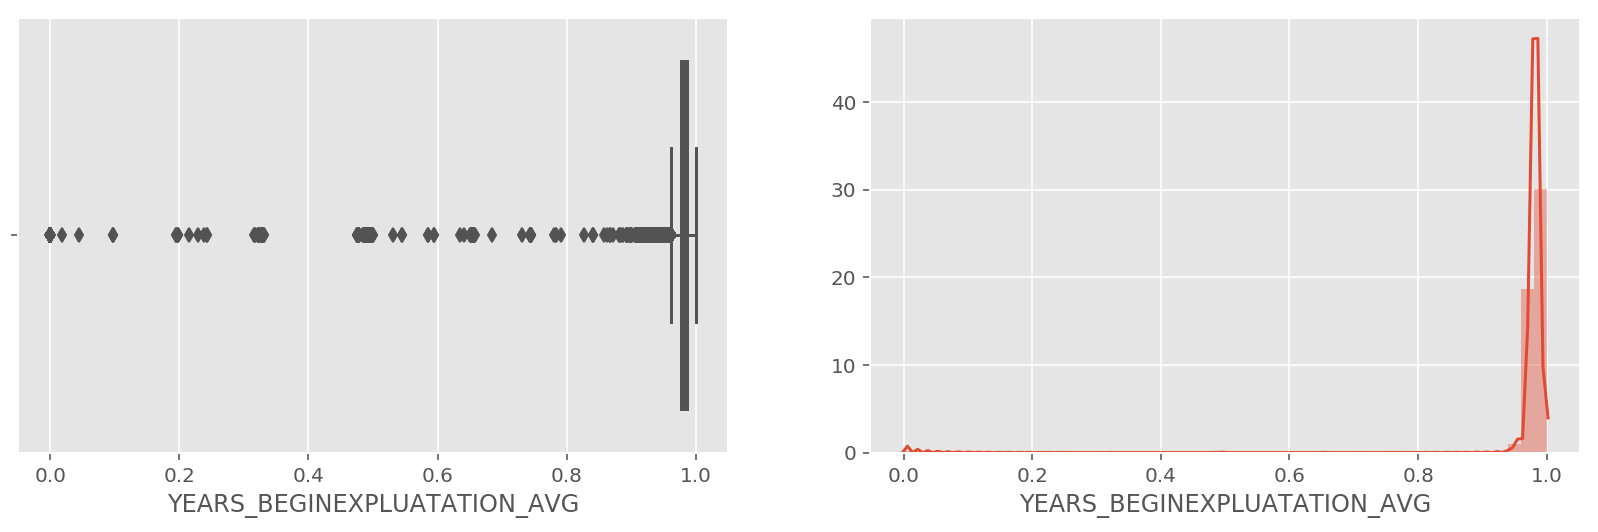

YEARS_BUILD_AVG: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      204488.000000
Percent        66.497784
Name: YEARS_BUILD_AVG, dtype: float64

count    103023.000000
mean          0.752471
std           0.113280
min           0.000000
25%           0.687200
50%           0.755200
75%           0.823200
max           1.000000
Name: YEARS_BUILD_AVG, dtype: float64


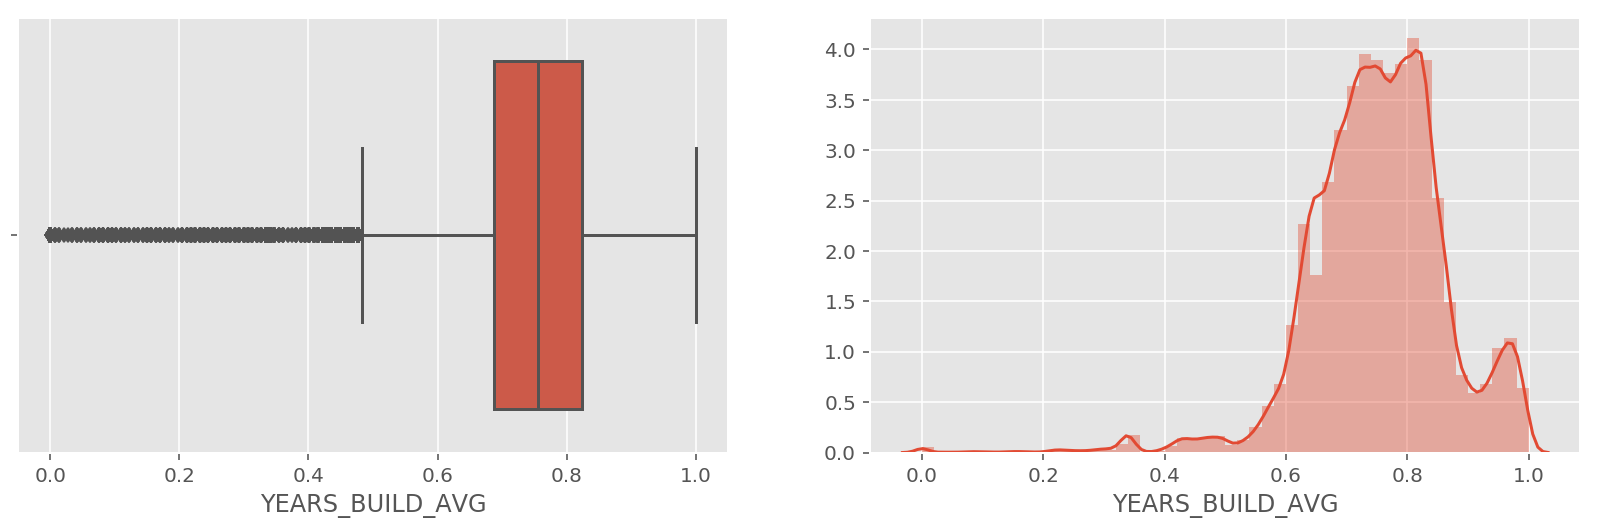

COMMONAREA_AVG: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      214865.000000
Percent        69.872297
Name: COMMONAREA_AVG, dtype: float64

count    92646.000000
mean         0.044621
std          0.076036
min          0.000000
25%          0.007800
50%          0.021100
75%          0.051500
max          1.000000
Name: COMMONAREA_AVG, dtype: float64


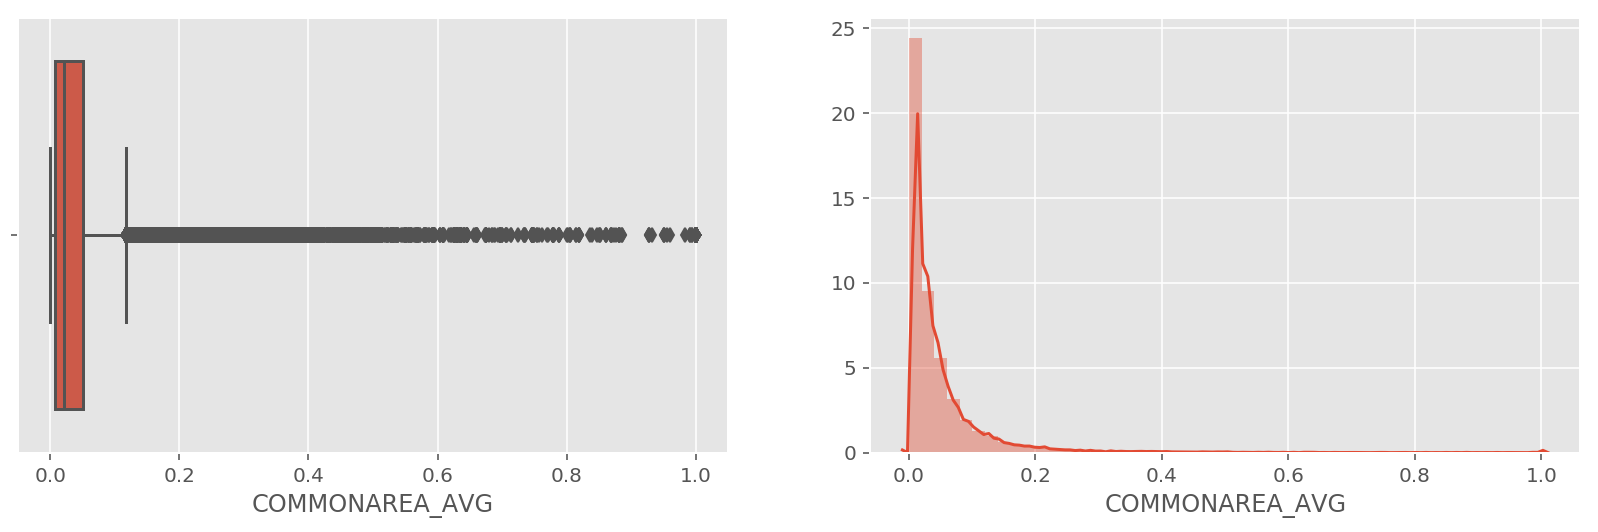

ELEVATORS_AVG: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      163891.00000
Percent        53.29598
Name: ELEVATORS_AVG, dtype: float64

count    143620.000000
mean          0.078942
std           0.134576
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120000
max           1.000000
Name: ELEVATORS_AVG, dtype: float64


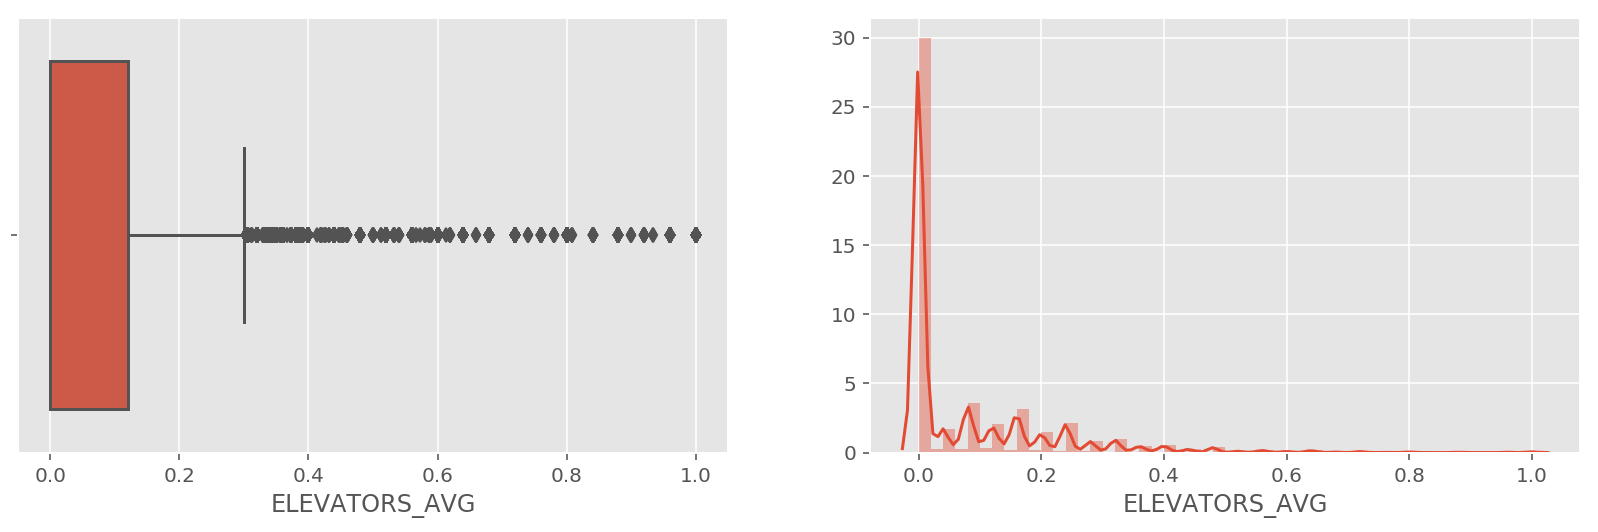

ENTRANCES_AVG: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      154828.000000
Percent        50.348768
Name: ENTRANCES_AVG, dtype: float64

count    152683.000000
mean          0.149725
std           0.100049
min           0.000000
25%           0.069000
50%           0.137900
75%           0.206900
max           1.000000
Name: ENTRANCES_AVG, dtype: float64


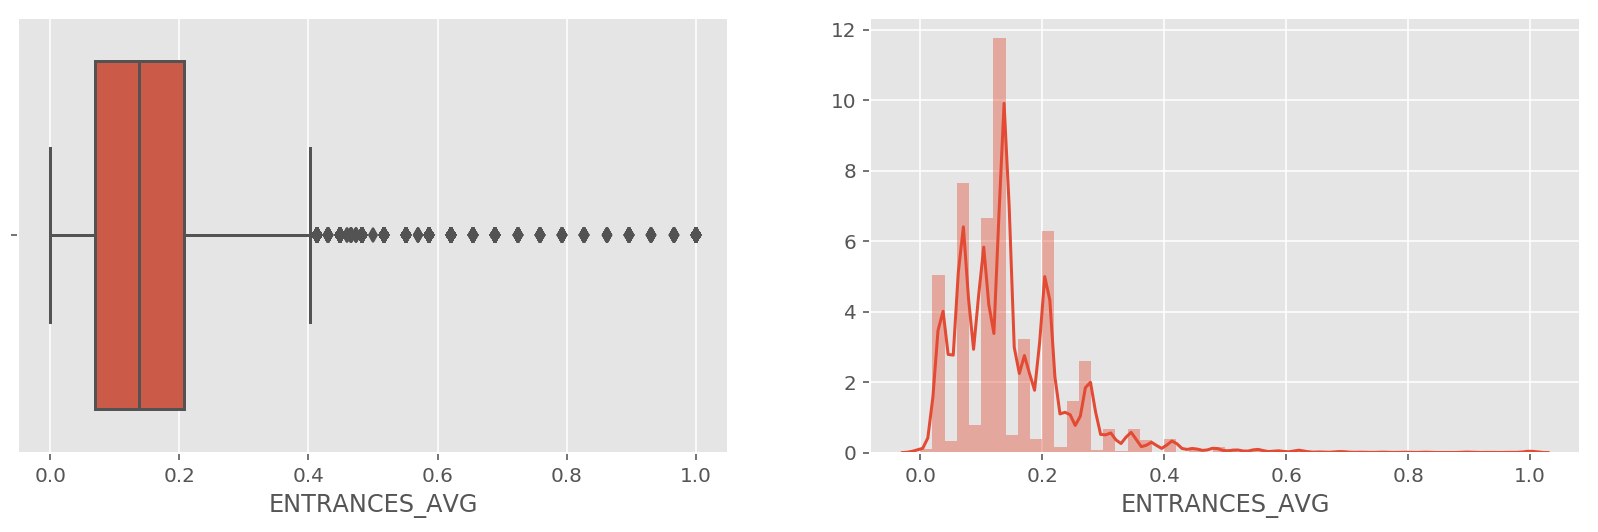

FLOORSMAX_AVG: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      153020.000000
Percent        49.760822
Name: FLOORSMAX_AVG, dtype: float64

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64


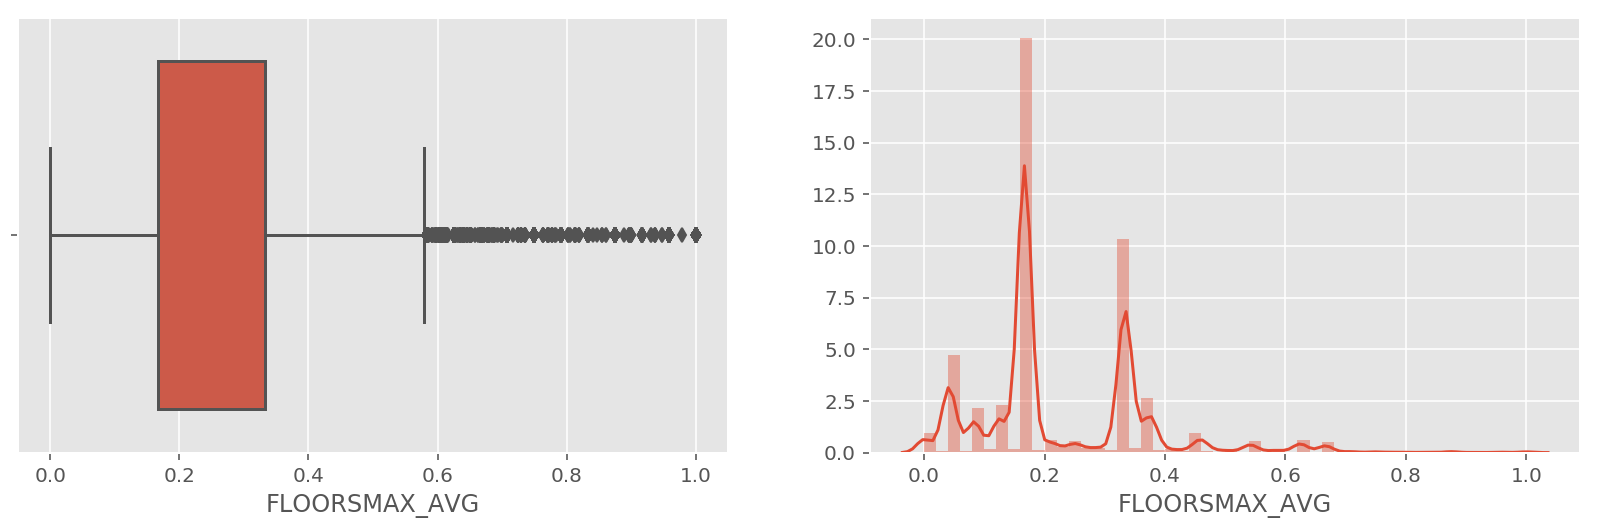

FLOORSMIN_AVG: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      208642.00000
Percent        67.84863
Name: FLOORSMIN_AVG, dtype: float64

count    98869.000000
mean         0.231894
std          0.161380
min          0.000000
25%          0.083300
50%          0.208300
75%          0.375000
max          1.000000
Name: FLOORSMIN_AVG, dtype: float64


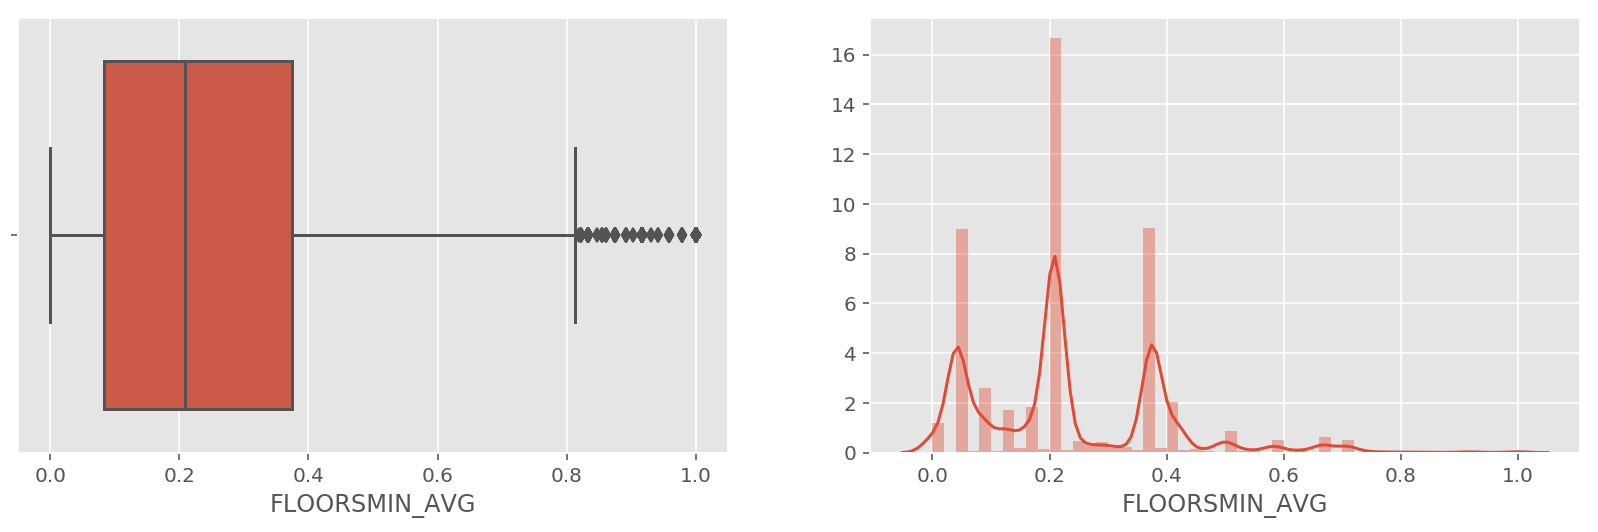

LANDAREA_AVG: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      182590.000000
Percent        59.376738
Name: LANDAREA_AVG, dtype: float64

count    124921.000000
mean          0.066333
std           0.081184
min           0.000000
25%           0.018700
50%           0.048100
75%           0.085600
max           1.000000
Name: LANDAREA_AVG, dtype: float64


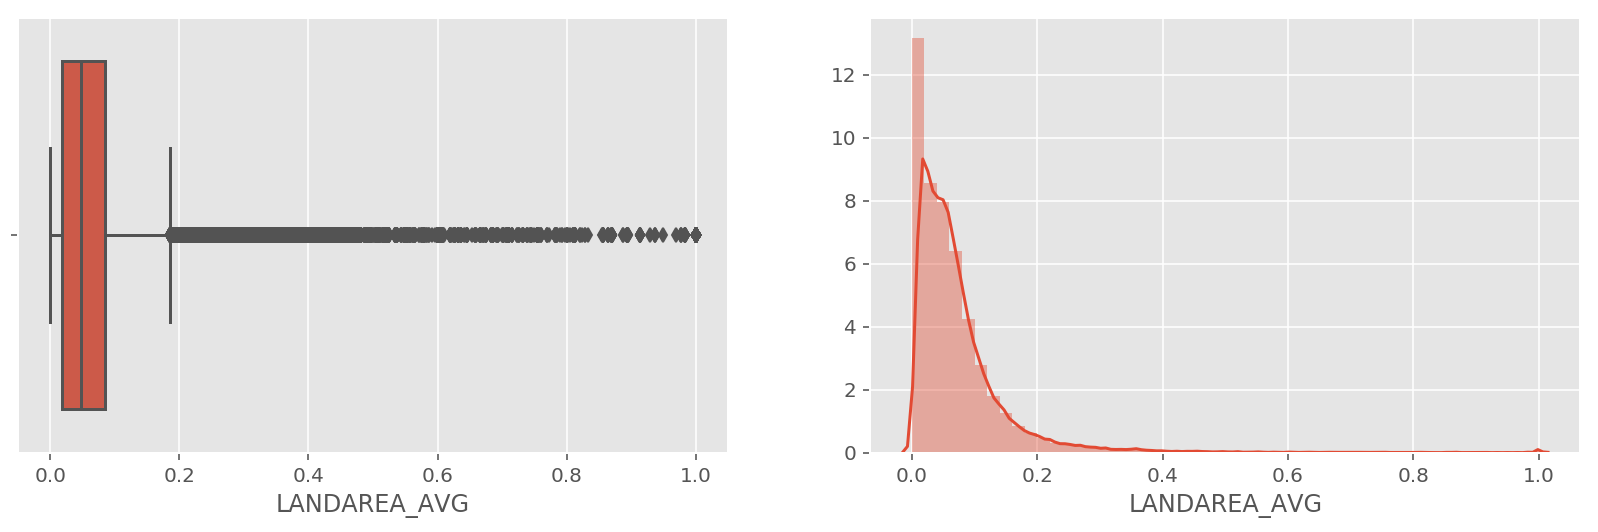

LIVINGAPARTMENTS_AVG: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      210199.000000
Percent        68.354953
Name: LIVINGAPARTMENTS_AVG, dtype: float64

count    97312.000000
mean         0.100775
std          0.092576
min          0.000000
25%          0.050400
50%          0.075600
75%          0.121000
max          1.000000
Name: LIVINGAPARTMENTS_AVG, dtype: float64


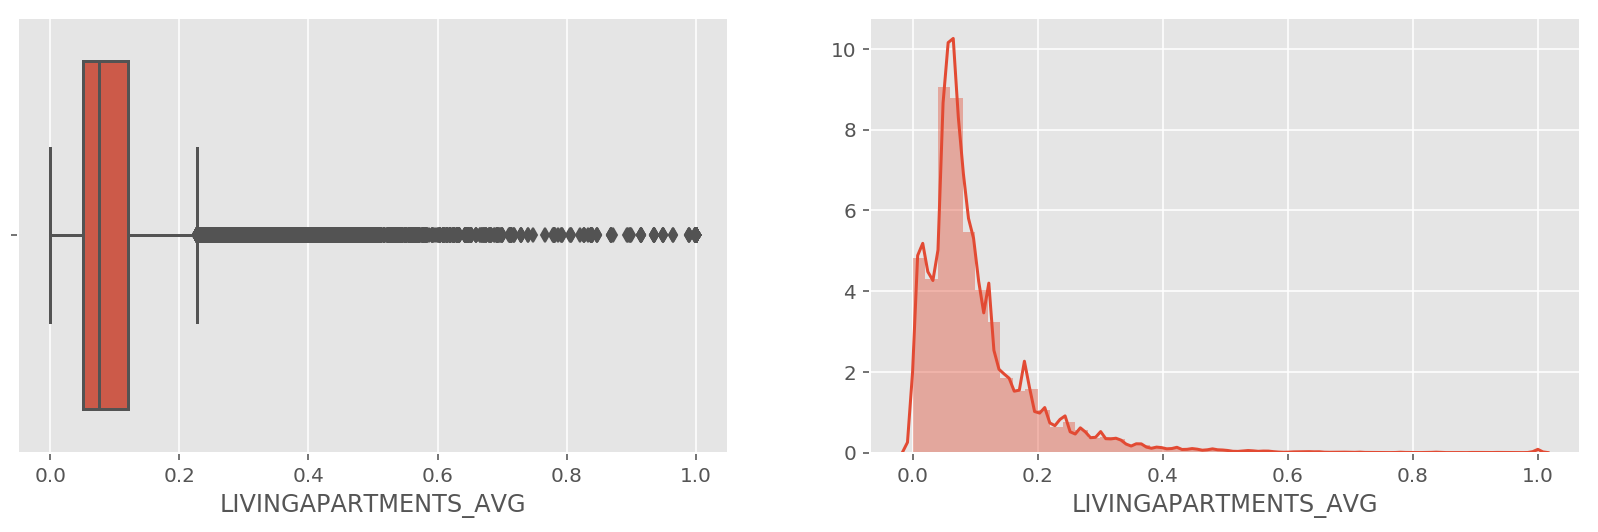

LIVINGAREA_AVG: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      154350.000000
Percent        50.193326
Name: LIVINGAREA_AVG, dtype: float64

count    153161.000000
mean          0.107399
std           0.110565
min           0.000000
25%           0.045300
50%           0.074500
75%           0.129900
max           1.000000
Name: LIVINGAREA_AVG, dtype: float64


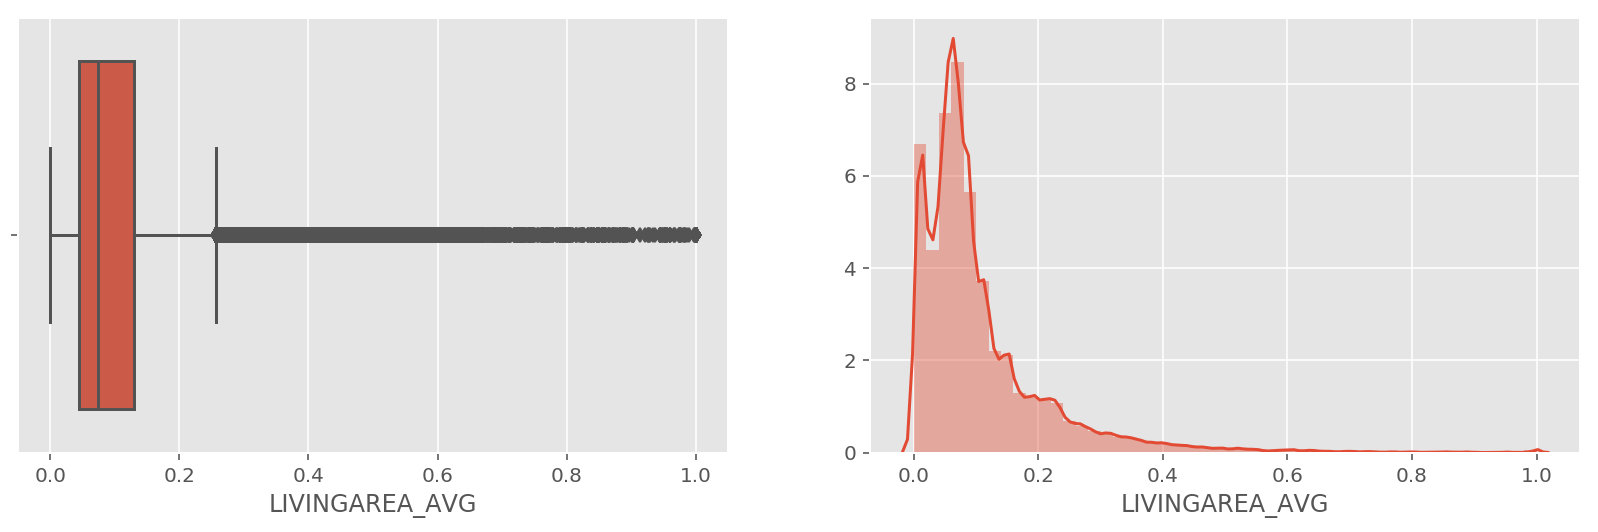

NONLIVINGAPARTMENTS_AVG: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      213514.000000
Percent        69.432963
Name: NONLIVINGAPARTMENTS_AVG, dtype: float64

count    93997.000000
mean         0.008809
std          0.047732
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003900
max          1.000000
Name: NONLIVINGAPARTMENTS_AVG, dtype: float64


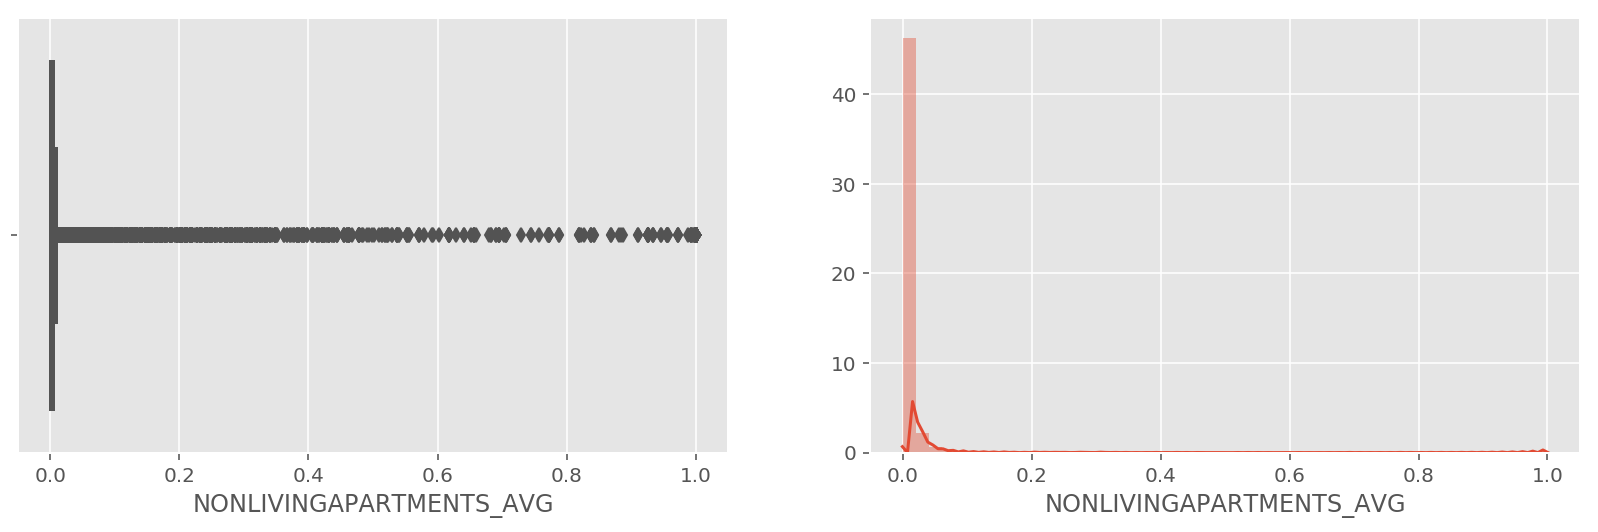

NONLIVINGAREA_AVG: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      169682.000000
Percent        55.179164
Name: NONLIVINGAREA_AVG, dtype: float64

count    137829.000000
mean          0.028358
std           0.069523
min           0.000000
25%           0.000000
50%           0.003600
75%           0.027700
max           1.000000
Name: NONLIVINGAREA_AVG, dtype: float64


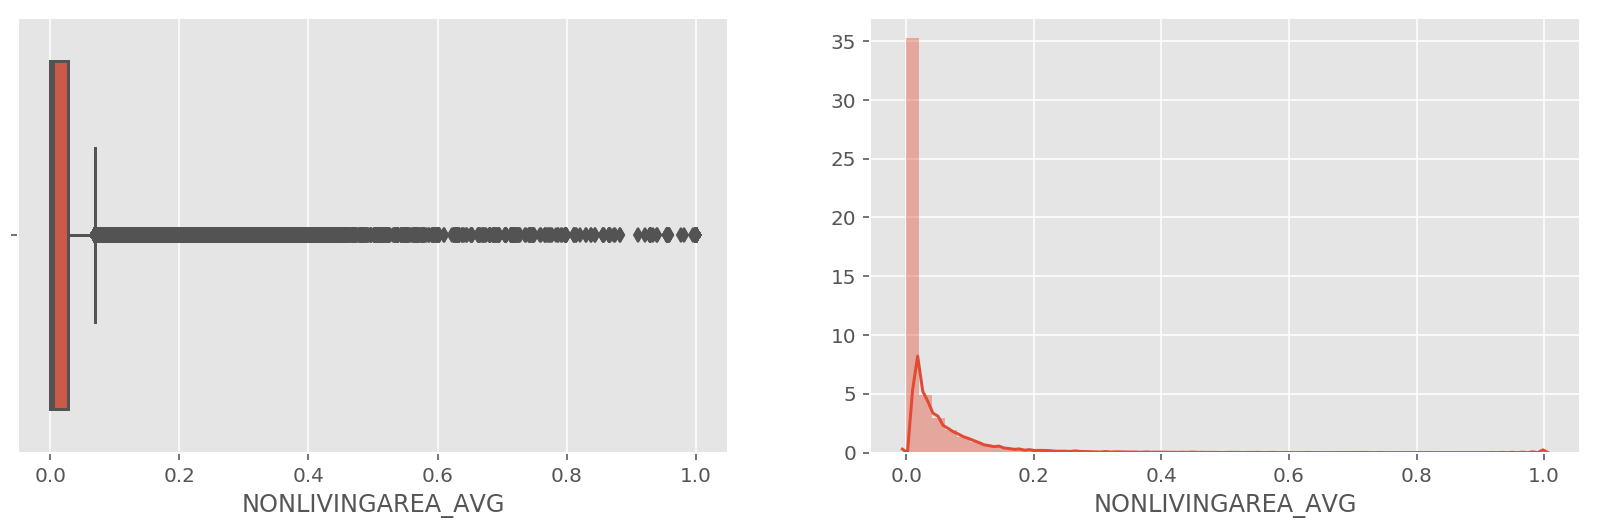

APARTMENTS_MODE: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      156061.000000
Percent        50.749729
Name: APARTMENTS_MODE, dtype: float64

count    151450.000000
mean          0.114231
std           0.107936
min           0.000000
25%           0.052500
50%           0.084000
75%           0.143900
max           1.000000
Name: APARTMENTS_MODE, dtype: float64


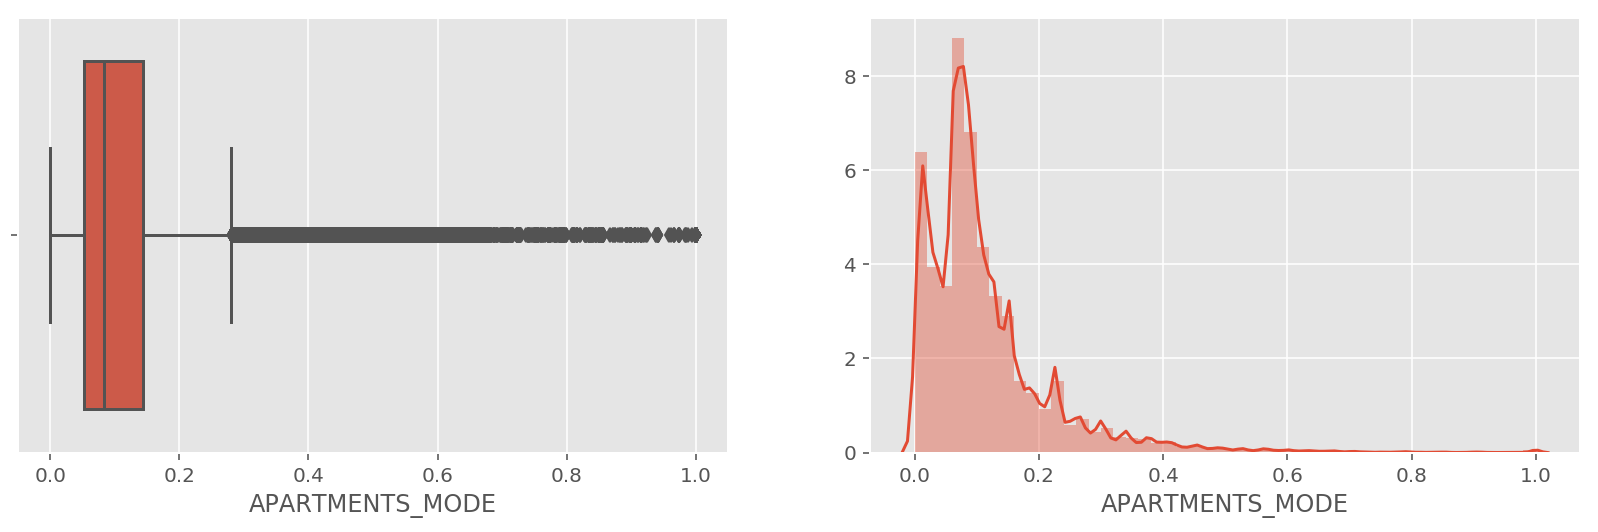

BASEMENTAREA_MODE: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      179943.000000
Percent        58.515956
Name: BASEMENTAREA_MODE, dtype: float64

count    127568.000000
mean          0.087543
std           0.084307
min           0.000000
25%           0.040700
50%           0.074600
75%           0.112400
max           1.000000
Name: BASEMENTAREA_MODE, dtype: float64


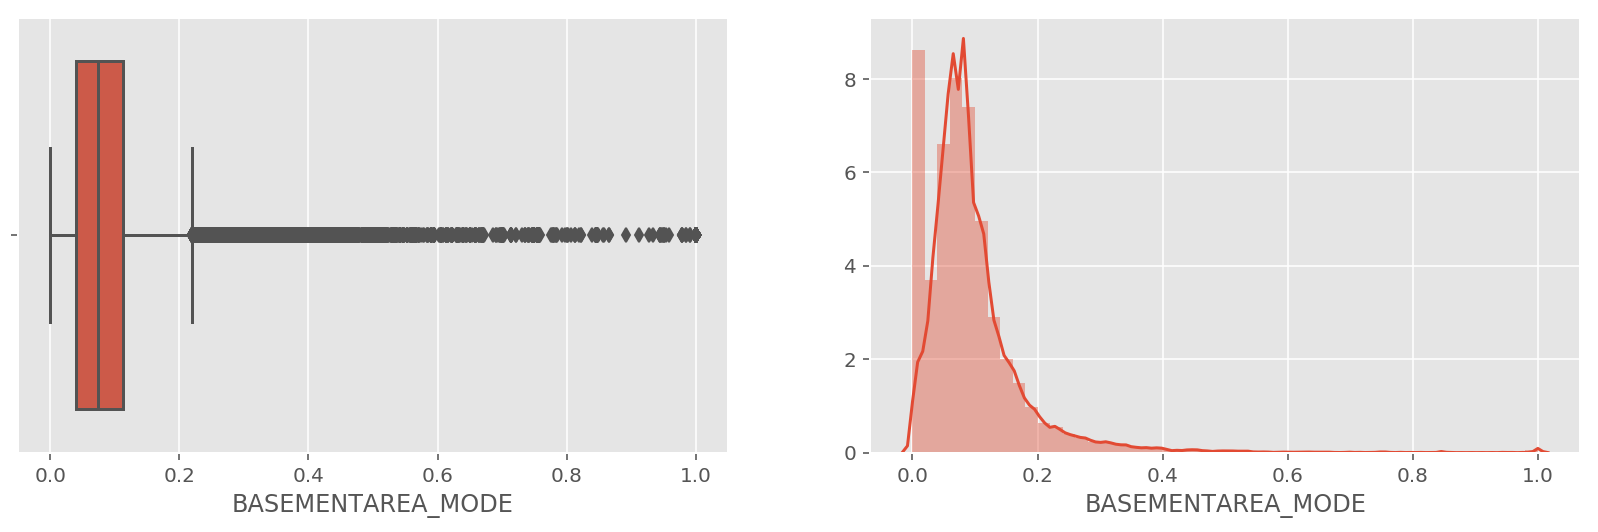

YEARS_BEGINEXPLUATATION_MODE: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      150007.000000
Percent        48.781019
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

count    157504.000000
mean          0.977065
std           0.064575
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64


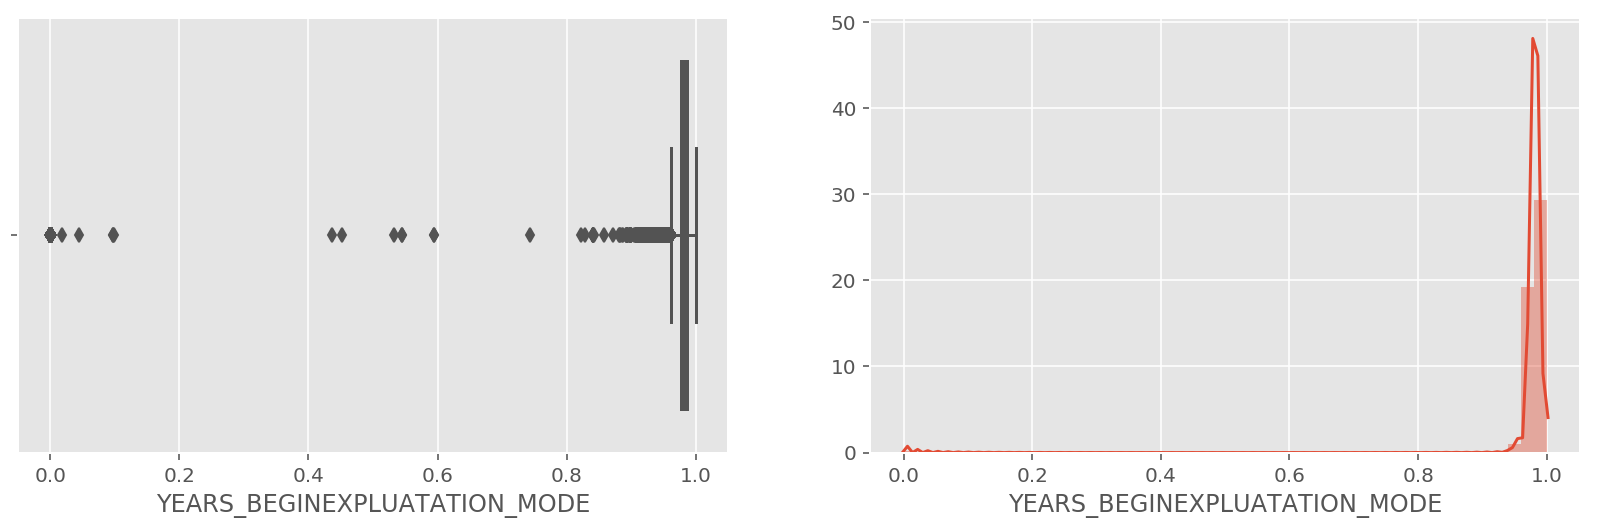

YEARS_BUILD_MODE: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      204488.000000
Percent        66.497784
Name: YEARS_BUILD_MODE, dtype: float64

count    103023.000000
mean          0.759637
std           0.110111
min           0.000000
25%           0.699400
50%           0.764800
75%           0.823600
max           1.000000
Name: YEARS_BUILD_MODE, dtype: float64


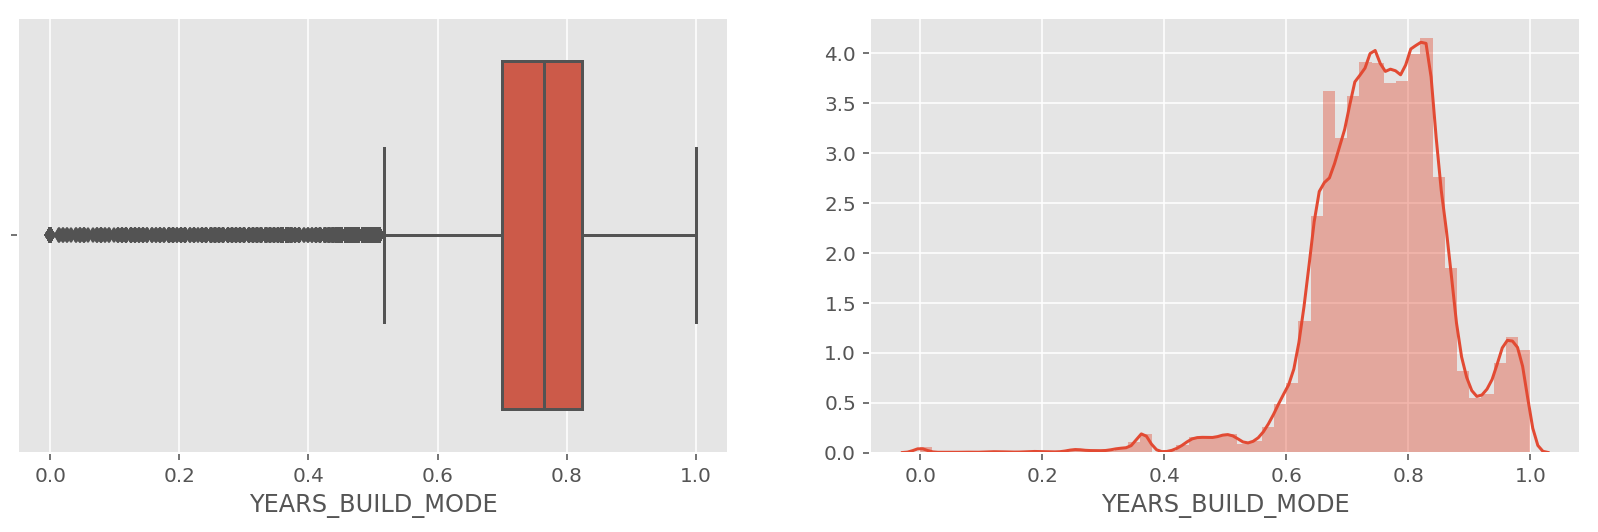

COMMONAREA_MODE: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      214865.000000
Percent        69.872297
Name: COMMONAREA_MODE, dtype: float64

count    92646.000000
mean         0.042553
std          0.074445
min          0.000000
25%          0.007200
50%          0.019000
75%          0.049000
max          1.000000
Name: COMMONAREA_MODE, dtype: float64


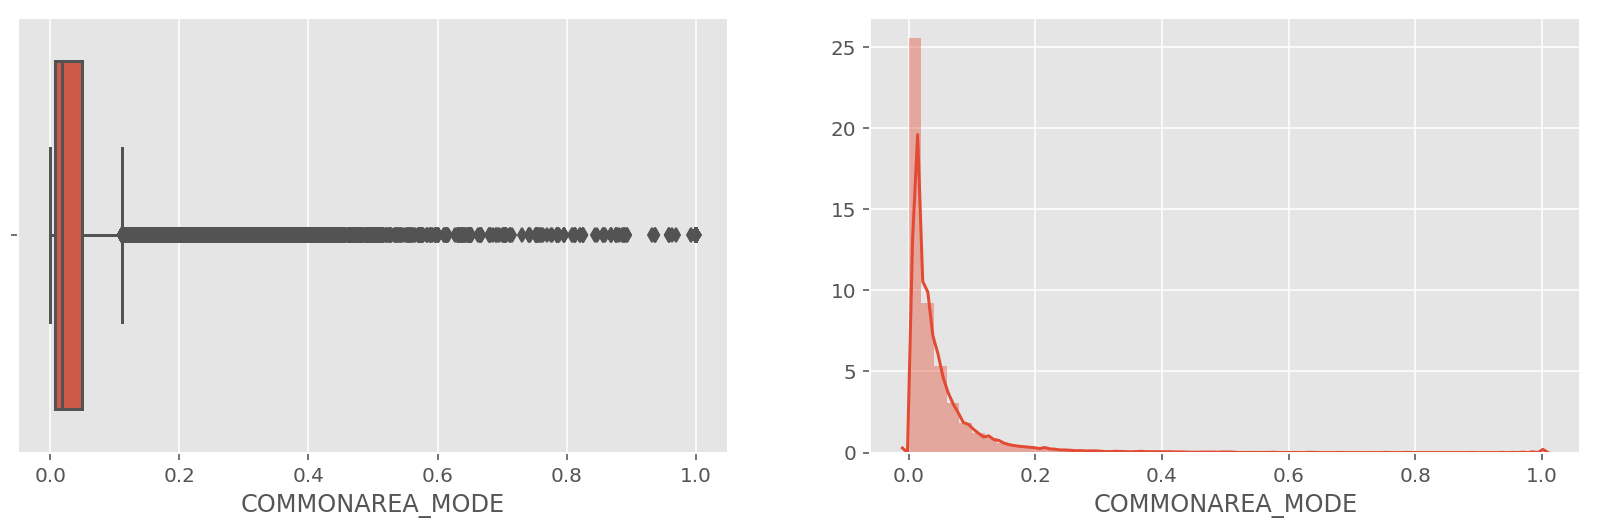

ELEVATORS_MODE: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      163891.00000
Percent        53.29598
Name: ELEVATORS_MODE, dtype: float64

count    143620.000000
mean          0.074490
std           0.132256
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120800
max           1.000000
Name: ELEVATORS_MODE, dtype: float64


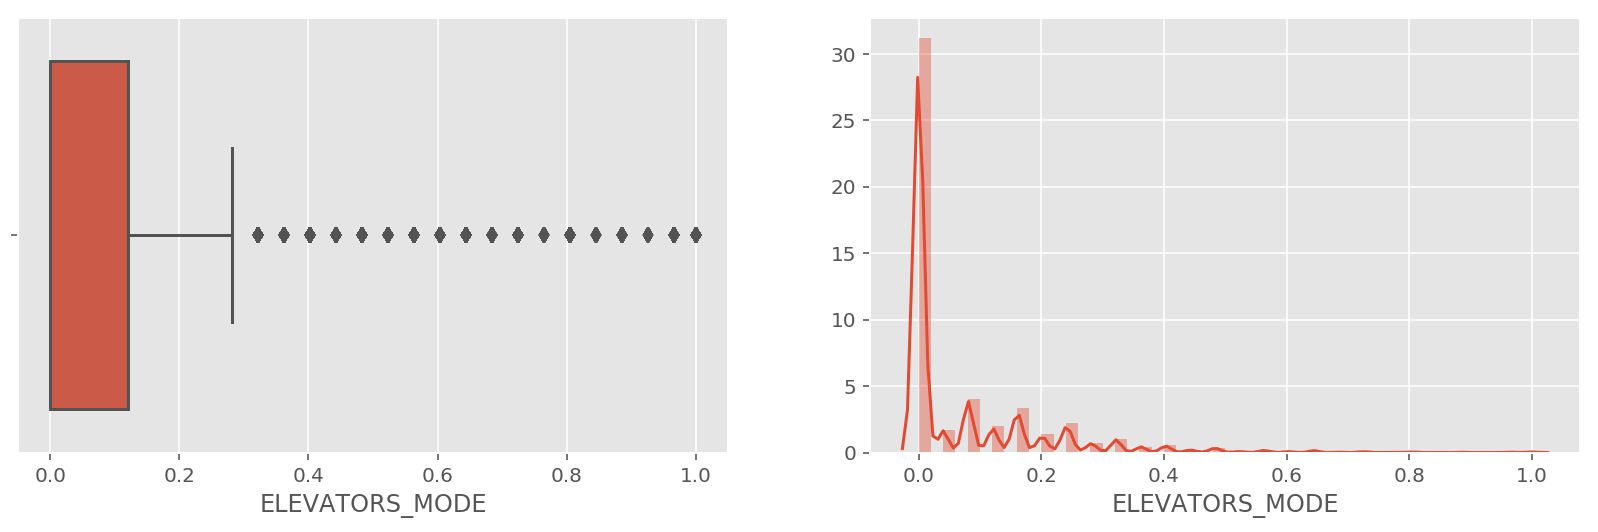

ENTRANCES_MODE: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      154828.000000
Percent        50.348768
Name: ENTRANCES_MODE, dtype: float64

count    152683.000000
mean          0.145193
std           0.100977
min           0.000000
25%           0.069000
50%           0.137900
75%           0.206900
max           1.000000
Name: ENTRANCES_MODE, dtype: float64


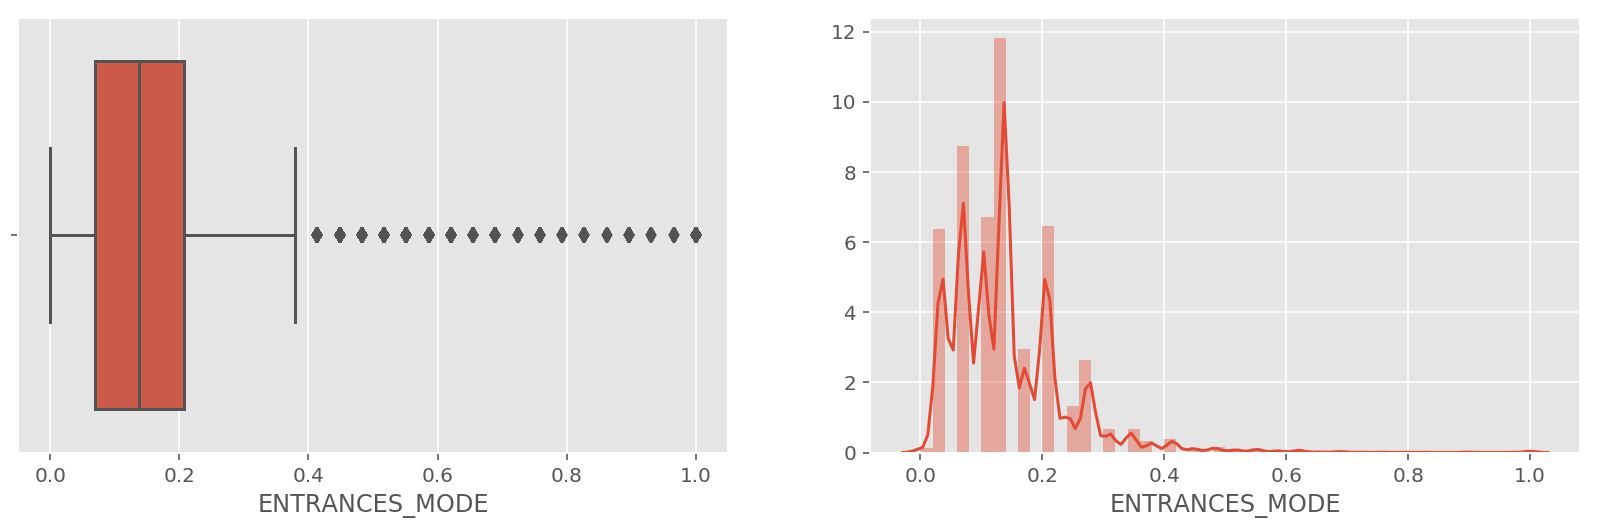

FLOORSMAX_MODE: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      153020.000000
Percent        49.760822
Name: FLOORSMAX_MODE, dtype: float64

count    154491.000000
mean          0.222315
std           0.143709
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64


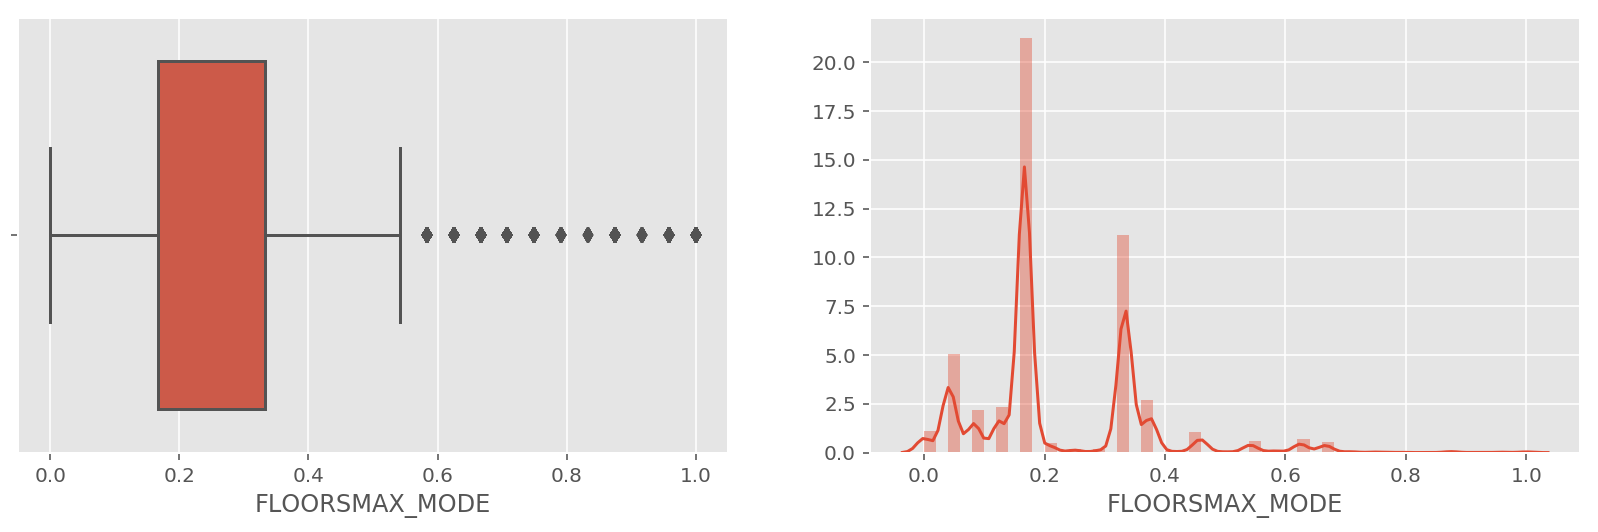

FLOORSMIN_MODE: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      208642.00000
Percent        67.84863
Name: FLOORSMIN_MODE, dtype: float64

count    98869.000000
mean         0.228058
std          0.161160
min          0.000000
25%          0.083300
50%          0.208300
75%          0.375000
max          1.000000
Name: FLOORSMIN_MODE, dtype: float64


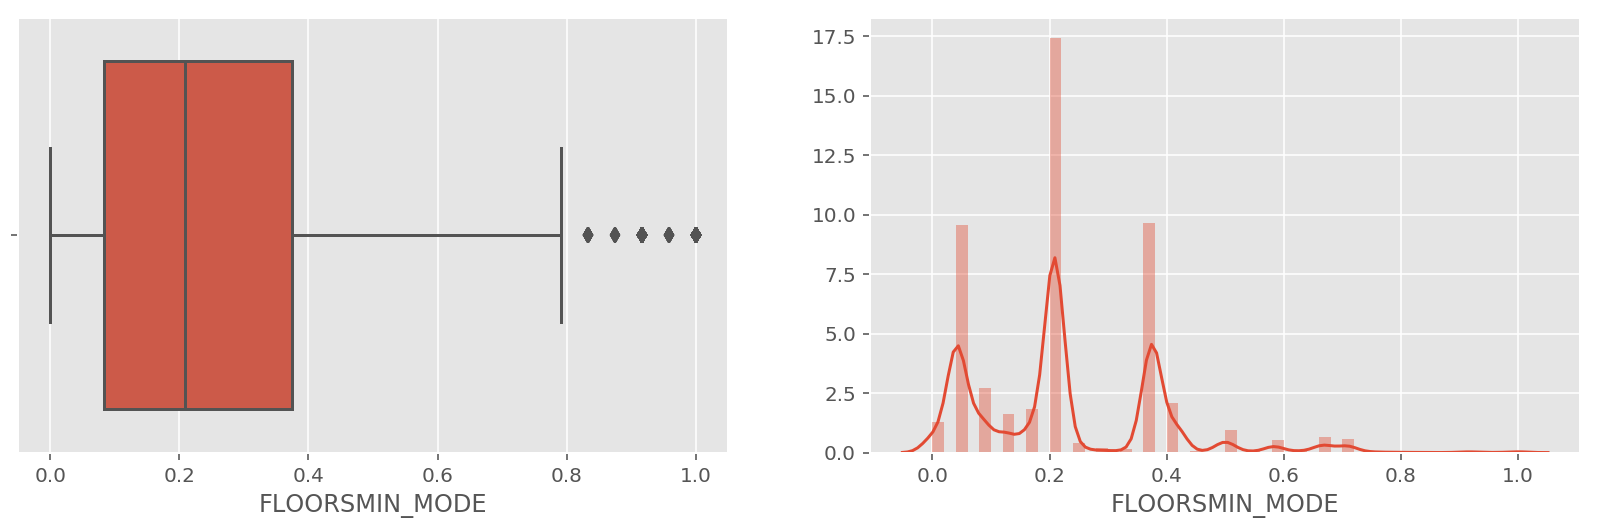

LANDAREA_MODE: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      182590.000000
Percent        59.376738
Name: LANDAREA_MODE, dtype: float64

count    124921.000000
mean          0.064958
std           0.081750
min           0.000000
25%           0.016600
50%           0.045800
75%           0.084100
max           1.000000
Name: LANDAREA_MODE, dtype: float64


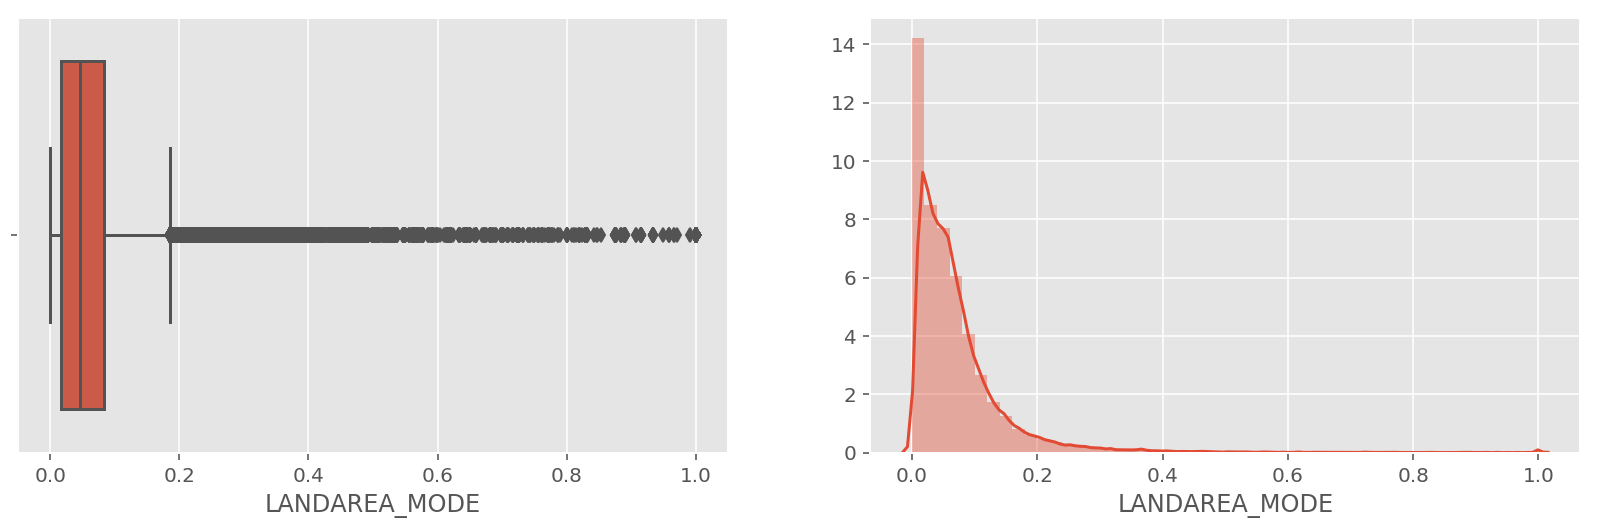

LIVINGAPARTMENTS_MODE: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      210199.000000
Percent        68.354953
Name: LIVINGAPARTMENTS_MODE, dtype: float64

count    97312.000000
mean         0.105645
std          0.097880
min          0.000000
25%          0.054200
50%          0.077100
75%          0.131300
max          1.000000
Name: LIVINGAPARTMENTS_MODE, dtype: float64


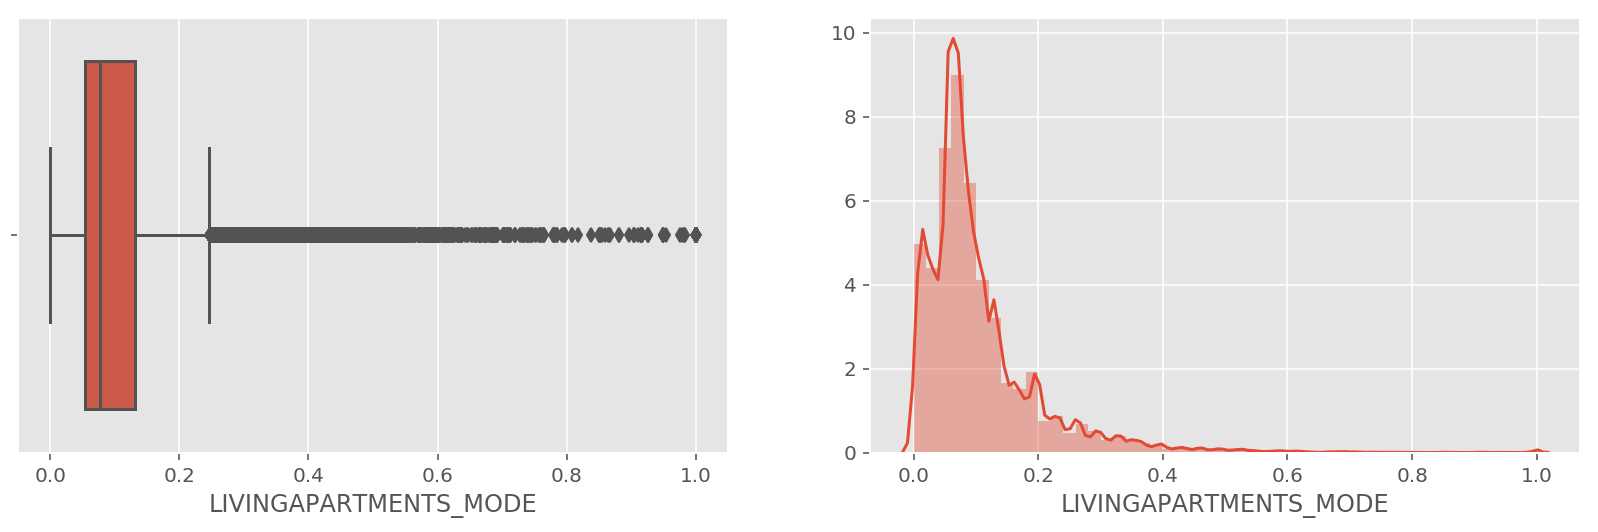

LIVINGAREA_MODE: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      154350.000000
Percent        50.193326
Name: LIVINGAREA_MODE, dtype: float64

count    153161.000000
mean          0.105975
std           0.111845
min           0.000000
25%           0.042700
50%           0.073100
75%           0.125200
max           1.000000
Name: LIVINGAREA_MODE, dtype: float64


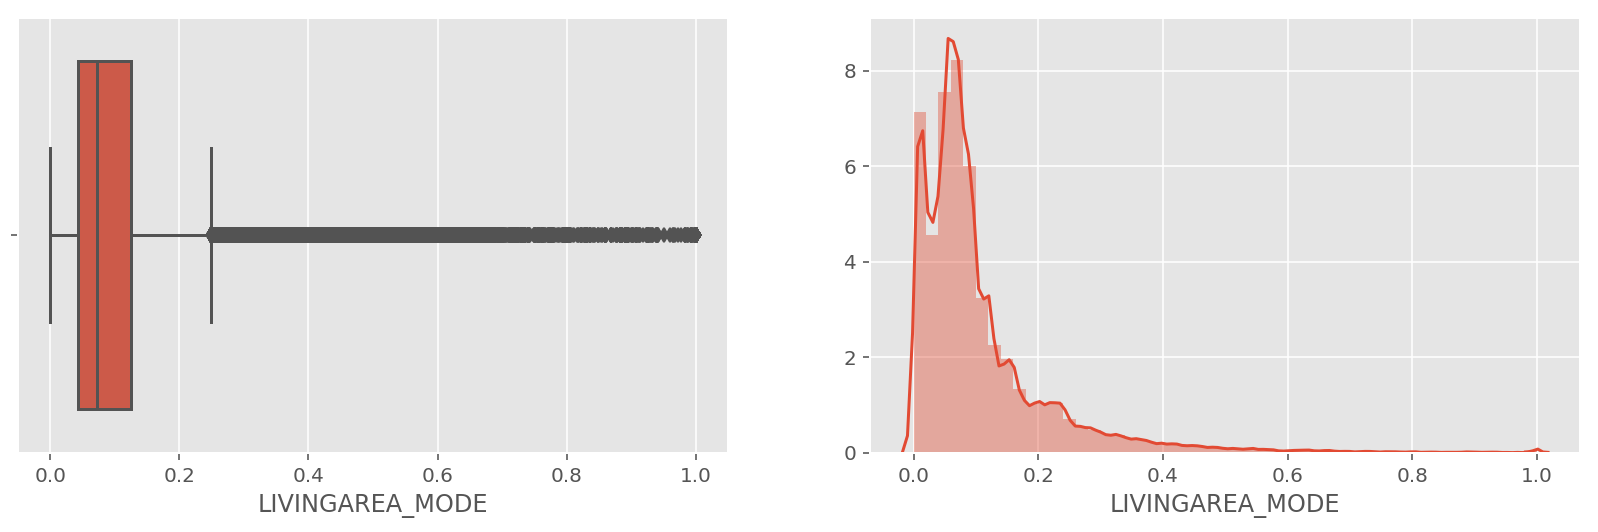

NONLIVINGAPARTMENTS_MODE: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      213514.000000
Percent        69.432963
Name: NONLIVINGAPARTMENTS_MODE, dtype: float64

count    93997.000000
mean         0.008076
std          0.046276
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003900
max          1.000000
Name: NONLIVINGAPARTMENTS_MODE, dtype: float64


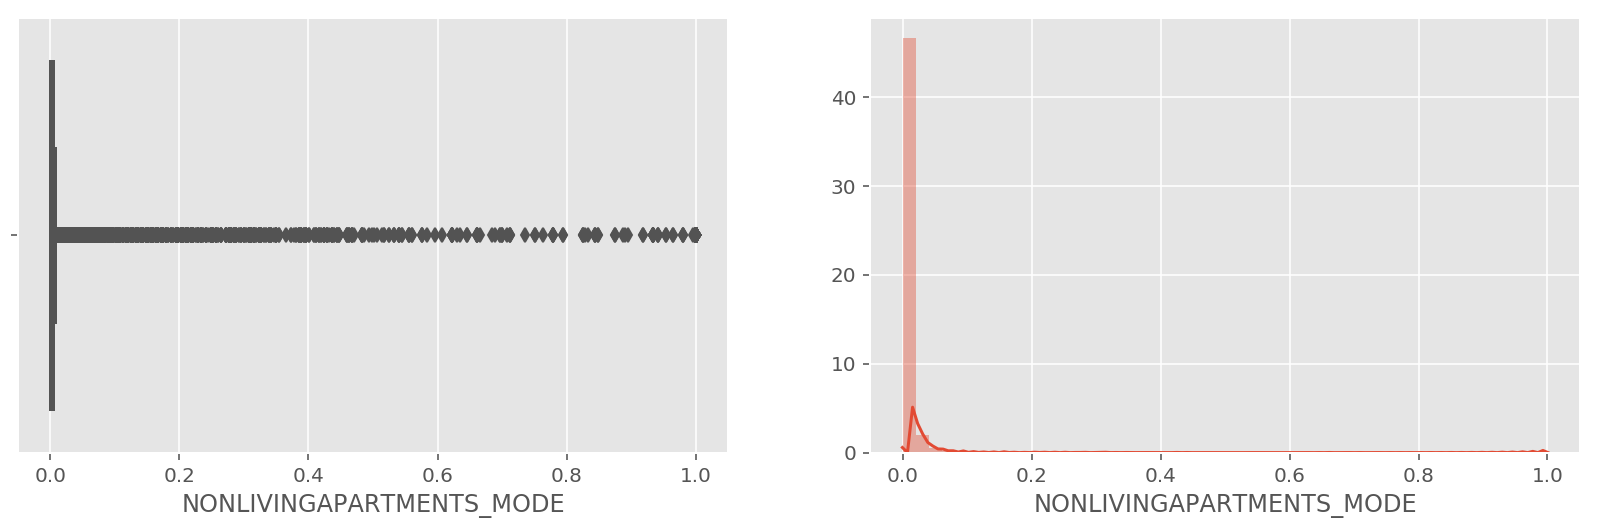

NONLIVINGAREA_MODE: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      169682.000000
Percent        55.179164
Name: NONLIVINGAREA_MODE, dtype: float64

count    137829.000000
mean          0.027022
std           0.070254
min           0.000000
25%           0.000000
50%           0.001100
75%           0.023100
max           1.000000
Name: NONLIVINGAREA_MODE, dtype: float64


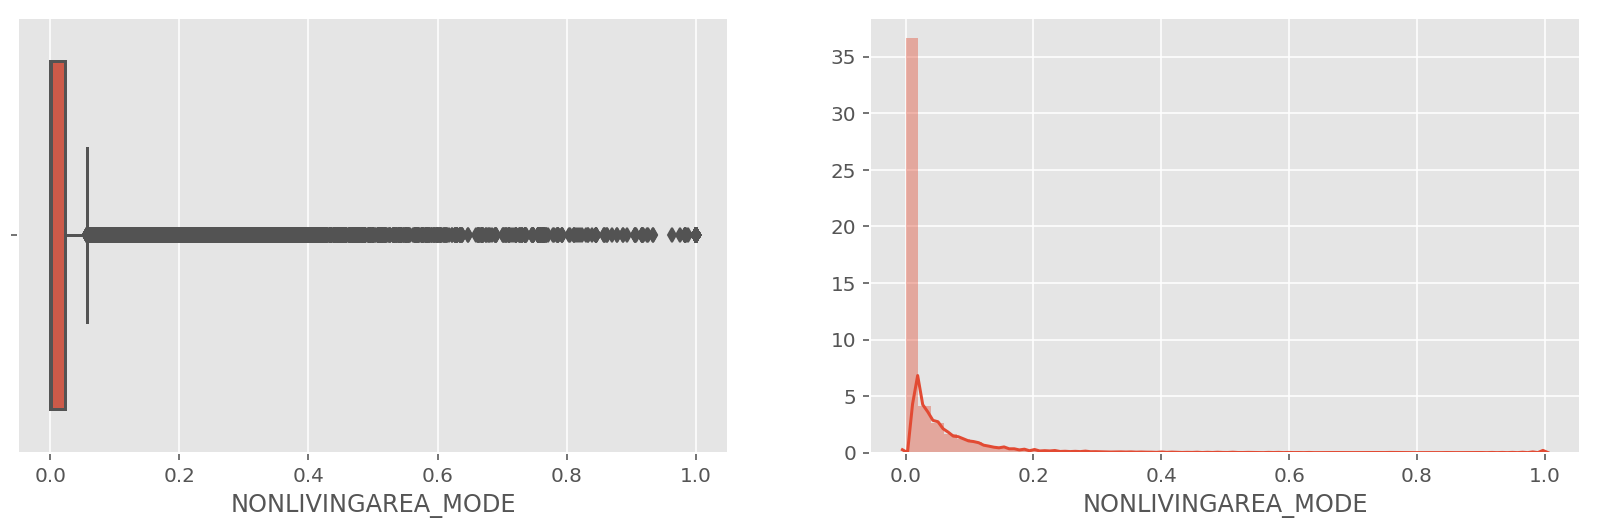

APARTMENTS_MEDI: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      156061.000000
Percent        50.749729
Name: APARTMENTS_MEDI, dtype: float64

count    151450.000000
mean          0.117850
std           0.109076
min           0.000000
25%           0.058300
50%           0.086400
75%           0.148900
max           1.000000
Name: APARTMENTS_MEDI, dtype: float64


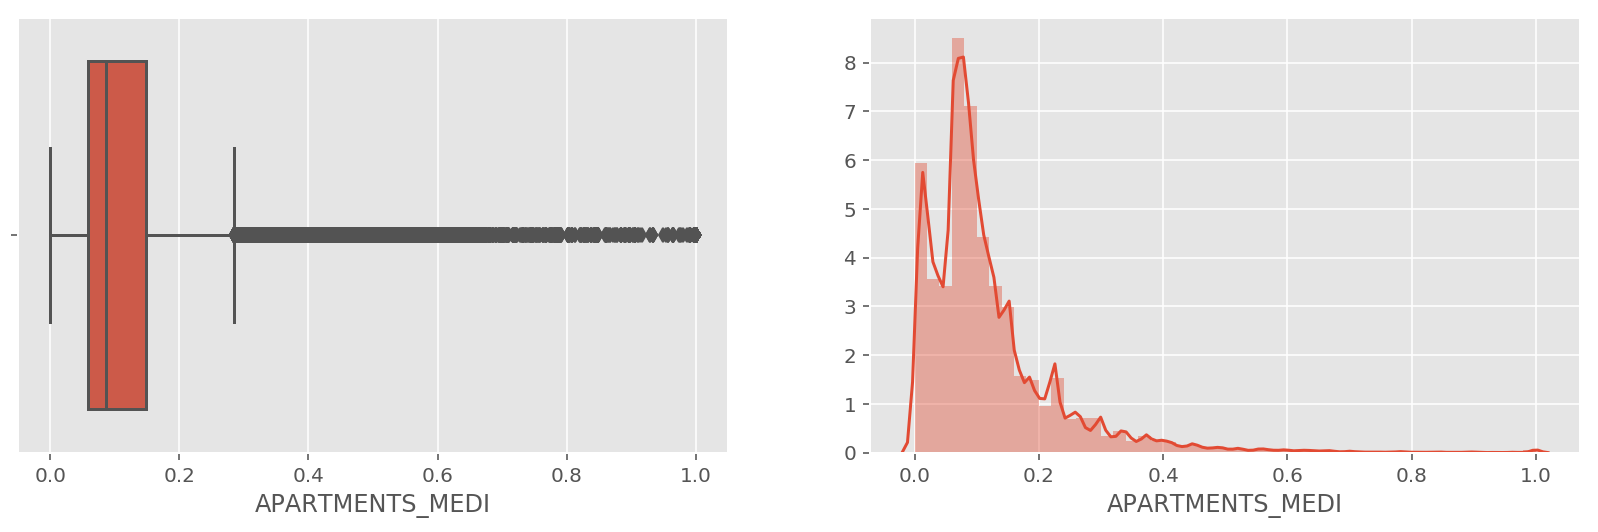

BASEMENTAREA_MEDI: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      179943.000000
Percent        58.515956
Name: BASEMENTAREA_MEDI, dtype: float64

count    127568.000000
mean          0.087955
std           0.082179
min           0.000000
25%           0.043700
50%           0.075800
75%           0.111600
max           1.000000
Name: BASEMENTAREA_MEDI, dtype: float64


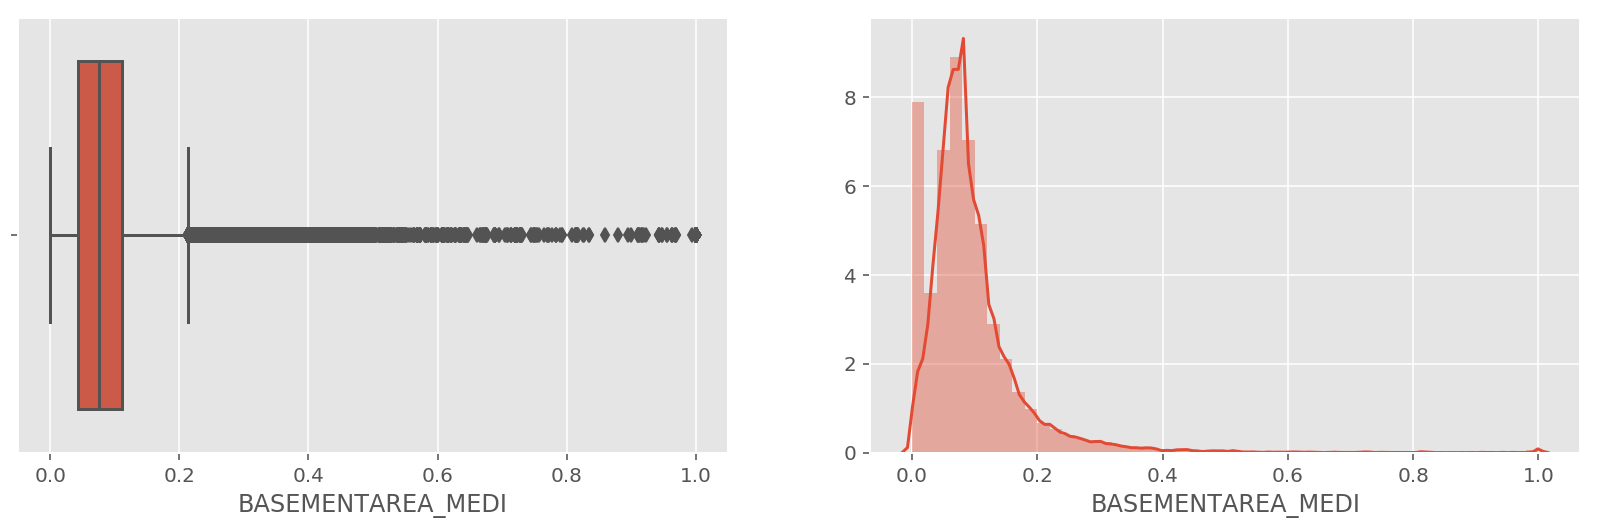

YEARS_BEGINEXPLUATATION_MEDI: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      150007.000000
Percent        48.781019
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

count    157504.000000
mean          0.977752
std           0.059897
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64


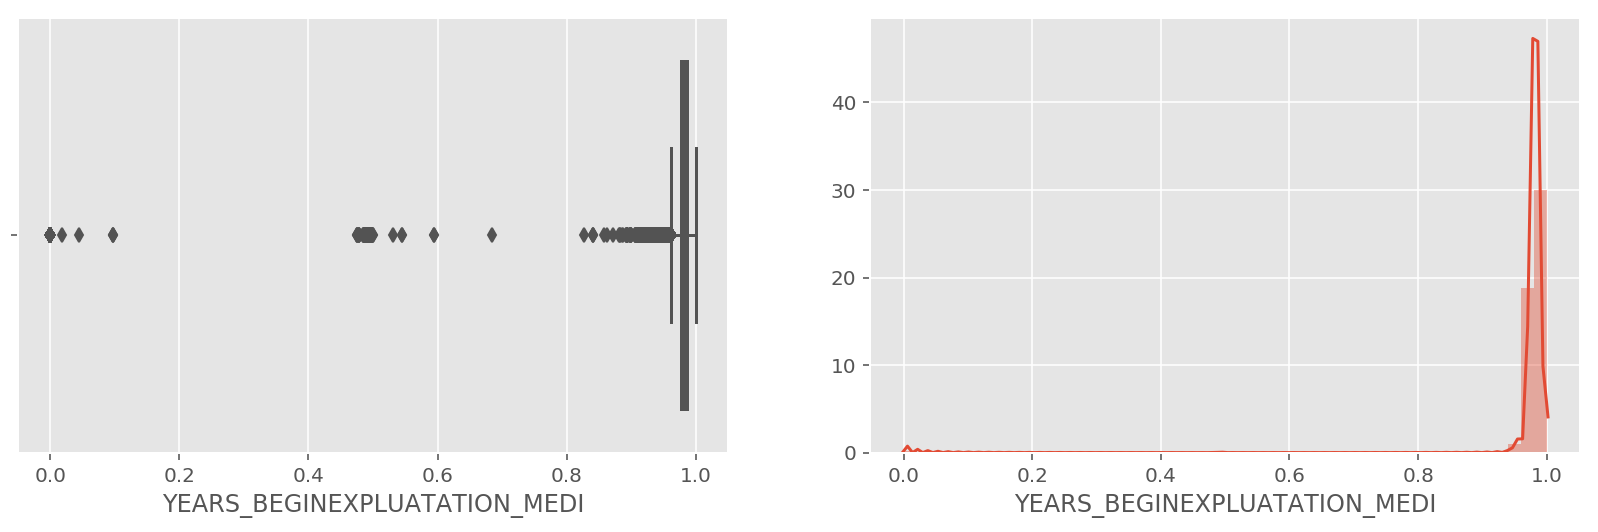

YEARS_BUILD_MEDI: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      204488.000000
Percent        66.497784
Name: YEARS_BUILD_MEDI, dtype: float64

count    103023.000000
mean          0.755746
std           0.112066
min           0.000000
25%           0.691400
50%           0.758500
75%           0.825600
max           1.000000
Name: YEARS_BUILD_MEDI, dtype: float64


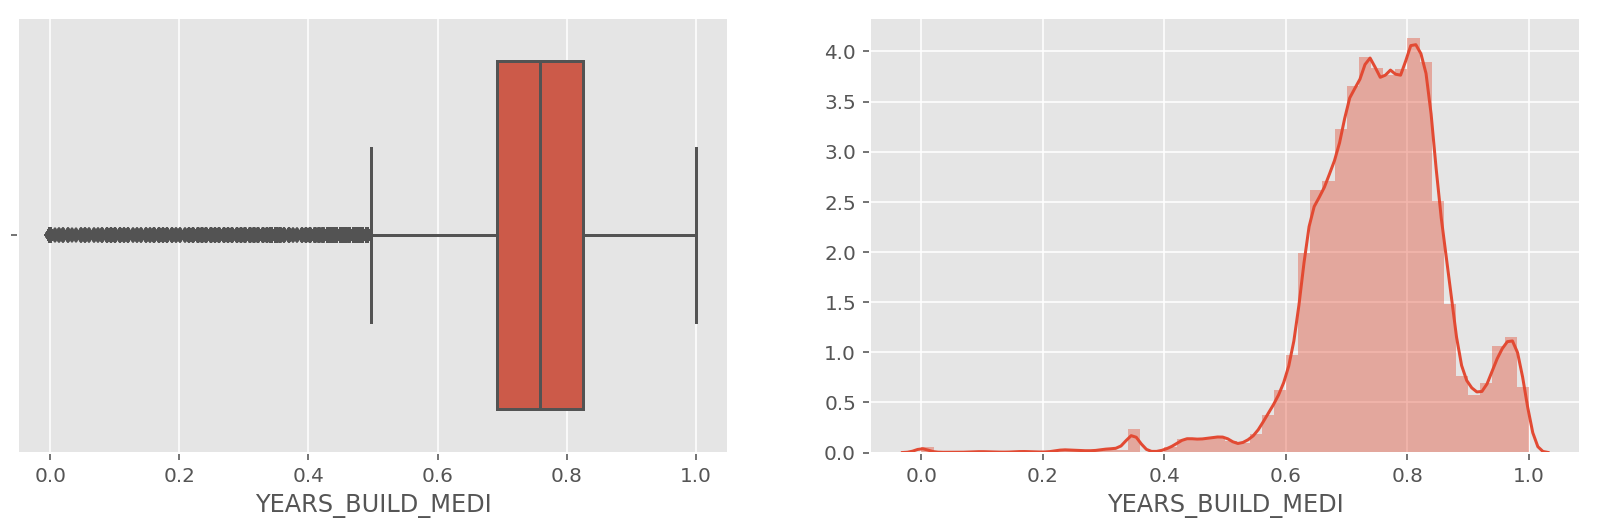

COMMONAREA_MEDI: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      214865.000000
Percent        69.872297
Name: COMMONAREA_MEDI, dtype: float64

count    92646.000000
mean         0.044595
std          0.076144
min          0.000000
25%          0.007900
50%          0.020800
75%          0.051300
max          1.000000
Name: COMMONAREA_MEDI, dtype: float64


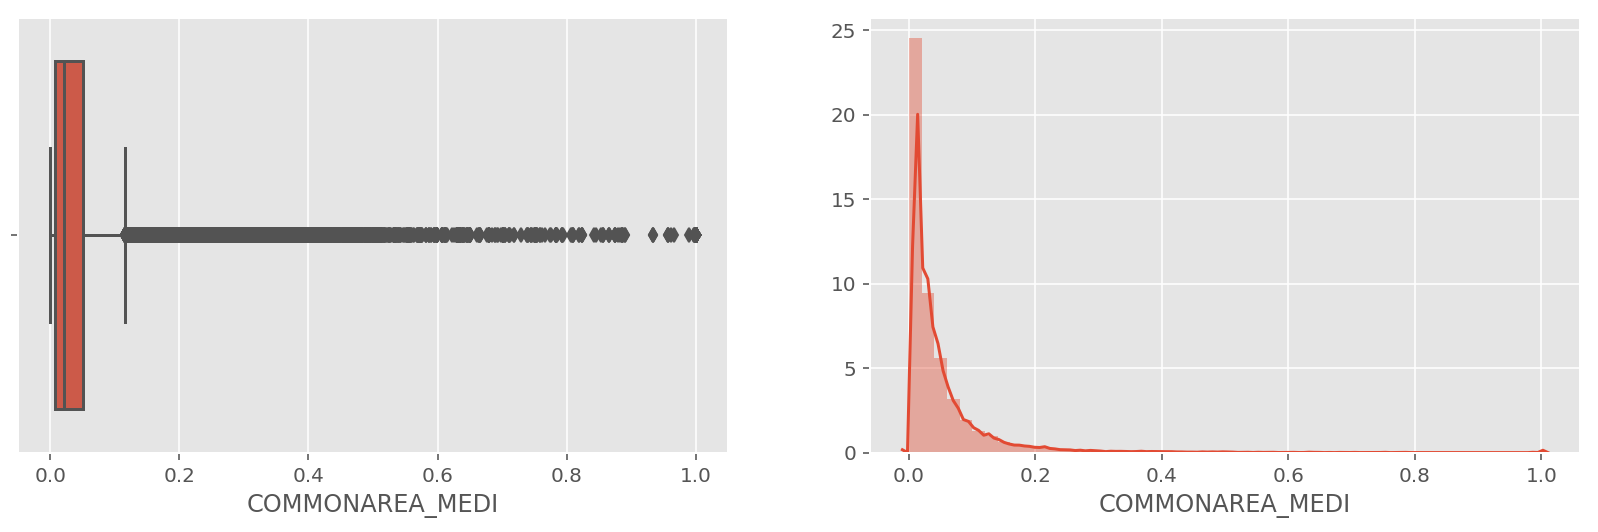

ELEVATORS_MEDI: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      163891.00000
Percent        53.29598
Name: ELEVATORS_MEDI, dtype: float64

count    143620.000000
mean          0.078078
std           0.134467
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120000
max           1.000000
Name: ELEVATORS_MEDI, dtype: float64


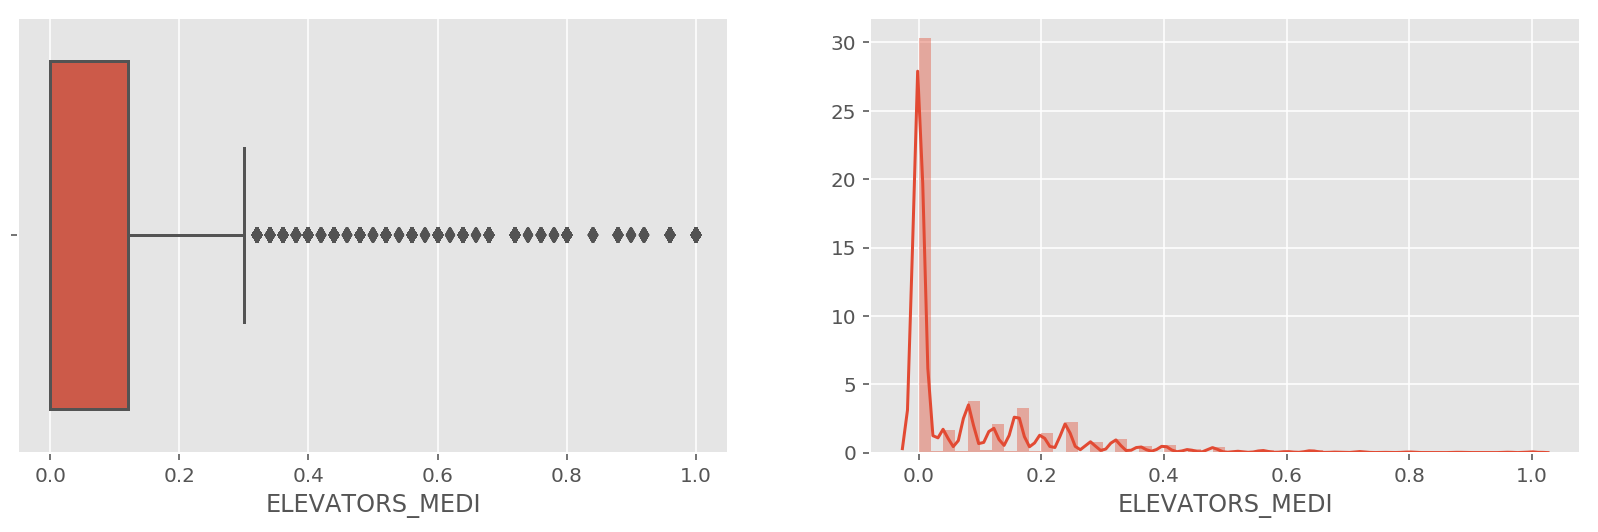

ENTRANCES_MEDI: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      154828.000000
Percent        50.348768
Name: ENTRANCES_MEDI, dtype: float64

count    152683.000000
mean          0.149213
std           0.100368
min           0.000000
25%           0.069000
50%           0.137900
75%           0.206900
max           1.000000
Name: ENTRANCES_MEDI, dtype: float64


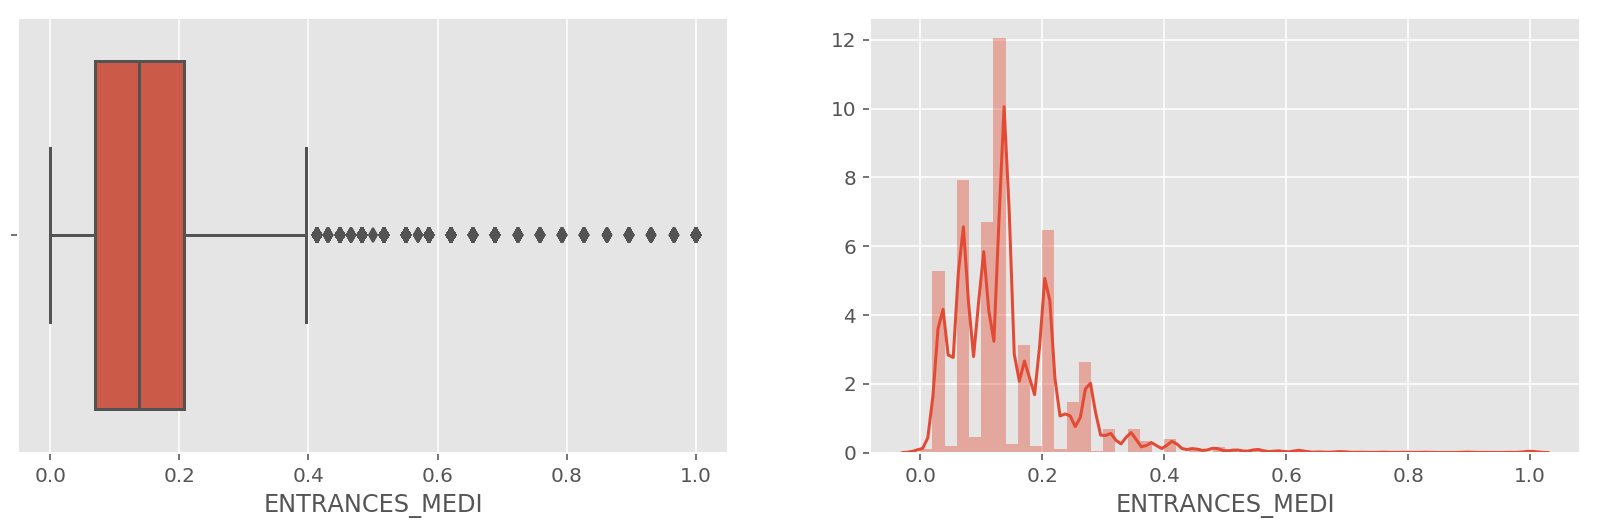

FLOORSMAX_MEDI: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      153020.000000
Percent        49.760822
Name: FLOORSMAX_MEDI, dtype: float64

count    154491.000000
mean          0.225897
std           0.145067
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MEDI, dtype: float64


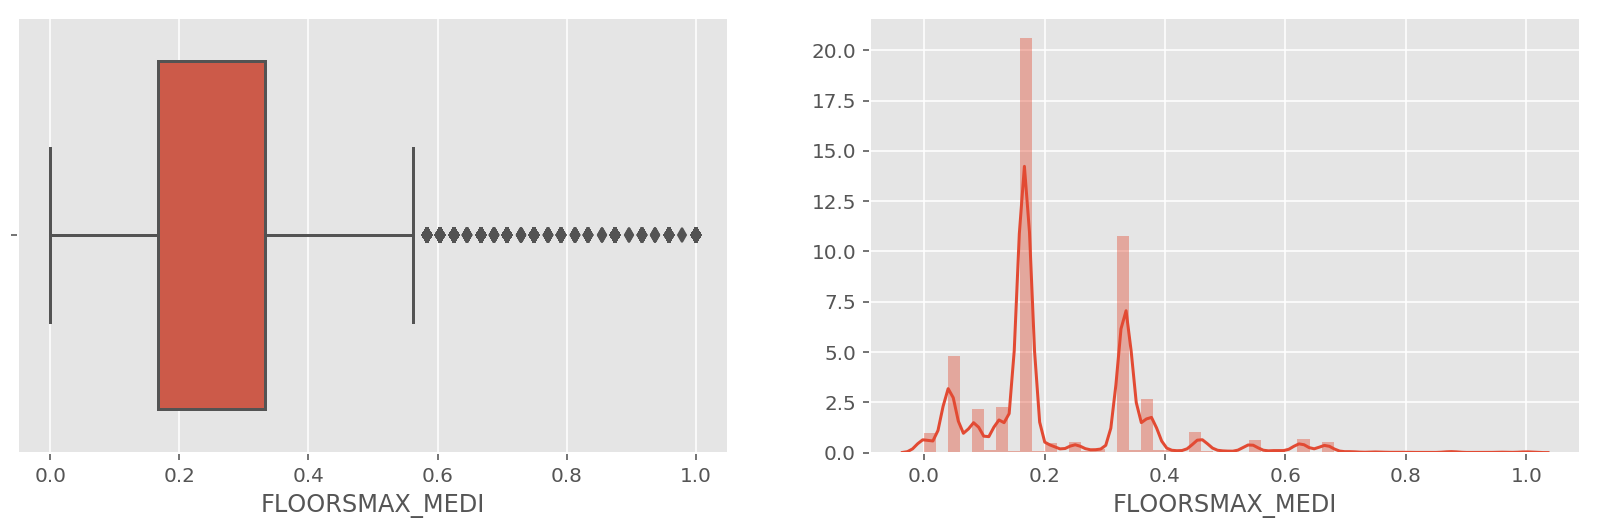

FLOORSMIN_MEDI: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      208642.00000
Percent        67.84863
Name: FLOORSMIN_MEDI, dtype: float64

count    98869.000000
mean         0.231625
std          0.161934
min          0.000000
25%          0.083300
50%          0.208300
75%          0.375000
max          1.000000
Name: FLOORSMIN_MEDI, dtype: float64


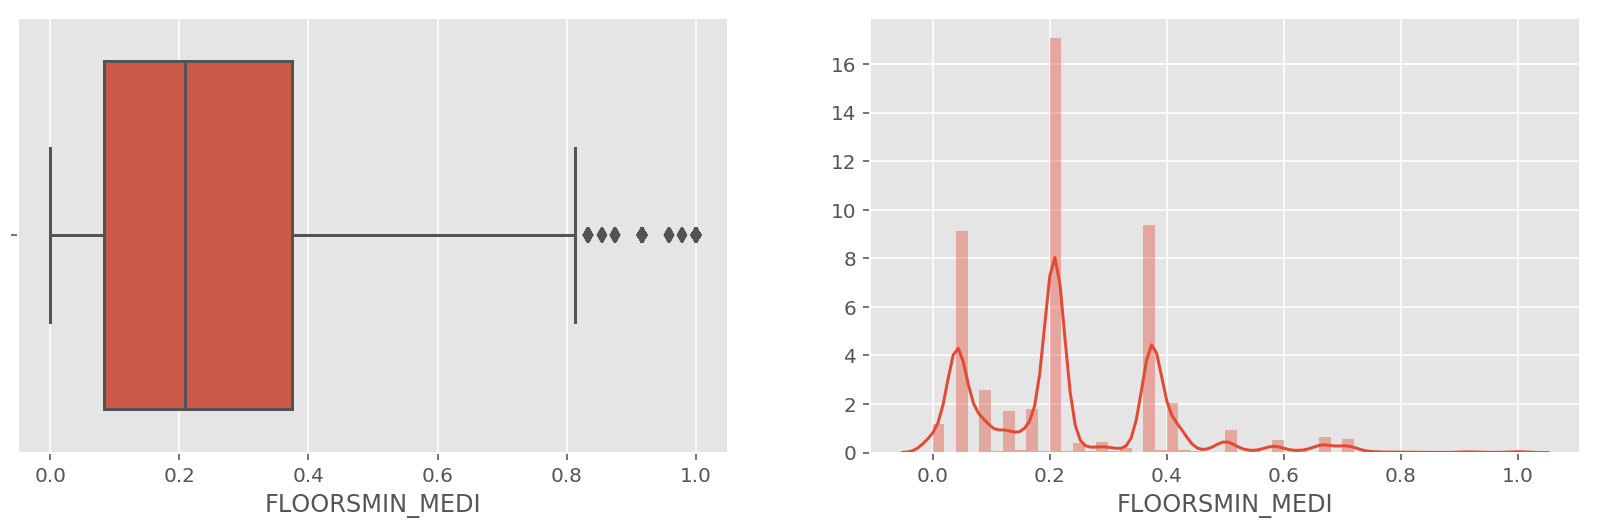

LANDAREA_MEDI: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      182590.000000
Percent        59.376738
Name: LANDAREA_MEDI, dtype: float64

count    124921.000000
mean          0.067169
std           0.082167
min           0.000000
25%           0.018700
50%           0.048700
75%           0.086800
max           1.000000
Name: LANDAREA_MEDI, dtype: float64


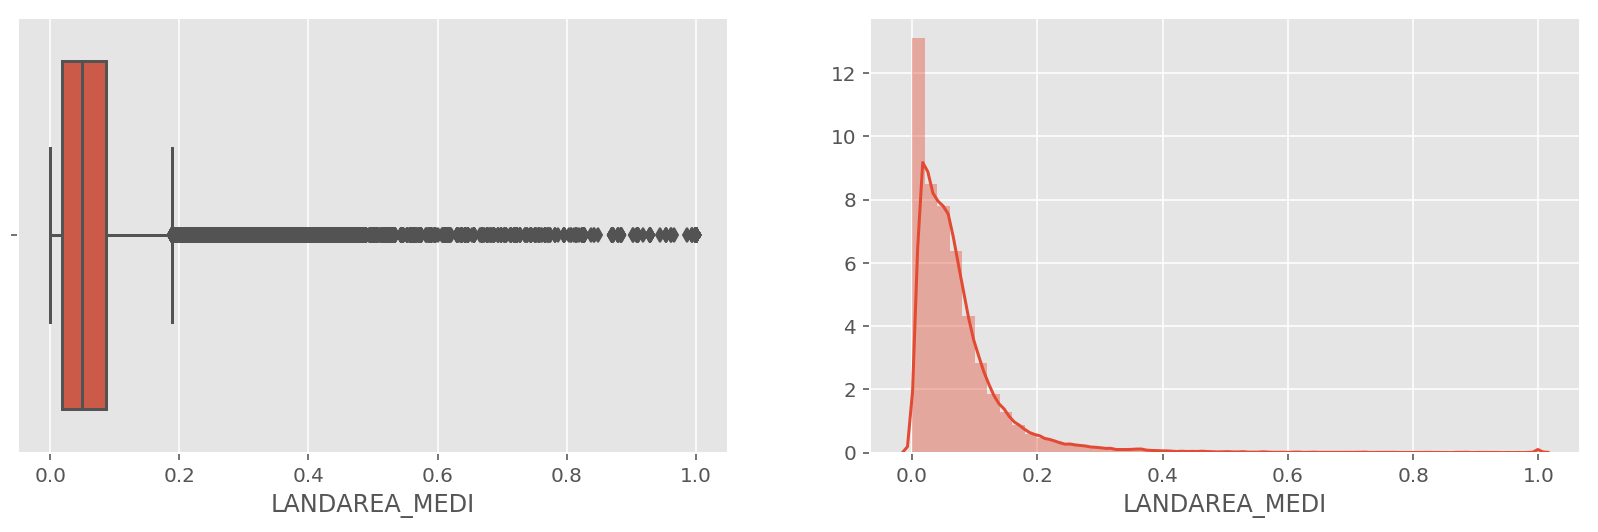

LIVINGAPARTMENTS_MEDI: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      210199.000000
Percent        68.354953
Name: LIVINGAPARTMENTS_MEDI, dtype: float64

count    97312.000000
mean         0.101954
std          0.093642
min          0.000000
25%          0.051300
50%          0.076100
75%          0.123100
max          1.000000
Name: LIVINGAPARTMENTS_MEDI, dtype: float64


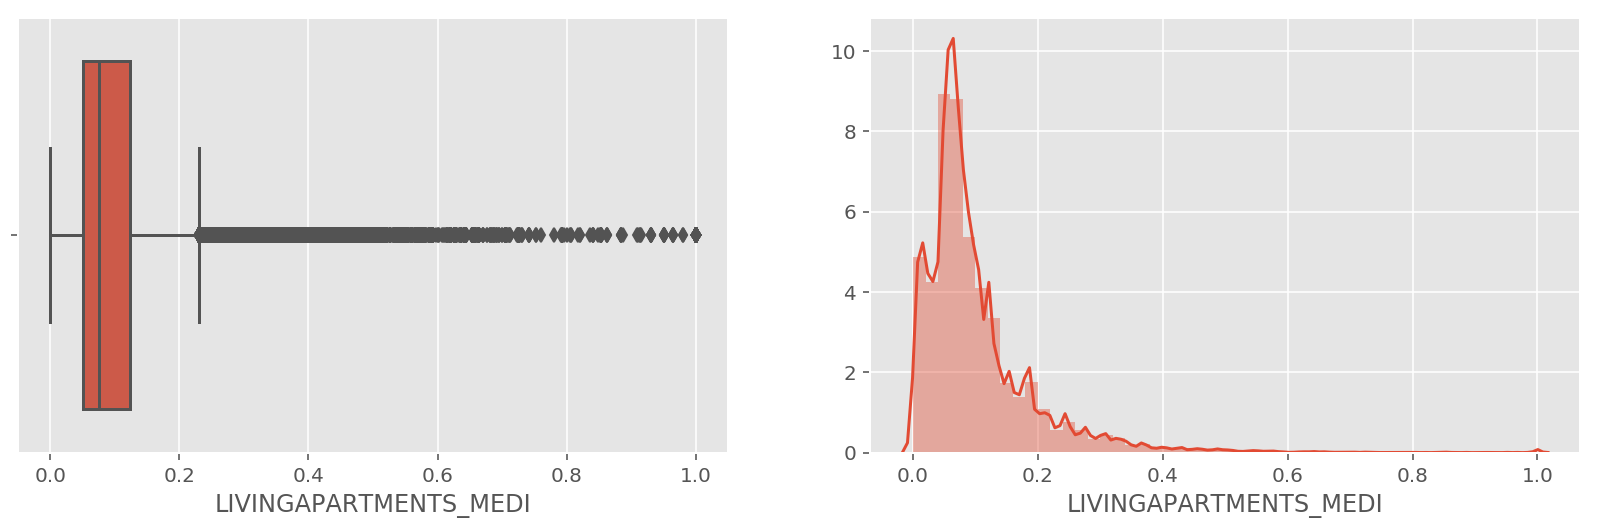

LIVINGAREA_MEDI: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      154350.000000
Percent        50.193326
Name: LIVINGAREA_MEDI, dtype: float64

count    153161.000000
mean          0.108607
std           0.112260
min           0.000000
25%           0.045700
50%           0.074900
75%           0.130300
max           1.000000
Name: LIVINGAREA_MEDI, dtype: float64


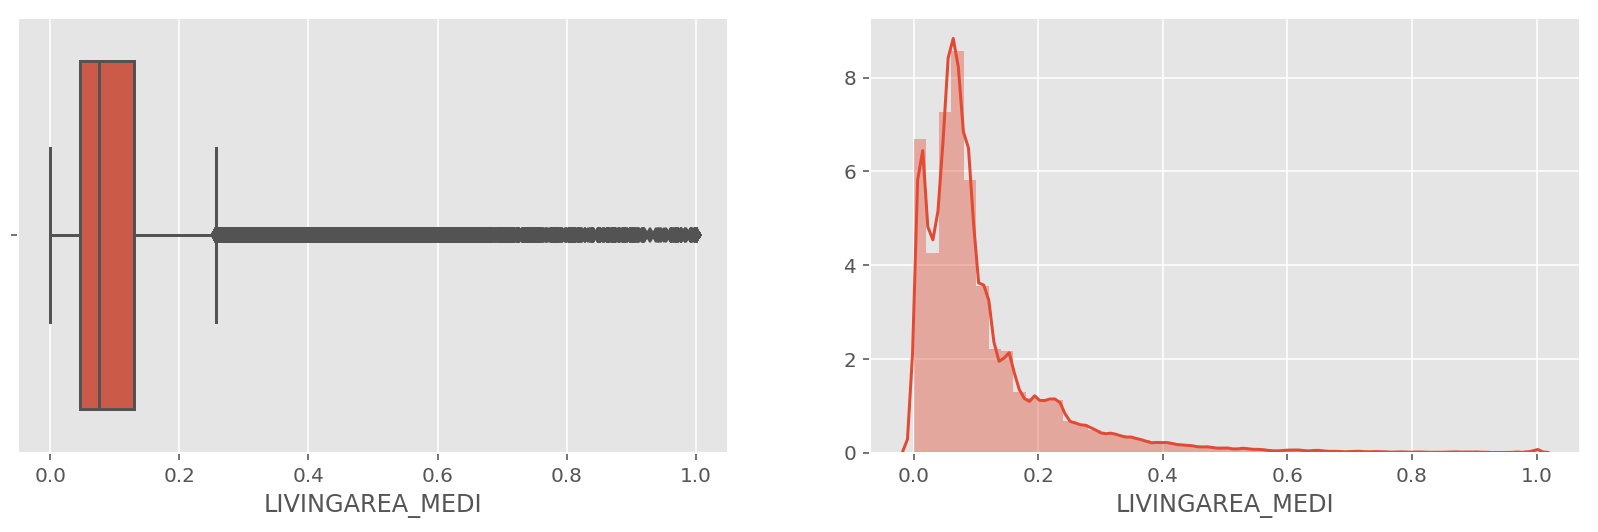

NONLIVINGAPARTMENTS_MEDI: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      213514.000000
Percent        69.432963
Name: NONLIVINGAPARTMENTS_MEDI, dtype: float64

count    93997.000000
mean         0.008651
std          0.047415
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003900
max          1.000000
Name: NONLIVINGAPARTMENTS_MEDI, dtype: float64


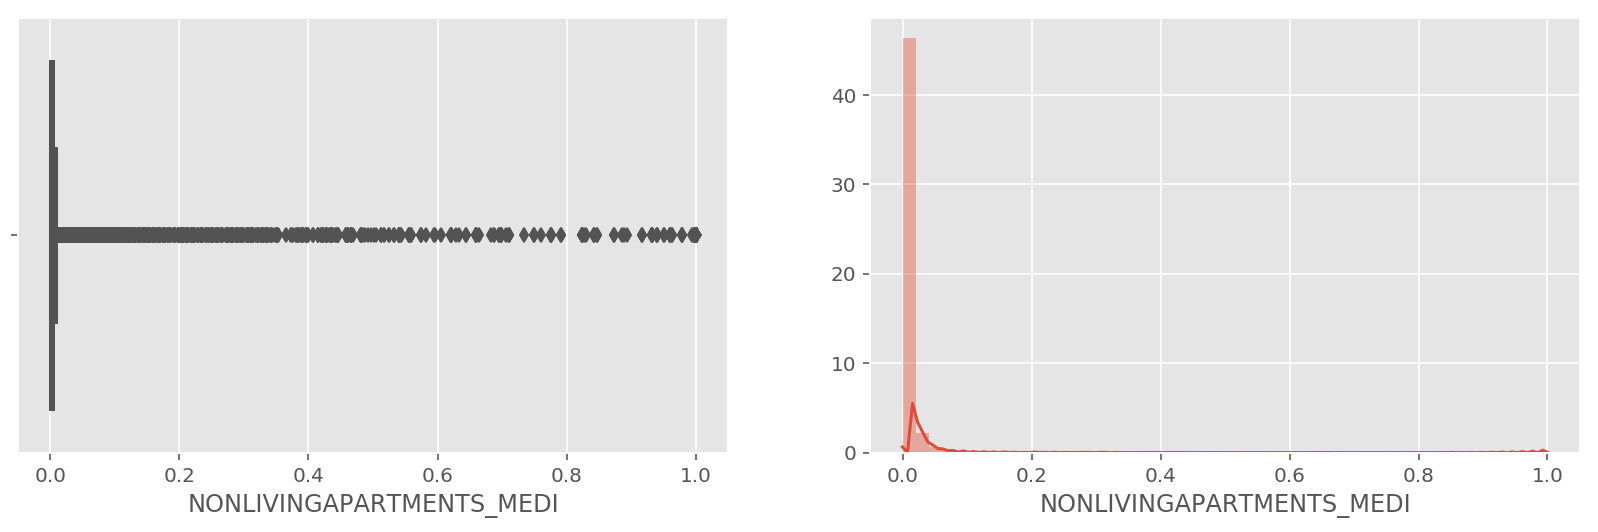

NONLIVINGAREA_MEDI: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      169682.000000
Percent        55.179164
Name: NONLIVINGAREA_MEDI, dtype: float64

count    137829.000000
mean          0.028236
std           0.070166
min           0.000000
25%           0.000000
50%           0.003100
75%           0.026600
max           1.000000
Name: NONLIVINGAREA_MEDI, dtype: float64


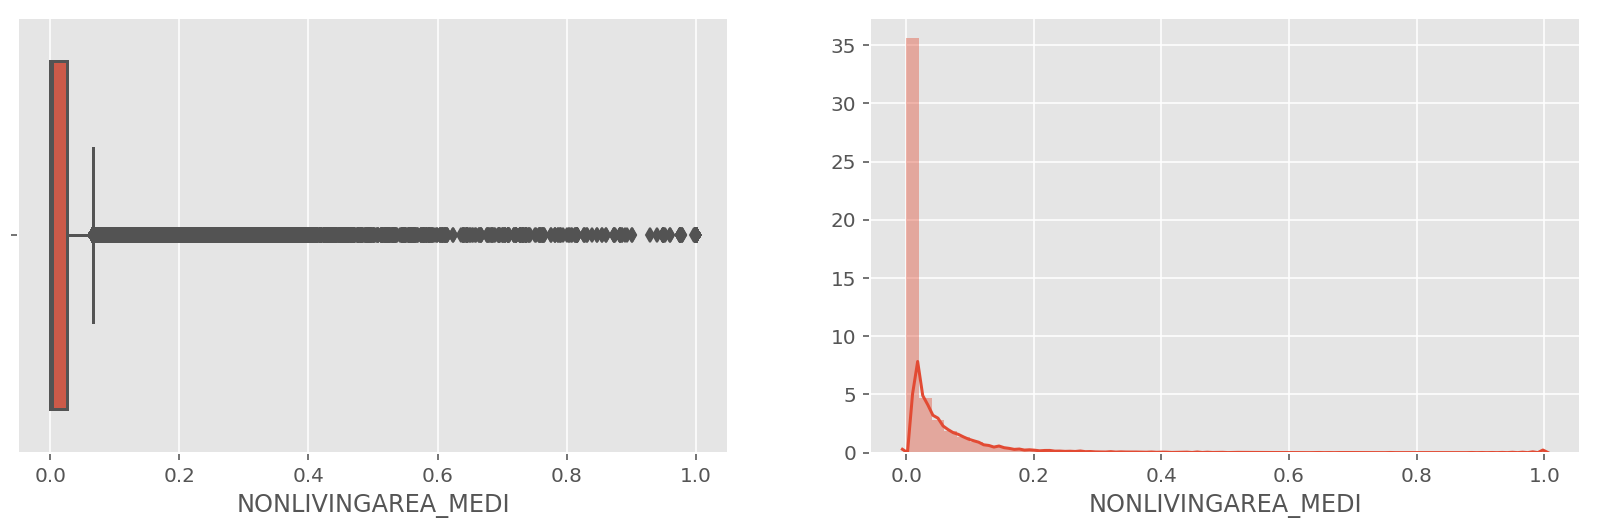

TOTALAREA_MODE: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      148431.000000
Percent        48.268517
Name: TOTALAREA_MODE, dtype: float64

count    159080.000000
mean          0.102547
std           0.107462
min           0.000000
25%           0.041200
50%           0.068800
75%           0.127600
max           1.000000
Name: TOTALAREA_MODE, dtype: float64


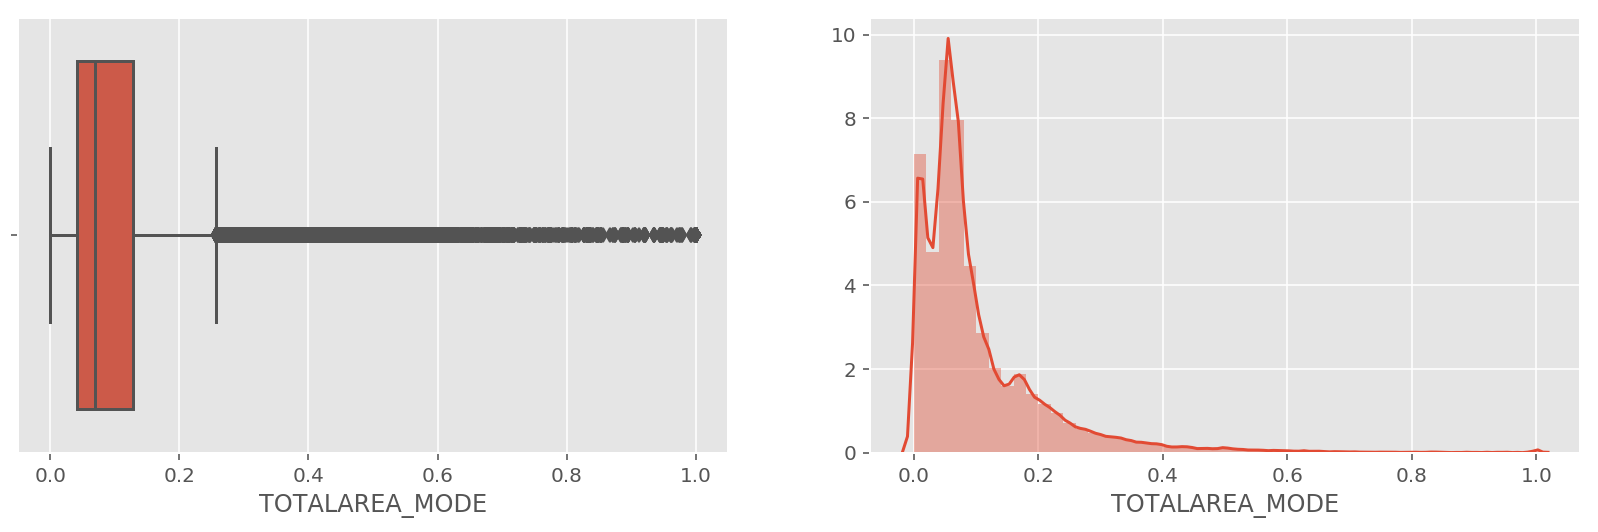

OBS_30_CNT_SOCIAL_CIRCLE: 

How many observation of client's social surroundings with observable 30 DPD (days past due) default

Table: ['application_{train|test}.csv']

Missing values:
Total      1021.000000
Percent       0.332021
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


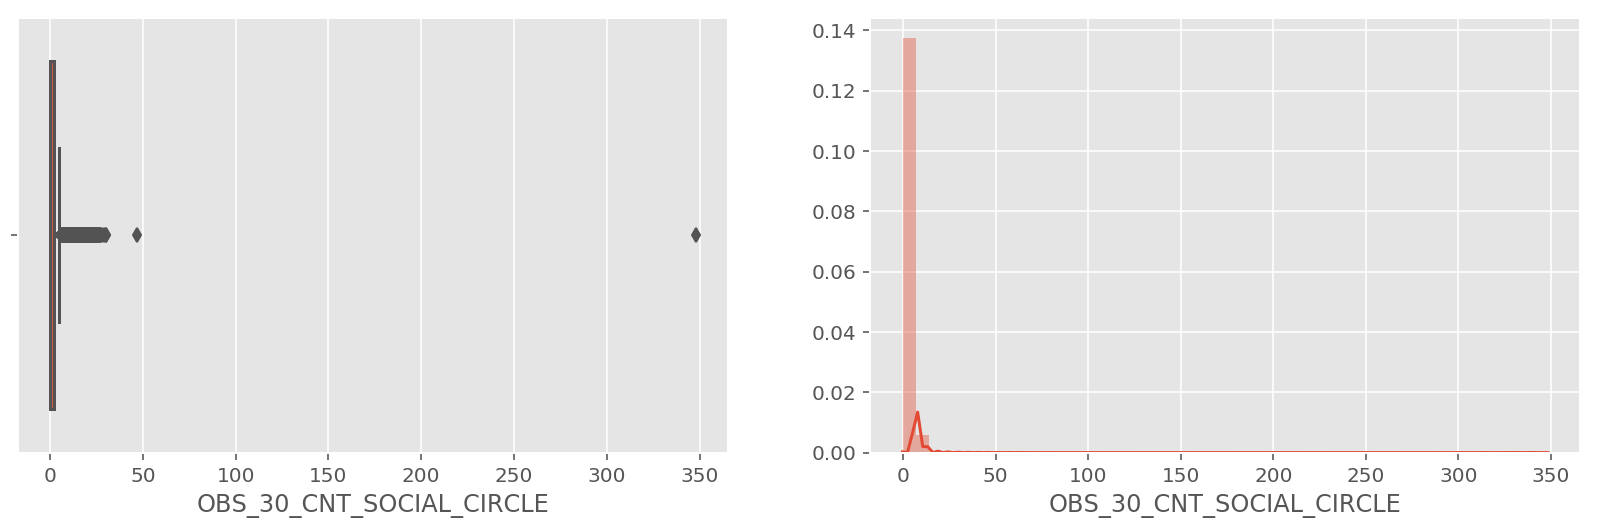

OBS_60_CNT_SOCIAL_CIRCLE: 

How many observation of client's social surroundings with observable 60 DPD (days past due) default

Table: ['application_{train|test}.csv']

Missing values:
Total      1021.000000
Percent       0.332021
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


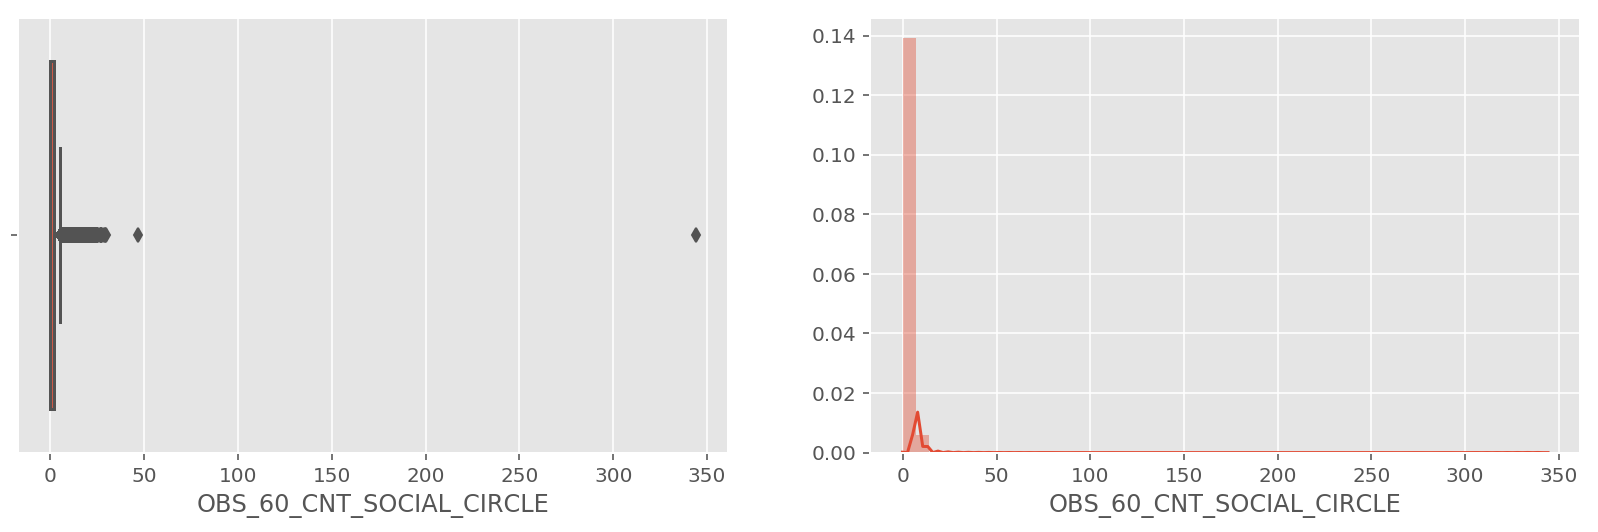

DAYS_LAST_PHONE_CHANGE: 

How many days before application did client change phone

Table: ['application_{train|test}.csv']

Missing values:
Total      1.000000
Percent    0.000325
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


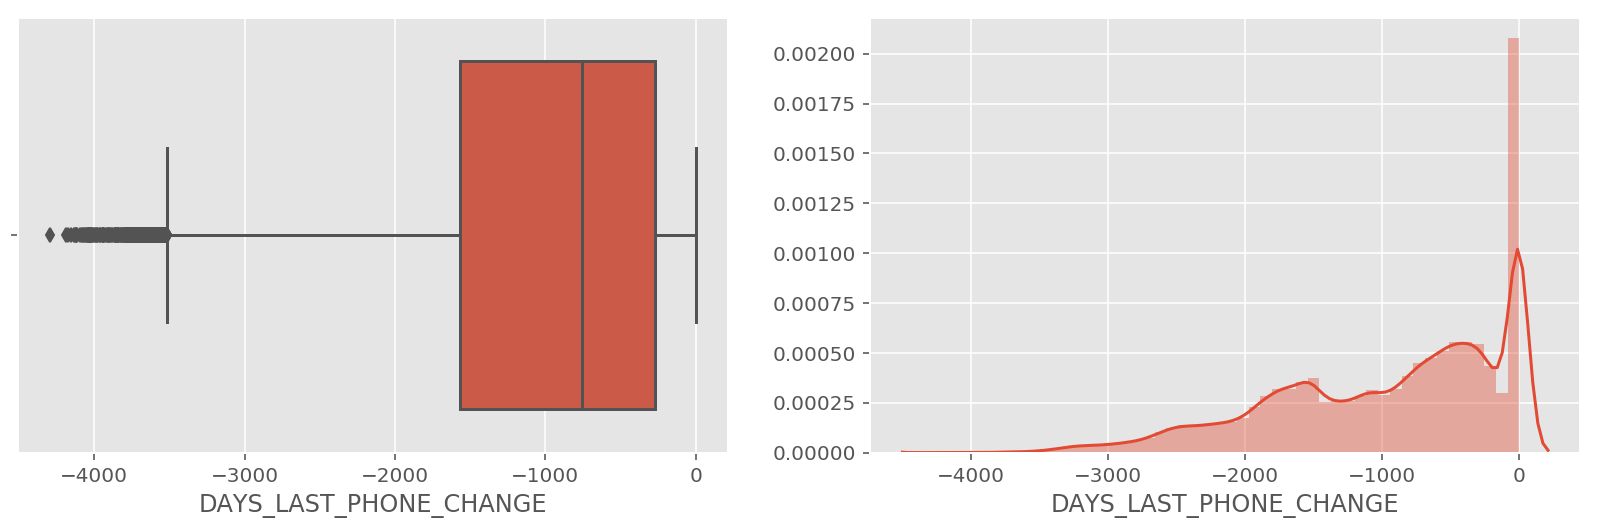

AMT_REQ_CREDIT_BUREAU_MON: 

Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)

Table: ['application_{train|test}.csv']

Missing values:
Total      41519.000000
Percent       13.501631
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


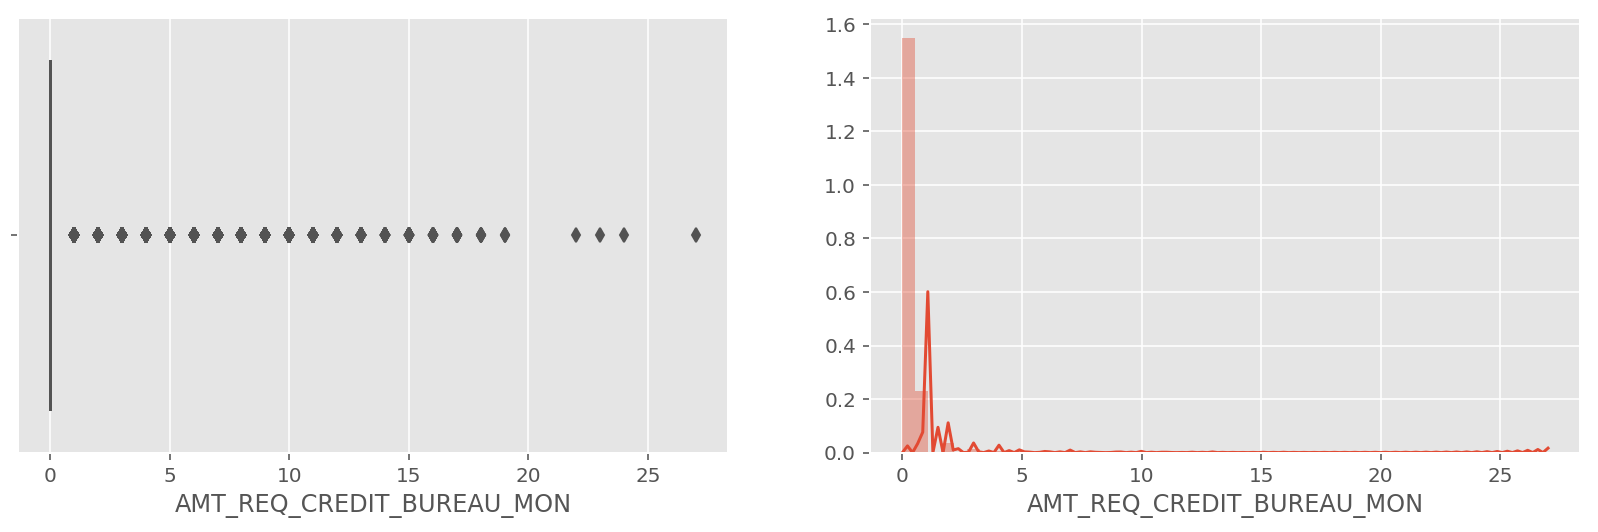

AMT_REQ_CREDIT_BUREAU_YEAR: 

Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)

Table: ['application_{train|test}.csv']

Missing values:
Total      41519.000000
Percent       13.501631
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


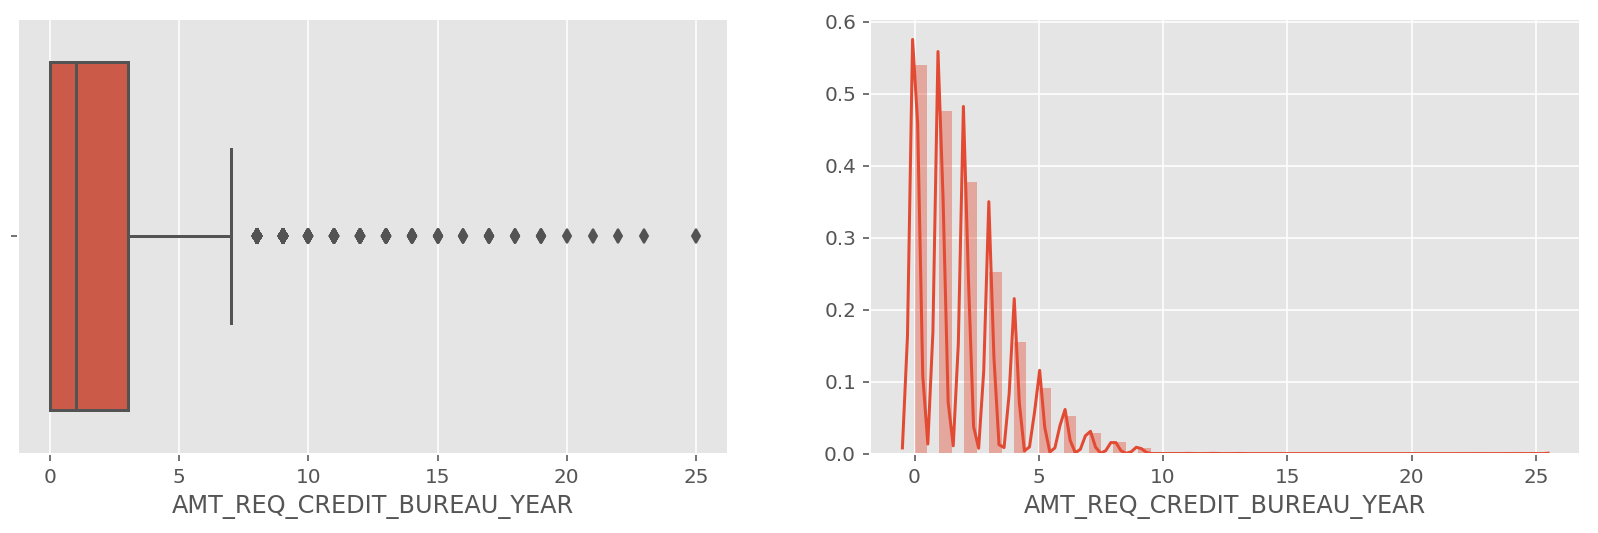

In [100]:
num_cols = application_train._get_numeric_data().columns
numeric_cols = []
for col in num_cols:
    if len(application_train[col].unique())>20:
        numeric_cols.append(col)
        col_name(col, col_description)
        print('Missing values:\n{}'.format(missing_application_train_data.loc[col,:]) + '\n')
        print(application_train[col].describe())
        plot_data(col, application_train)

## Categorical Features Summary

In [89]:
cat_cols = set(application_train.columns) - set(numeric_cols)

NAME_FAMILY_STATUS: 

Family status of the client

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: NAME_FAMILY_STATUS, dtype: float64

                       Percent   Total
Married               0.638780  196432
Single / not married  0.147780   45444
Civil marriage        0.096826   29775
Separated             0.064290   19770
Widow                 0.052317   16088
Unknown               0.000007       2


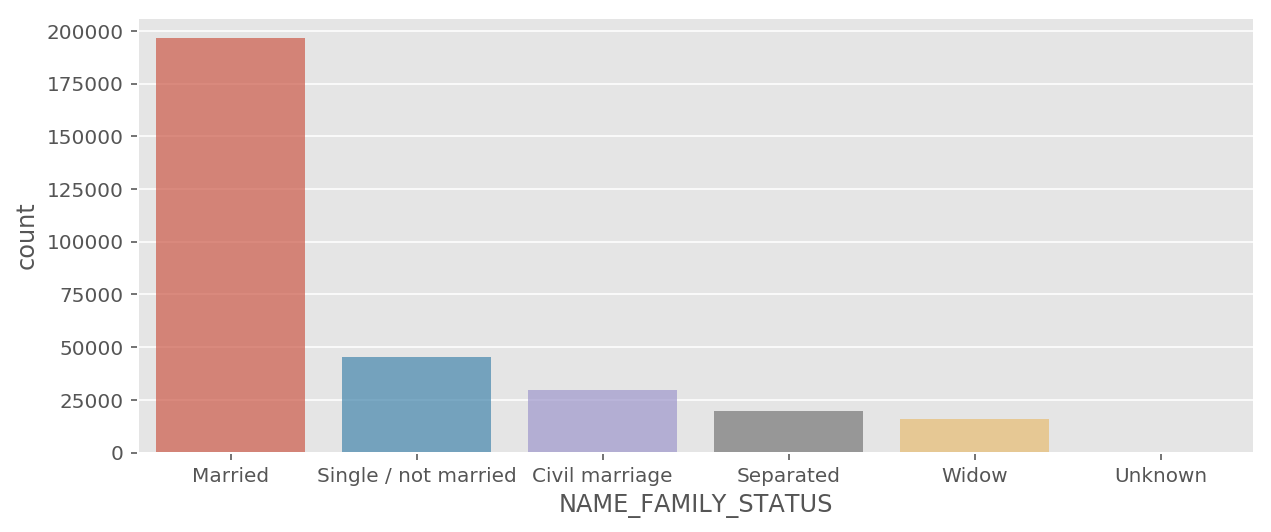

WEEKDAY_APPR_PROCESS_START: 

On which day of the week did the client apply for the loan

On which day of the week did the client apply for previous application

Table: ['application_{train|test}.csv' 'previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

            Percent  Total
TUESDAY    0.175282  53901
WEDNESDAY  0.168885  51934
MONDAY     0.164918  50714
THURSDAY   0.164518  50591
FRIDAY     0.163695  50338
SATURDAY   0.110084  33852
SUNDAY     0.052619  16181


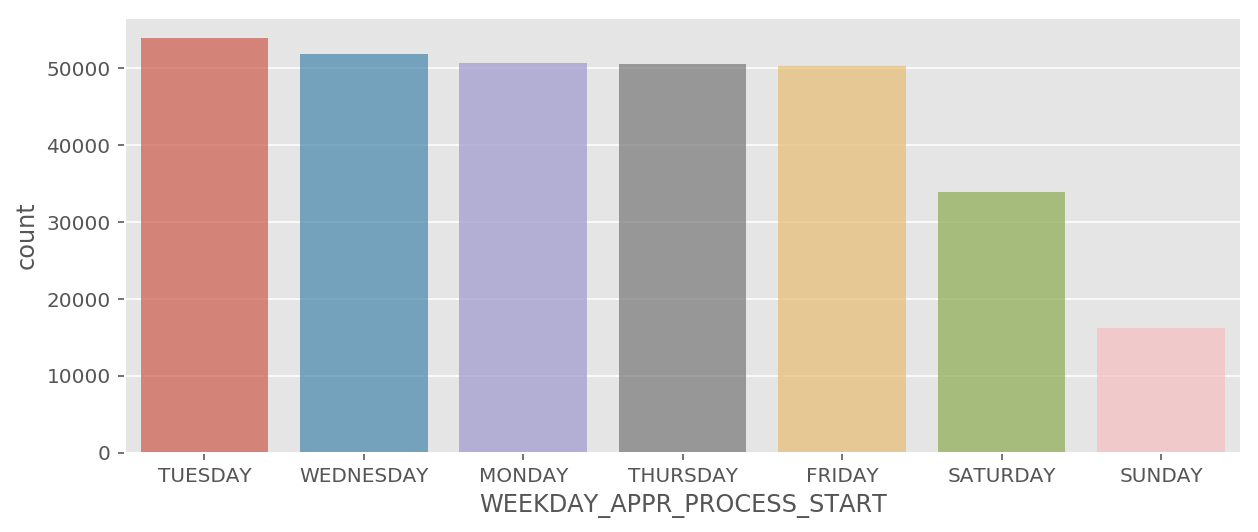

FLAG_DOCUMENT_3: 

Did client provide document 3

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_DOCUMENT_3, dtype: float64

    Percent   Total
1  0.710023  218340
0  0.289977   89171


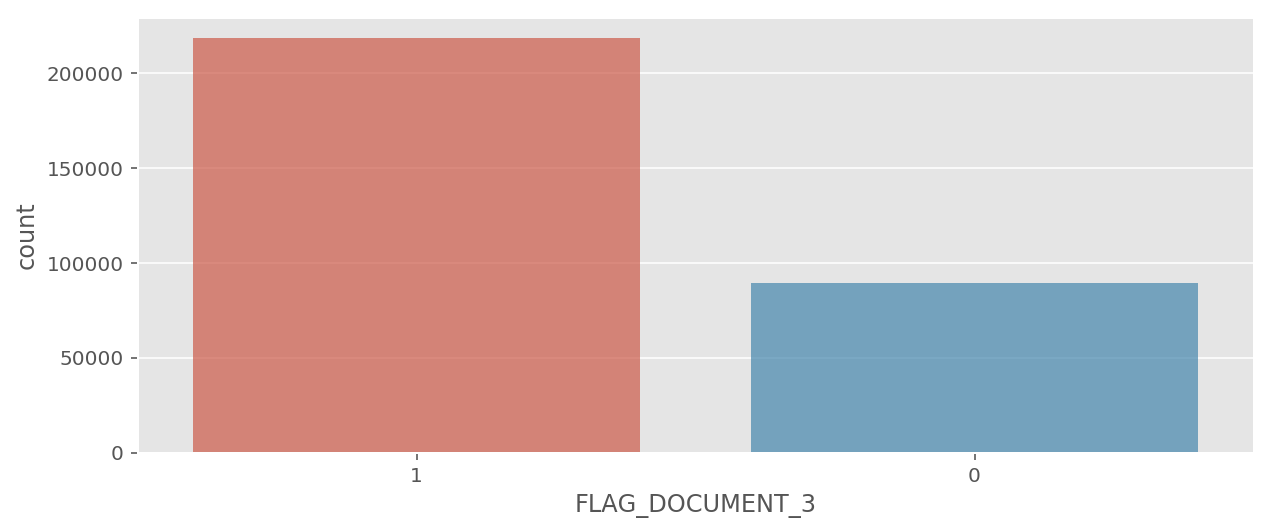

OCCUPATION_TYPE: 

What kind of occupation does the client have

Table: ['application_{train|test}.csv']

Missing values:
Total      96391.000000
Percent       31.345545
Name: OCCUPATION_TYPE, dtype: float64

                        Percent  Total
Laborers               0.261396  55186
Sales staff            0.152056  32102
Core staff             0.130589  27570
Managers               0.101227  21371
Drivers                0.088116  18603
High skill tech staff  0.053903  11380
Accountants            0.046481   9813
Medicine staff         0.040437   8537
Security staff         0.031835   6721
Cooking staff          0.028164   5946
Cleaning staff         0.022040   4653
Private service staff  0.012562   2652
Low-skill Laborers     0.009914   2093
Waiters/barmen staff   0.006385   1348
Secretaries            0.006181   1305
Realty agents          0.003557    751
HR staff               0.002667    563
IT staff               0.002491    526


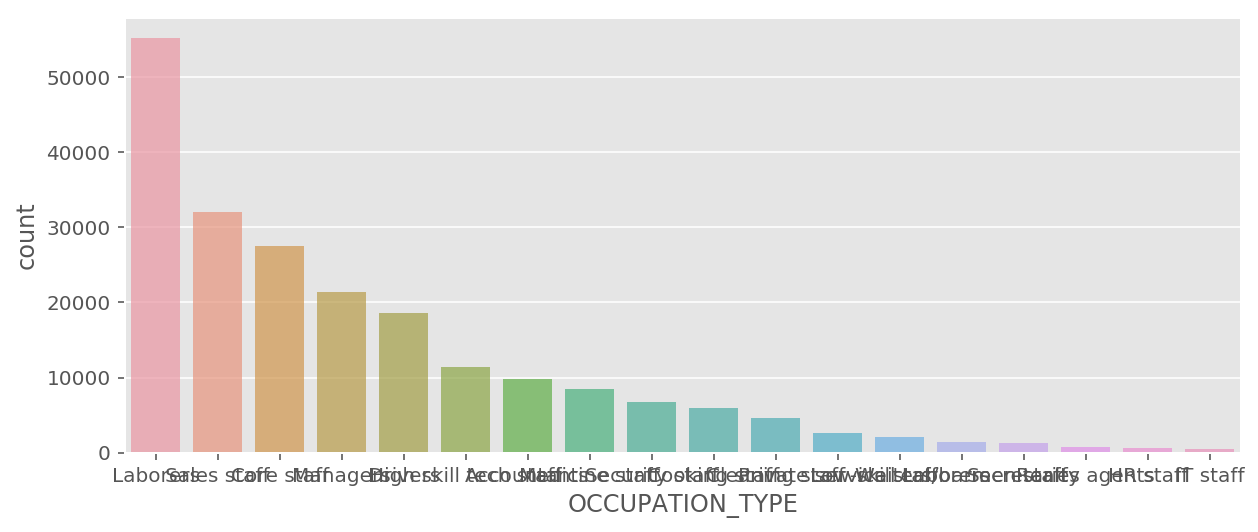

FLAG_OWN_CAR: 

Flag if the client owns a car

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_OWN_CAR, dtype: float64

    Percent   Total
N  0.659892  202924
Y  0.340108  104587


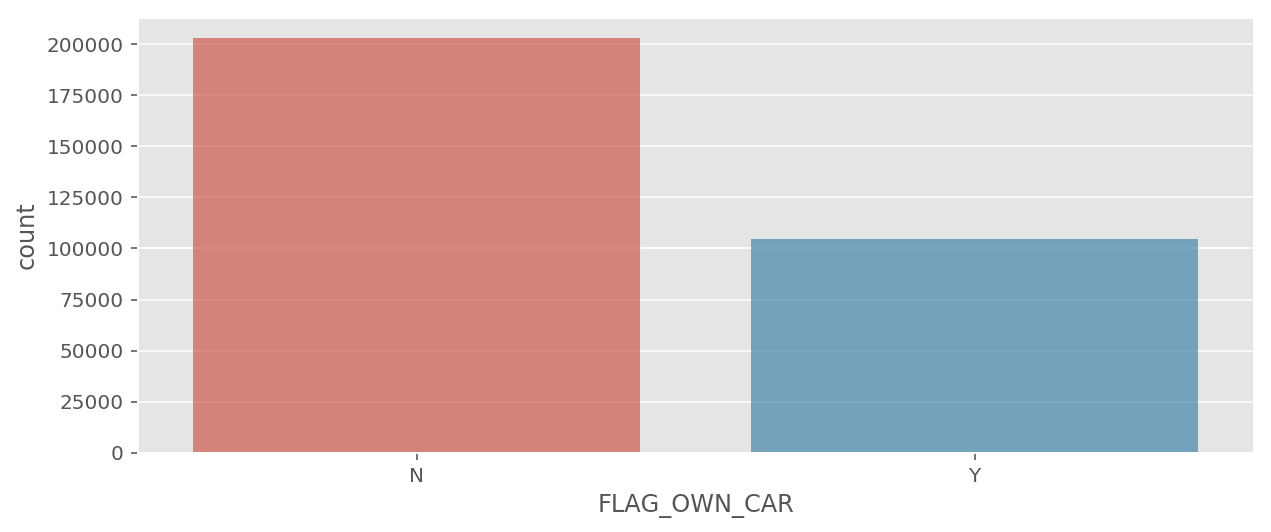

REGION_RATING_CLIENT_W_CITY: 

Our rating of the region where client lives with taking city into account (1,2,3)

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

    Percent   Total
2  0.746263  229484
3  0.142629   43860
1  0.111108   34167


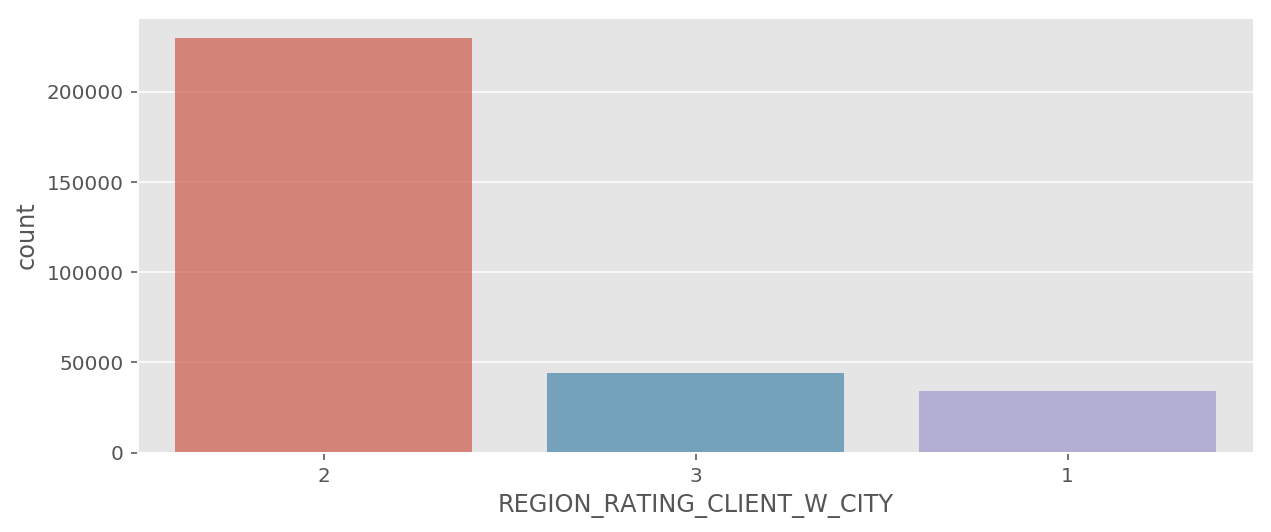

FONDKAPREMONT_MODE: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      210295.000000
Percent        68.386172
Name: FONDKAPREMONT_MODE, dtype: float64

                        Percent  Total
reg oper account       0.759443  73830
reg oper spec account  0.124259  12080
not specified          0.058499   5687
org spec account       0.057799   5619


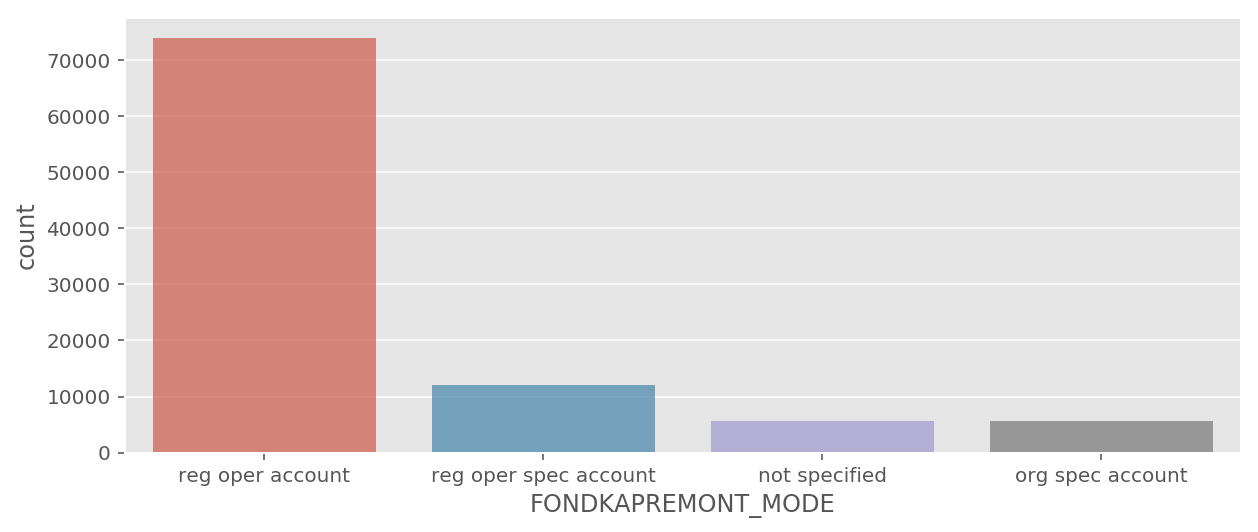

FLAG_DOCUMENT_15: 

Did client provide document 15

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_DOCUMENT_15, dtype: float64

   Percent   Total
0  0.99879  307139
1  0.00121     372


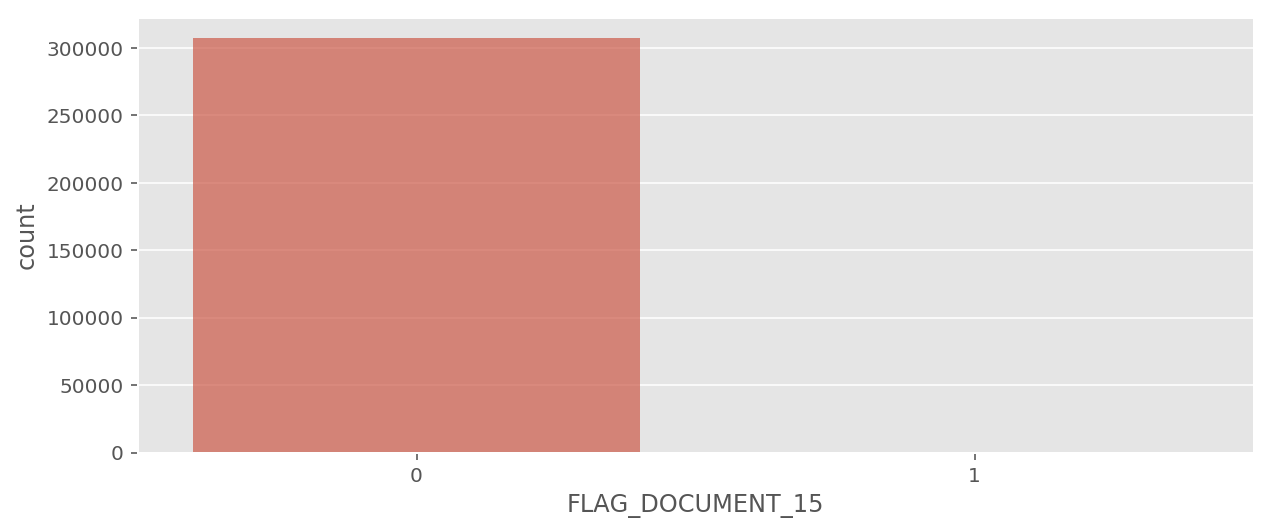

FLAG_PHONE: 

Did client provide home phone (1=YES, 0=NO)

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_PHONE, dtype: float64

    Percent   Total
0  0.718934  221080
1  0.281066   86431


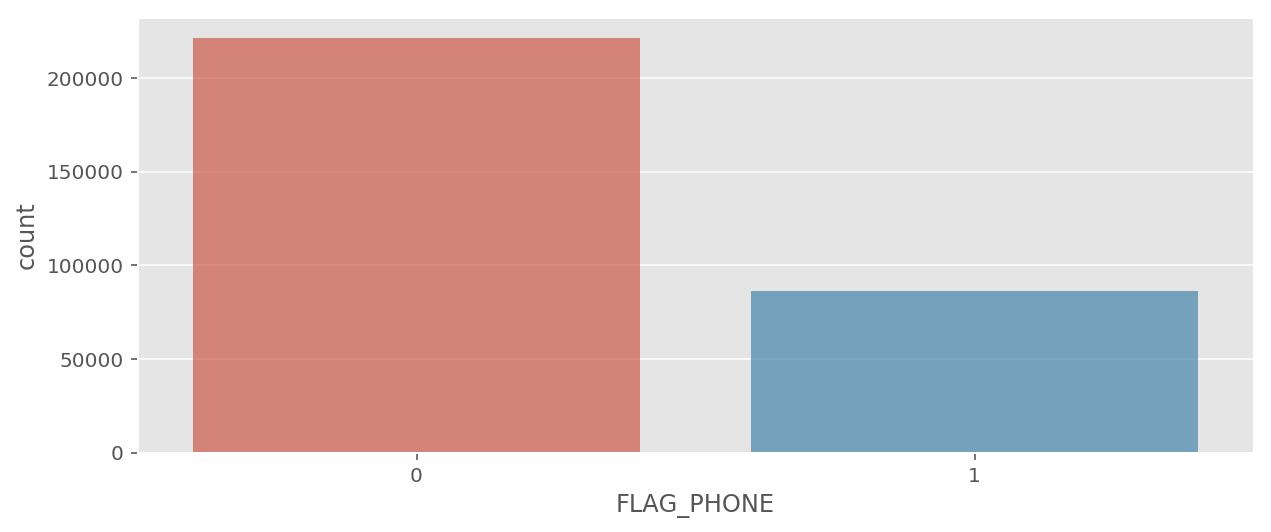

NAME_INCOME_TYPE: 

Clients income type (businessman, working, maternity leave,…)

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: NAME_INCOME_TYPE, dtype: float64

                       Percent   Total
Working               0.516320  158774
Commercial associate  0.232892   71617
Pensioner             0.180033   55362
State servant         0.070576   21703
Unemployed            0.000072      22
Student               0.000059      18
Businessman           0.000033      10
Maternity leave       0.000016       5


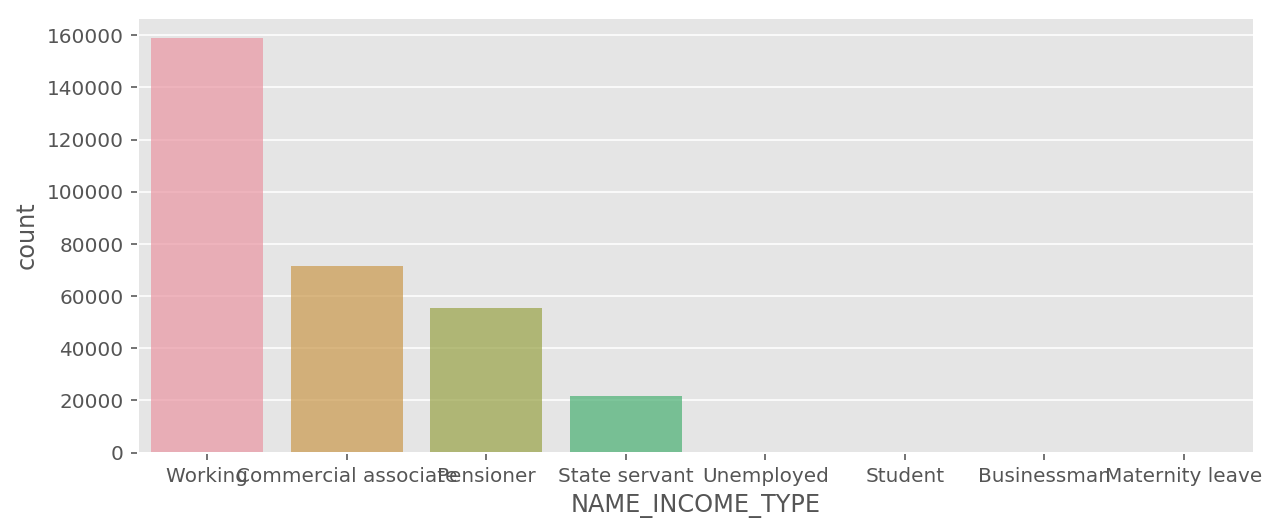

FLAG_DOCUMENT_21: 

Did client provide document 21

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_DOCUMENT_21, dtype: float64

    Percent   Total
0  0.999665  307408
1  0.000335     103


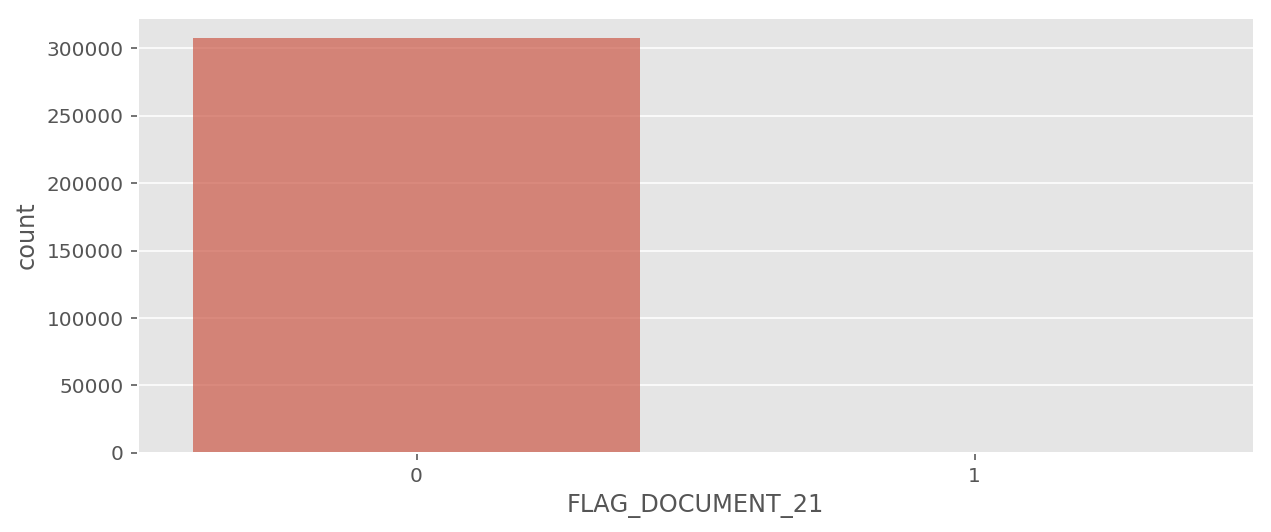

CODE_GENDER: 

Gender of the client

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: CODE_GENDER, dtype: float64

      Percent   Total
F    0.658344  202448
M    0.341643  105059
XNA  0.000013       4


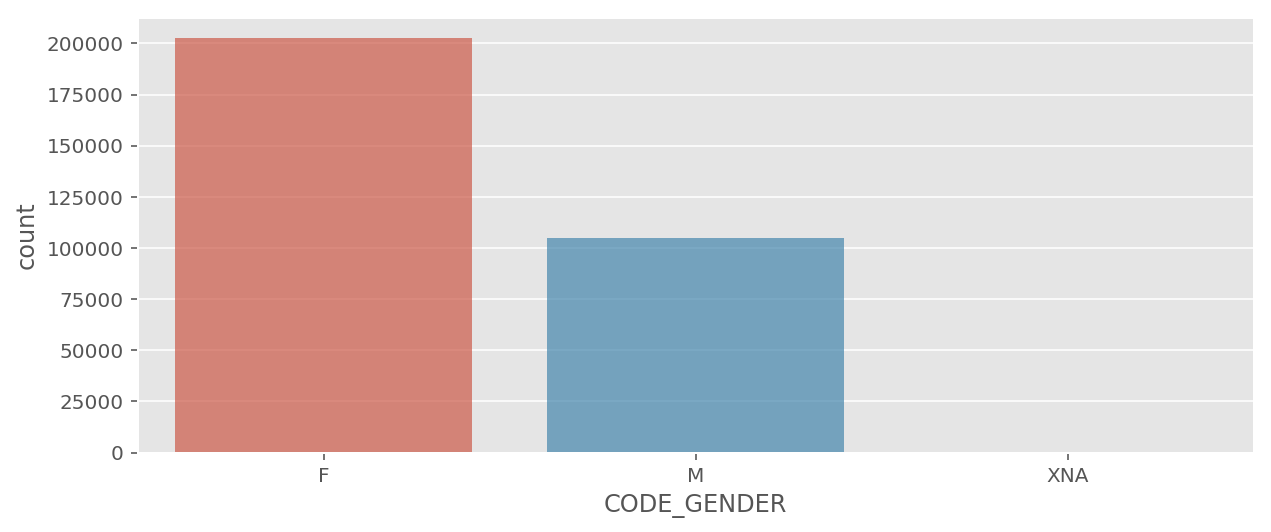

AMT_REQ_CREDIT_BUREAU_HOUR: 

Number of enquiries to Credit Bureau about the client one hour before application

Table: ['application_{train|test}.csv']

Missing values:
Total      41519.000000
Percent       13.501631
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

      Percent   Total
0.0  0.993887  264366
1.0  0.005865    1560
2.0  0.000211      56
3.0  0.000034       9
4.0  0.000004       1


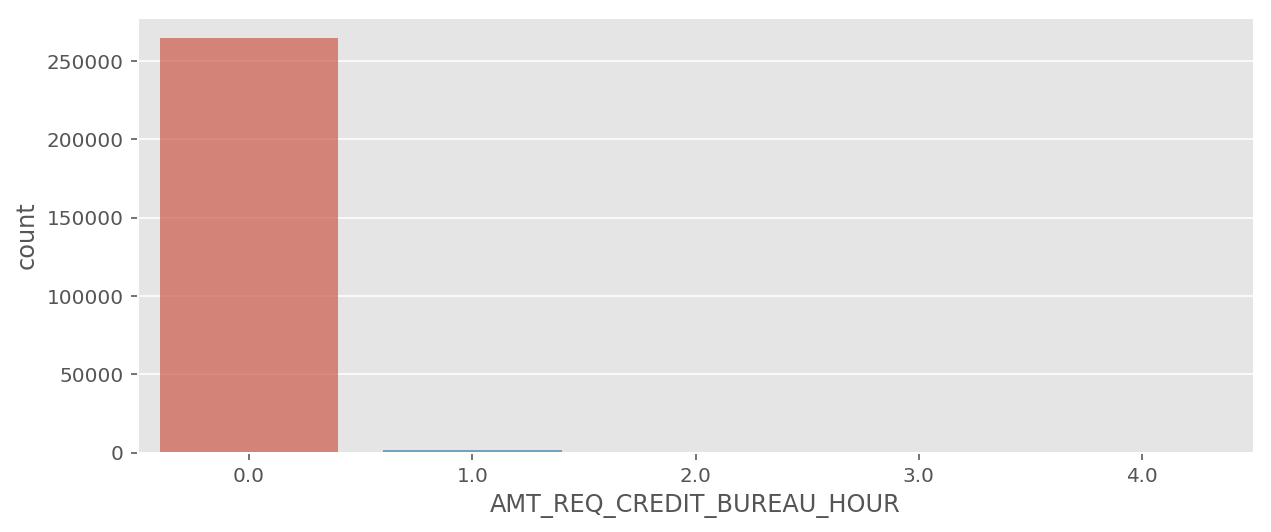

NAME_EDUCATION_TYPE: 

Level of highest education the client achieved

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: NAME_EDUCATION_TYPE, dtype: float64

                                Percent   Total
Secondary / secondary special  0.710189  218391
Higher education               0.243448   74863
Incomplete higher              0.033420   10277
Lower secondary                0.012409    3816
Academic degree                0.000533     164


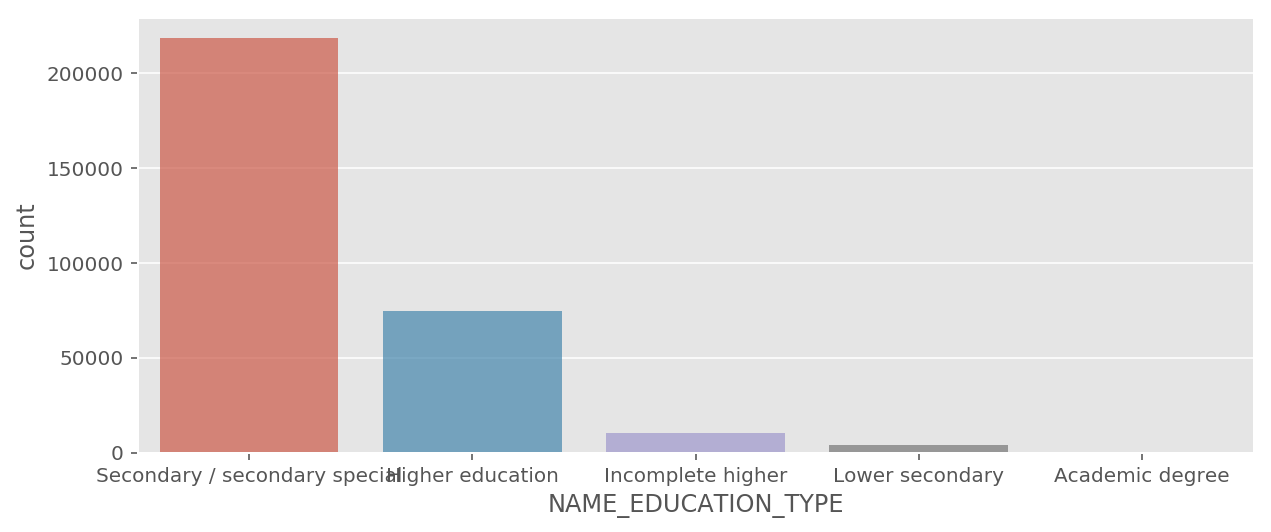

FLAG_DOCUMENT_12: 

Did client provide document 12

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_DOCUMENT_12, dtype: float64

    Percent   Total
0  0.999993  307509
1  0.000007       2


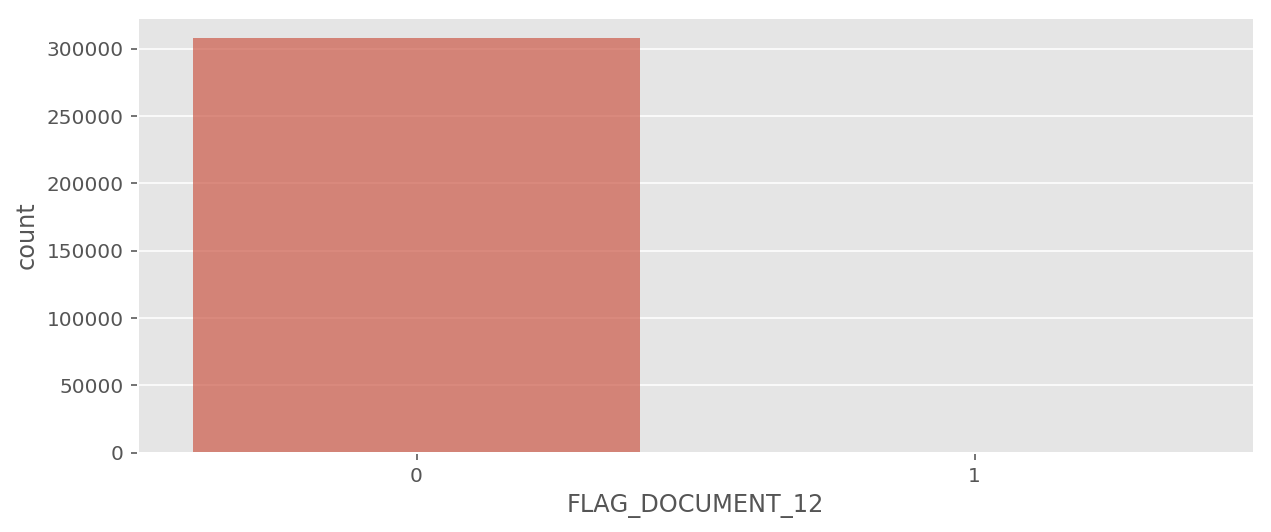

FLAG_DOCUMENT_17: 

Did client provide document 17

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_DOCUMENT_17, dtype: float64

    Percent   Total
0  0.999733  307429
1  0.000267      82


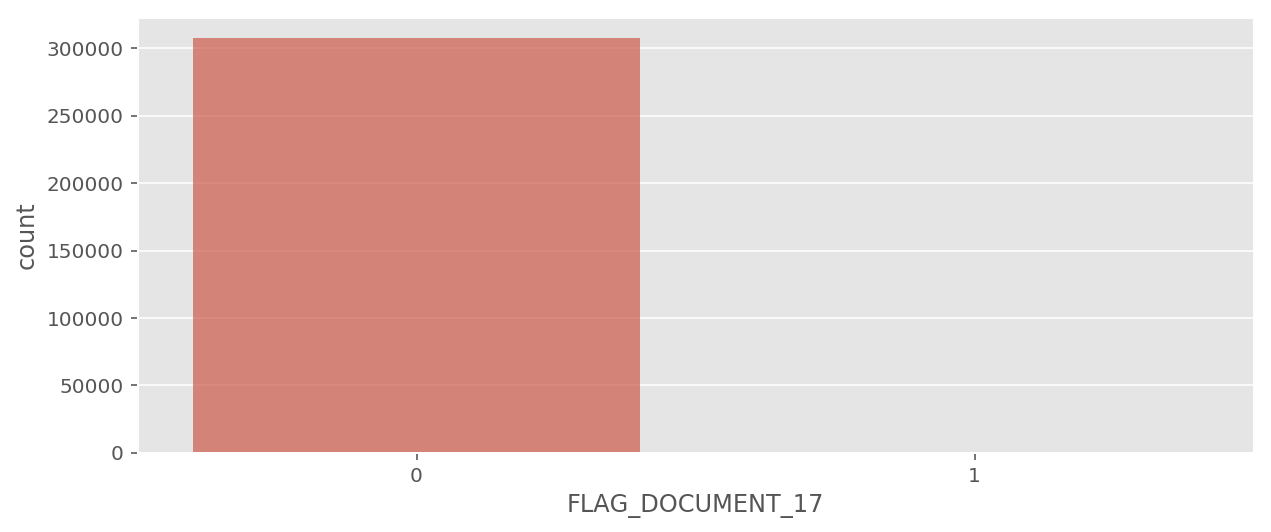

ORGANIZATION_TYPE: 

Type of organization where client works

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: ORGANIZATION_TYPE, dtype: float64

                         Percent  Total
Business Entity Type 3  0.221104  67992
XNA                     0.180072  55374
Self-employed           0.124913  38412
Other                   0.054252  16683
Medicine                0.036399  11193
Business Entity Type 2  0.034317  10553
Government              0.033833  10404
School                  0.028919   8893
Trade: type 7           0.025466   7831
Kindergarten            0.022373   6880
Construction            0.021856   6721
Business Entity Type 1  0.019459   5984
Transport: type 4       0.017554   5398
Trade: type 3           0.011356   3492
Industry: type 9        0.010952   3368
Industry: type 3        0.010660   3278
Security                0.010559   3247
Housing                 0.009619   2958
Industry: type 11       0.008793   2704
Military  

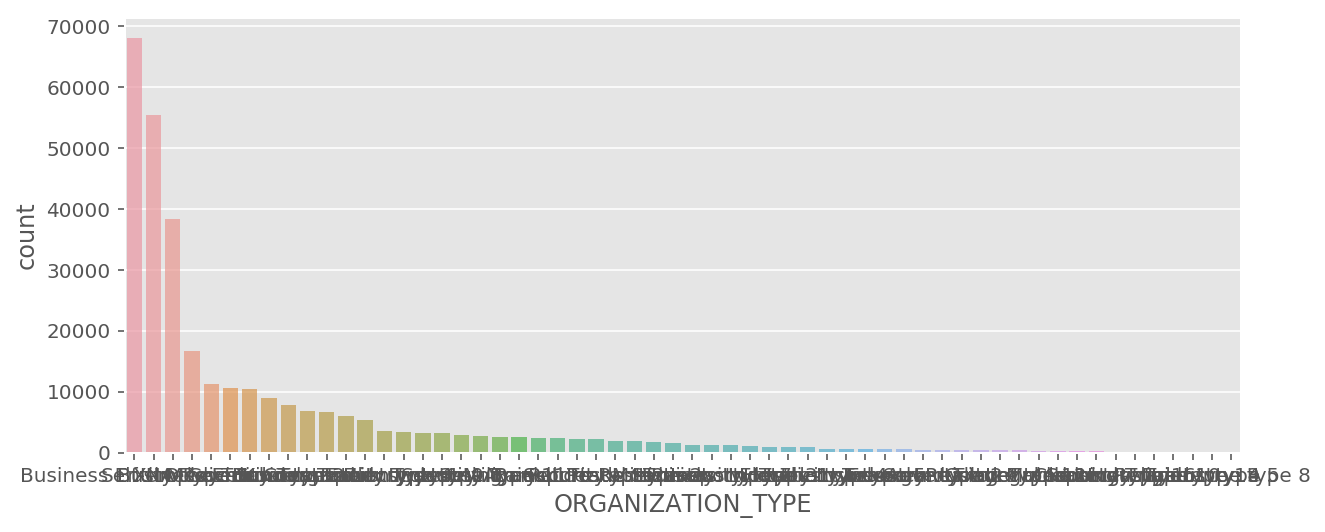

REG_REGION_NOT_LIVE_REGION: 

Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64

    Percent   Total
0  0.984856  302854
1  0.015144    4657


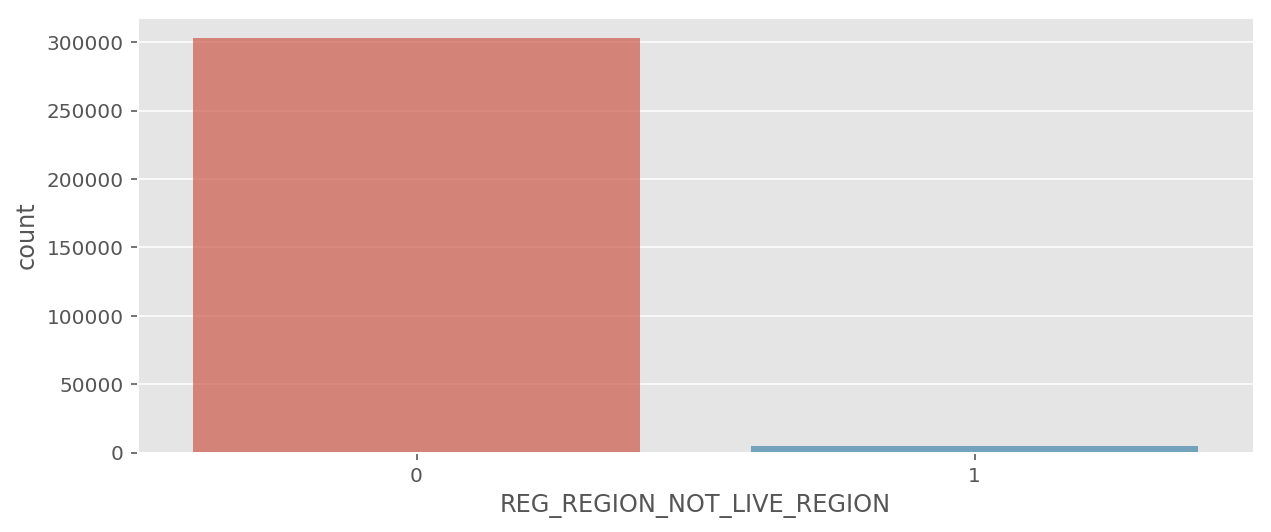

FLAG_DOCUMENT_16: 

Did client provide document 16

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_DOCUMENT_16, dtype: float64

    Percent   Total
0  0.990072  304458
1  0.009928    3053


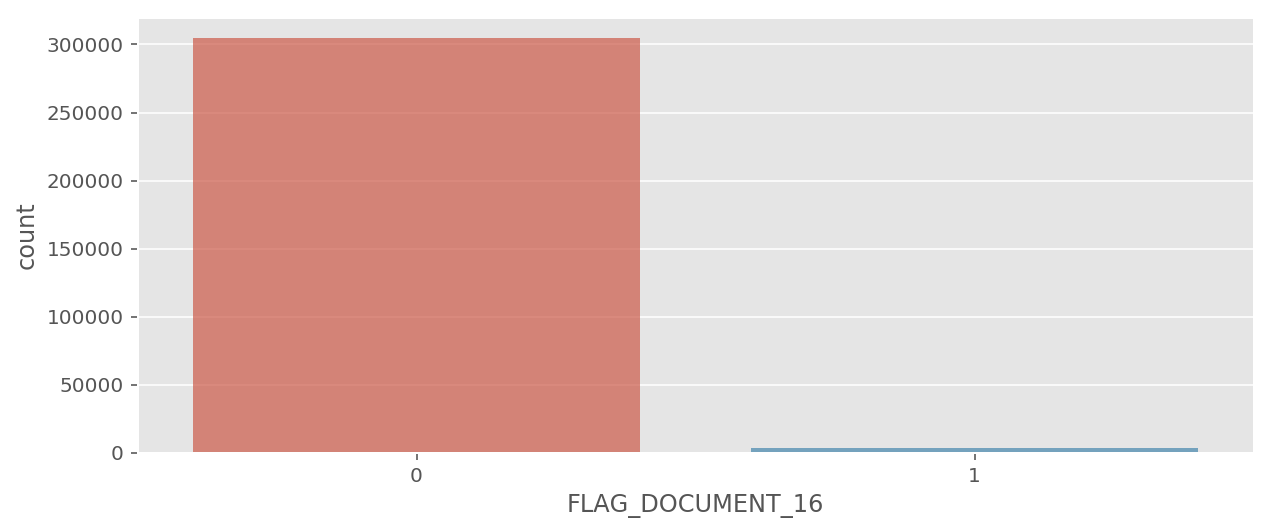

FLAG_EMAIL: 

Did client provide email (1=YES, 0=NO)

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_EMAIL, dtype: float64

   Percent   Total
0  0.94328  290069
1  0.05672   17442


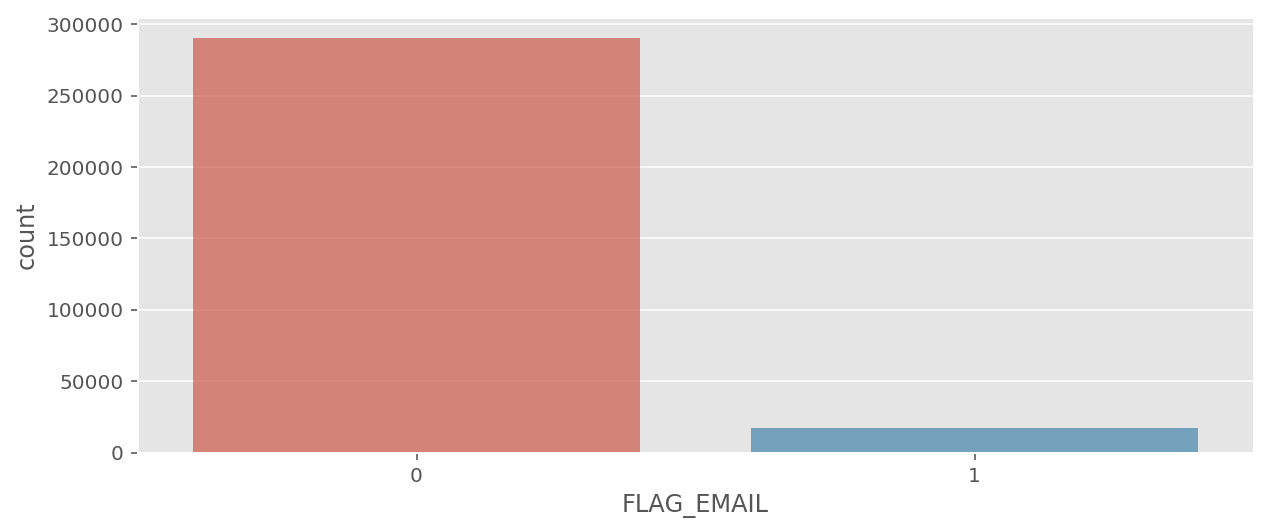

FLAG_OWN_REALTY: 

Flag if client owns a house or flat

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_OWN_REALTY, dtype: float64

    Percent   Total
Y  0.693673  213312
N  0.306327   94199


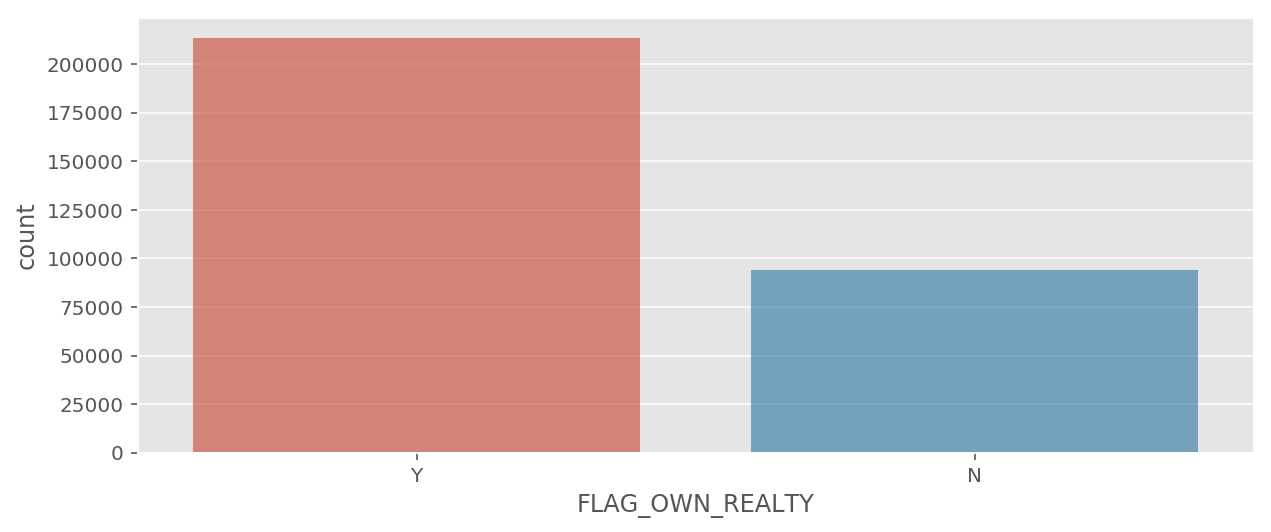

FLAG_DOCUMENT_10: 

Did client provide document 10

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_DOCUMENT_10, dtype: float64

    Percent   Total
0  0.999977  307504
1  0.000023       7


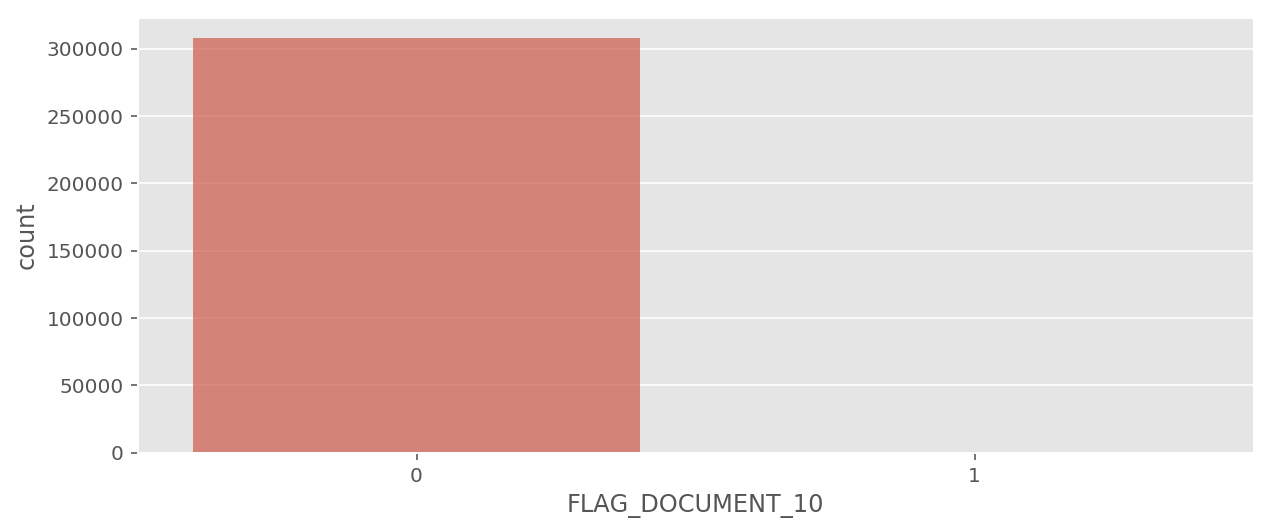

FLAG_DOCUMENT_7: 

Did client provide document 7

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_DOCUMENT_7, dtype: float64

    Percent   Total
0  0.999808  307452
1  0.000192      59


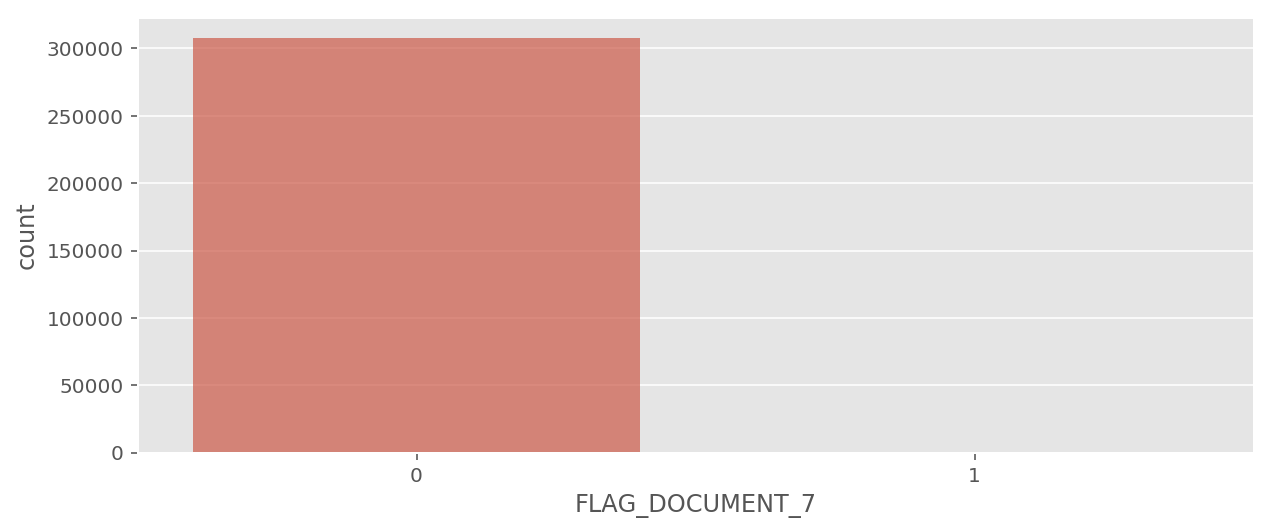

FLAG_DOCUMENT_4: 

Did client provide document 4

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_DOCUMENT_4, dtype: float64

    Percent   Total
0  0.999919  307486
1  0.000081      25


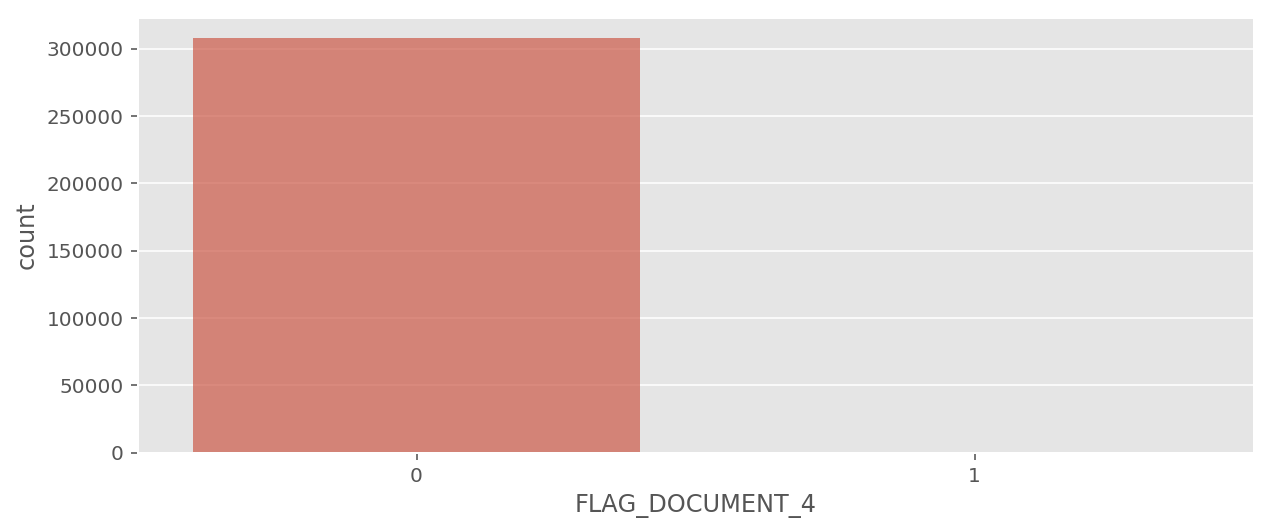

FLAG_DOCUMENT_14: 

Did client provide document 14

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_DOCUMENT_14, dtype: float64

    Percent   Total
0  0.997064  306608
1  0.002936     903


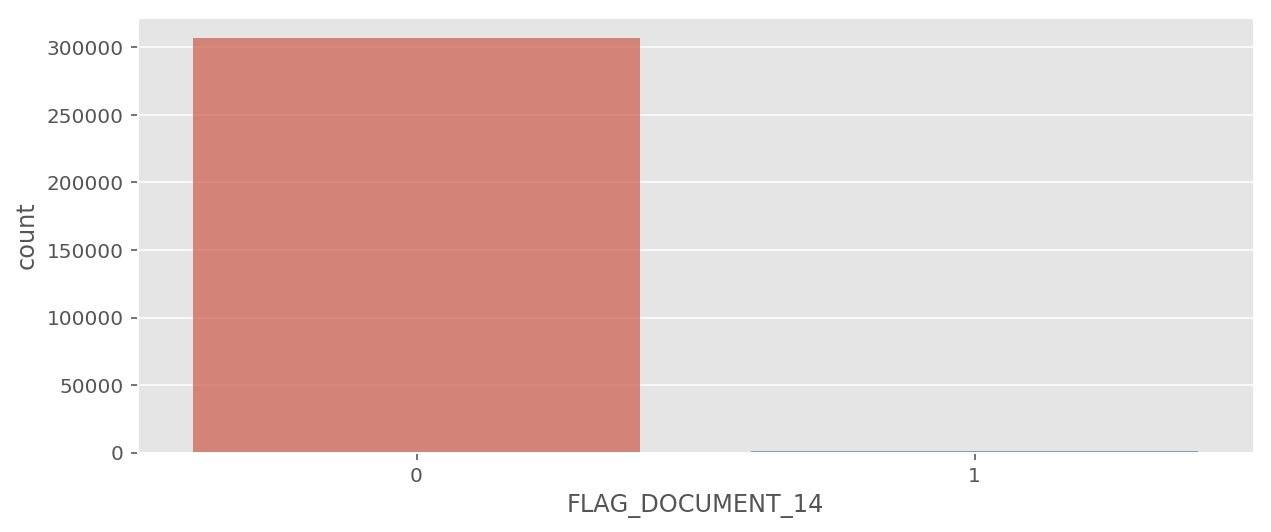

REG_REGION_NOT_WORK_REGION: 

Flag if client's permanent address does not match work address (1=different, 0=same, at region level)

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: REG_REGION_NOT_WORK_REGION, dtype: float64

    Percent   Total
0  0.949231  291899
1  0.050769   15612


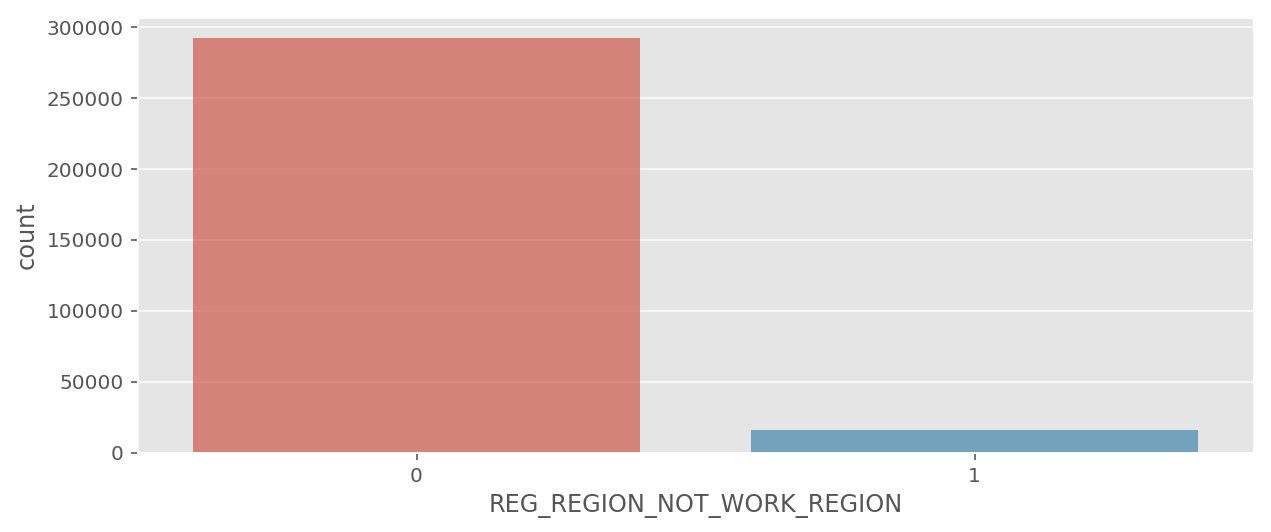

FLAG_DOCUMENT_11: 

Did client provide document 11

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_DOCUMENT_11, dtype: float64

    Percent   Total
0  0.996088  306308
1  0.003912    1203


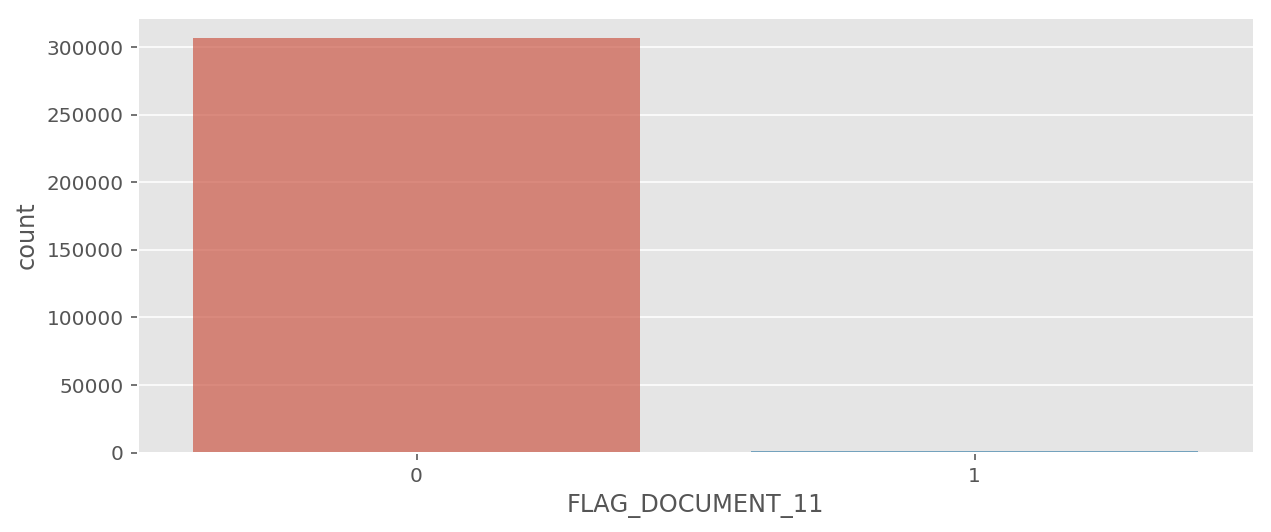

LIVE_REGION_NOT_WORK_REGION: 

Flag if client's contact address does not match work address (1=different, 0=same, at region level)

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64

    Percent   Total
0  0.959341  295008
1  0.040659   12503


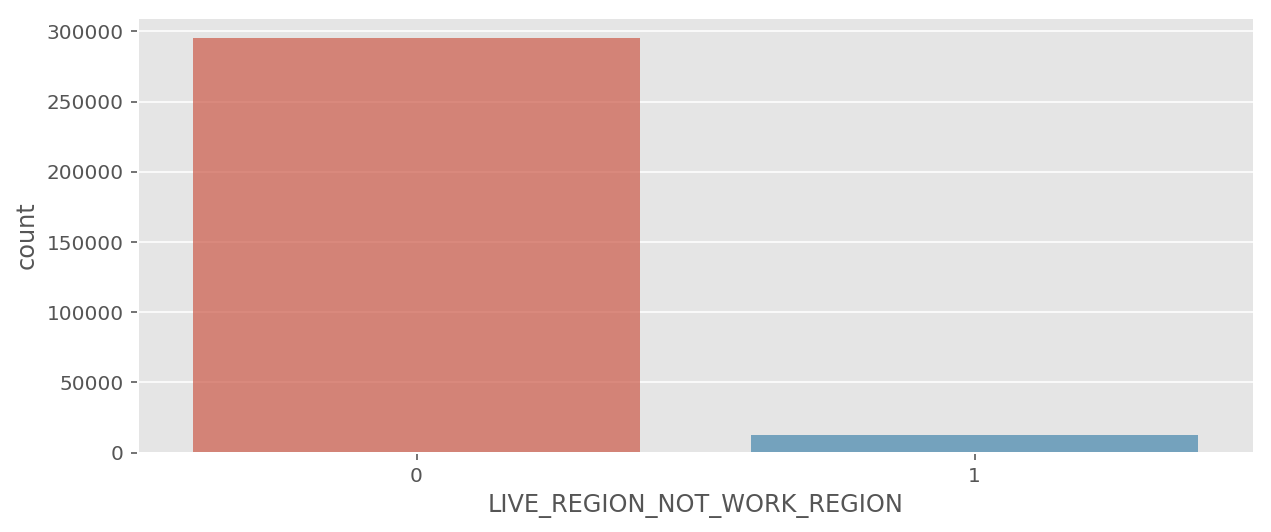

FLAG_DOCUMENT_2: 

Did client provide document 2

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_DOCUMENT_2, dtype: float64

    Percent   Total
0  0.999958  307498
1  0.000042      13


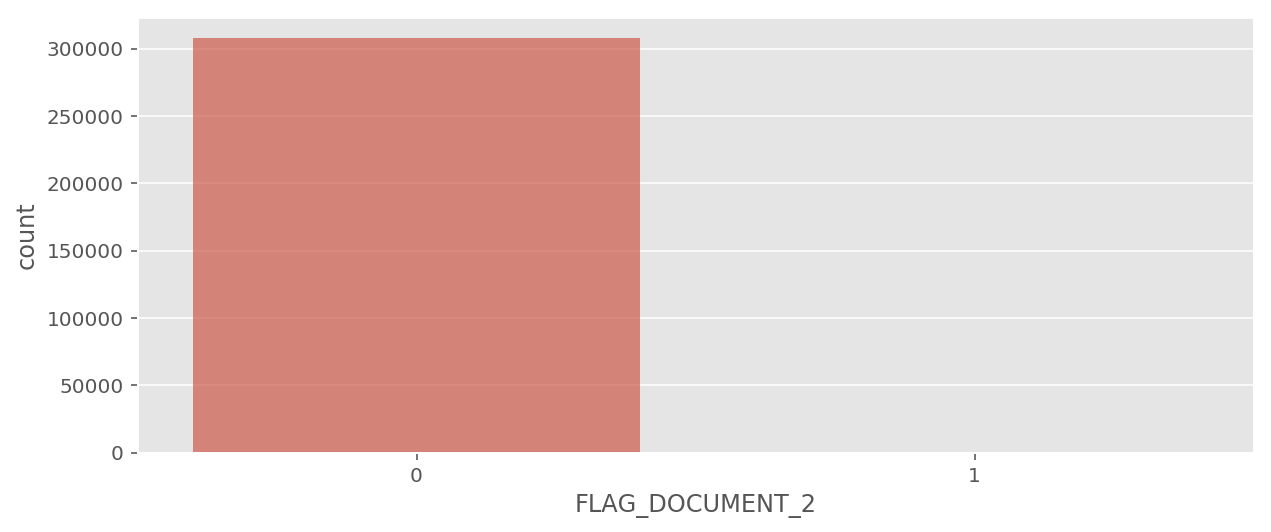

WALLSMATERIAL_MODE: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      156341.000000
Percent        50.840783
Name: WALLSMATERIAL_MODE, dtype: float64

               Percent  Total
Panel         0.436859  66040
Stone, brick  0.428756  64815
Block         0.061209   9253
Wooden        0.035470   5362
Mixed         0.015188   2296
Monolithic    0.011768   1779
Others        0.010749   1625


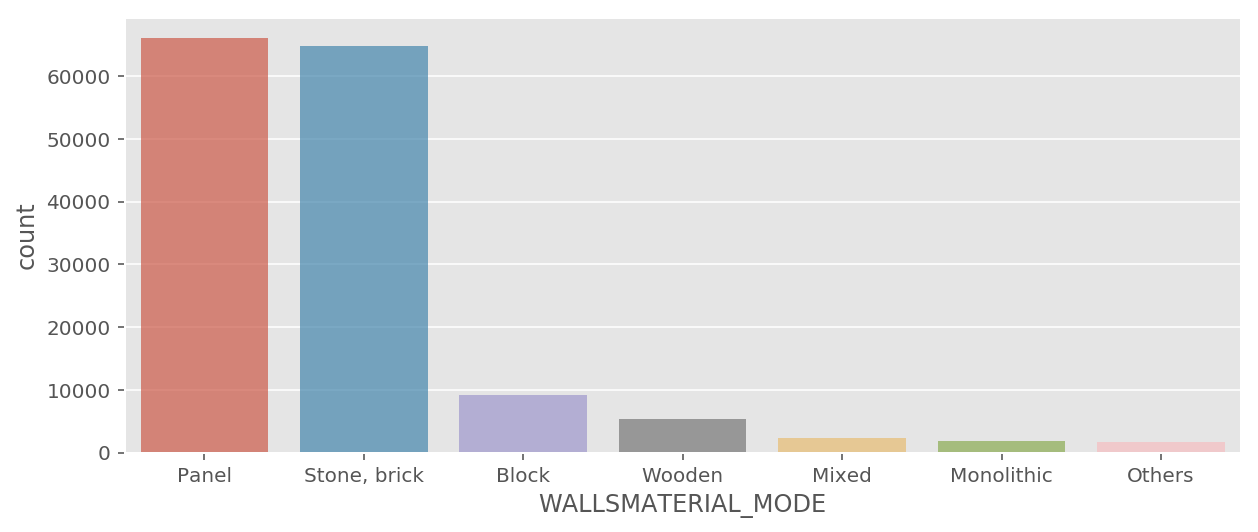

FLAG_DOCUMENT_19: 

Did client provide document 19

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_DOCUMENT_19, dtype: float64

    Percent   Total
0  0.999405  307328
1  0.000595     183


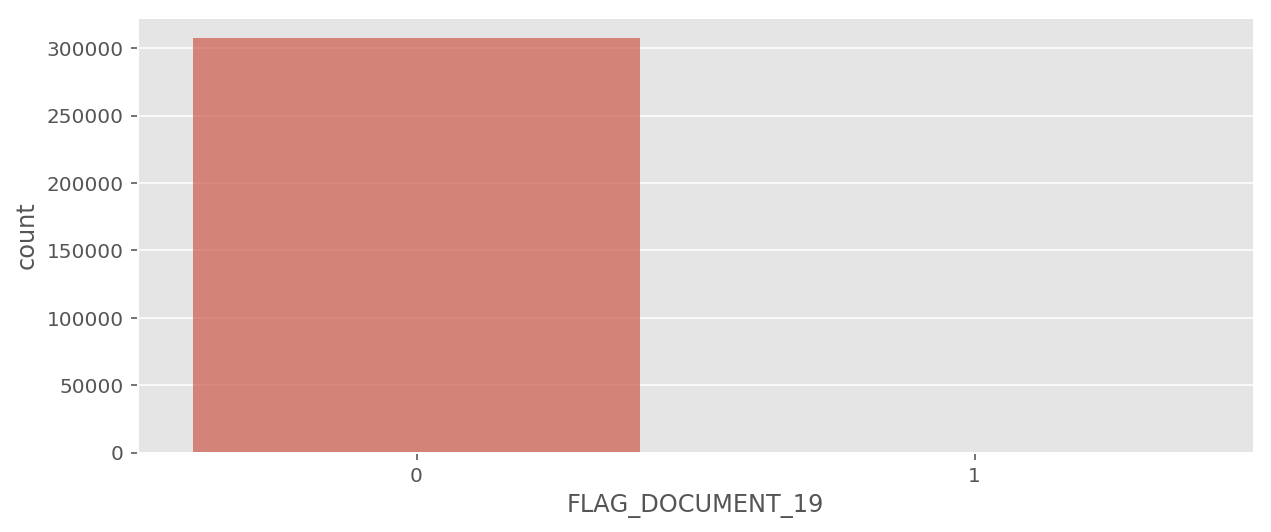

REG_CITY_NOT_LIVE_CITY: 

Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64

    Percent   Total
0  0.921827  283472
1  0.078173   24039


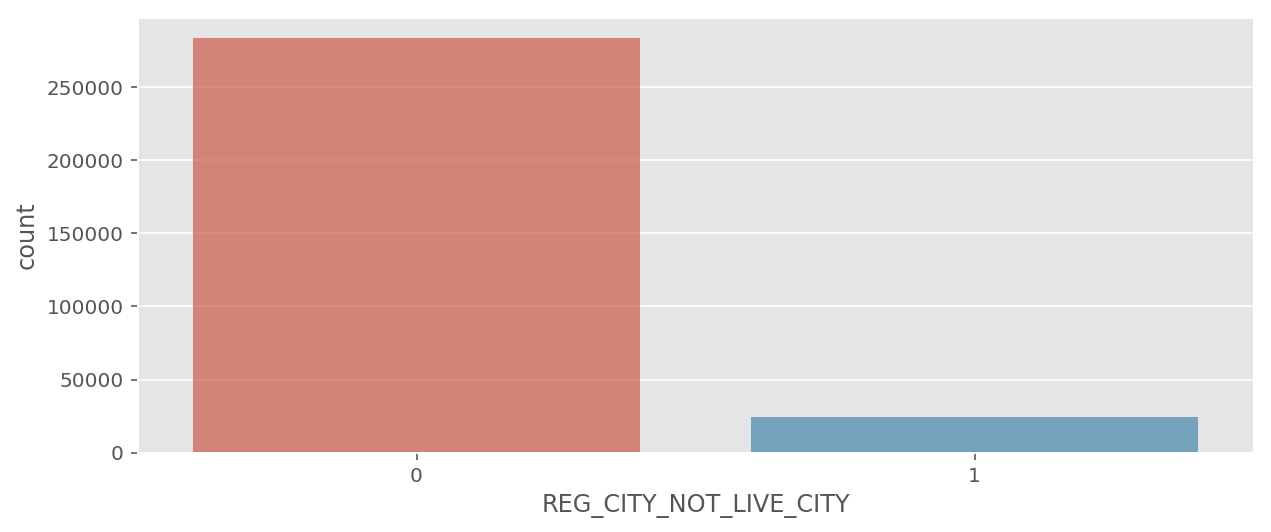

FLAG_DOCUMENT_6: 

Did client provide document 6

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_DOCUMENT_6, dtype: float64

    Percent   Total
0  0.911945  280433
1  0.088055   27078


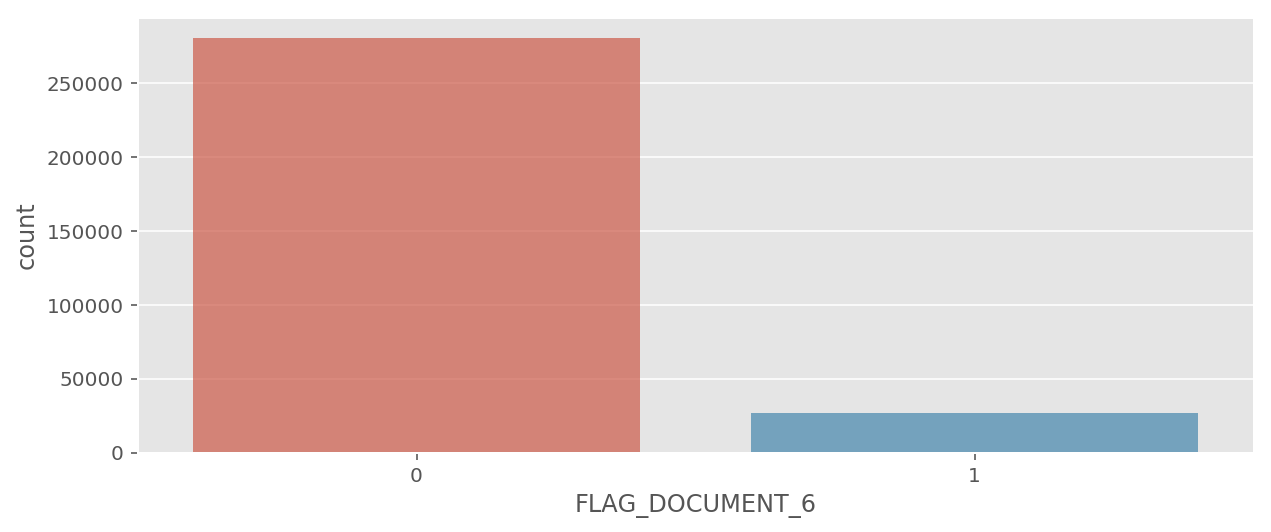

FLAG_DOCUMENT_20: 

Did client provide document 20

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_DOCUMENT_20, dtype: float64

    Percent   Total
0  0.999493  307355
1  0.000507     156


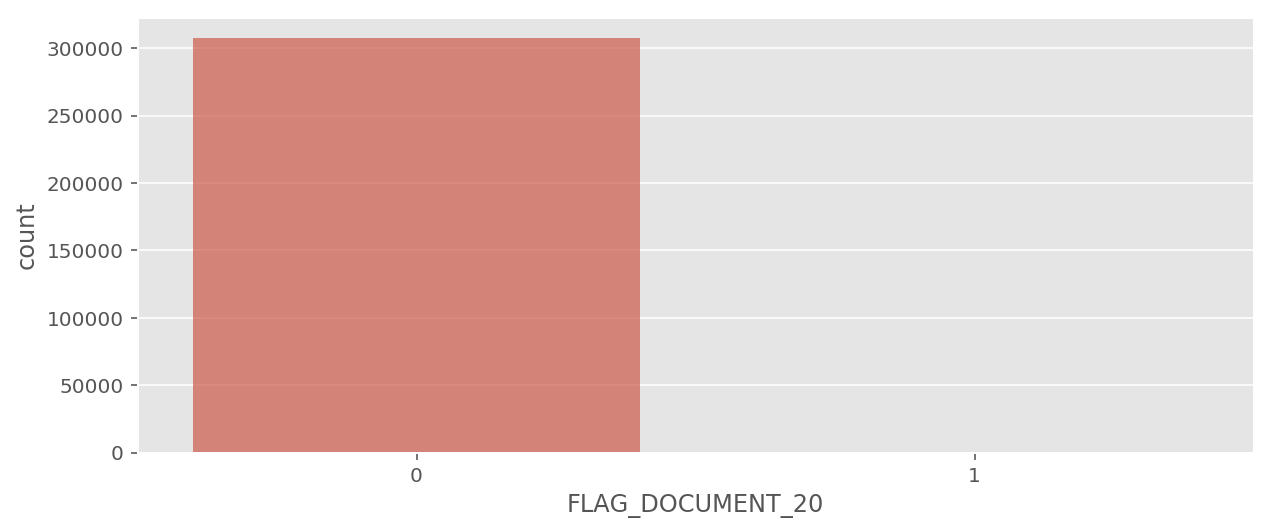

LIVE_CITY_NOT_WORK_CITY: 

Flag if client's contact address does not match work address (1=different, 0=same, at city level)

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64

    Percent   Total
0  0.820445  252296
1  0.179555   55215


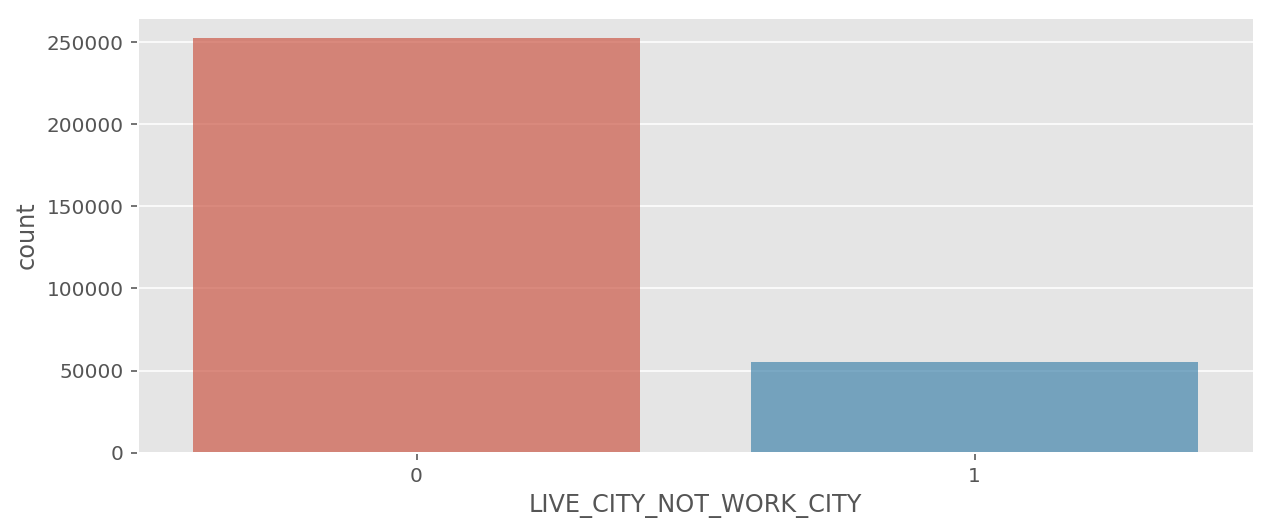

NAME_CONTRACT_TYPE: 

Identification if loan is cash or revolving

Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application

Table: ['application_{train|test}.csv' 'previous_application.csv']

Missing values:
Total      0.0
Percent    0.0
Name: NAME_CONTRACT_TYPE, dtype: float64

                  Percent   Total
Cash loans       0.904787  278232
Revolving loans  0.095213   29279


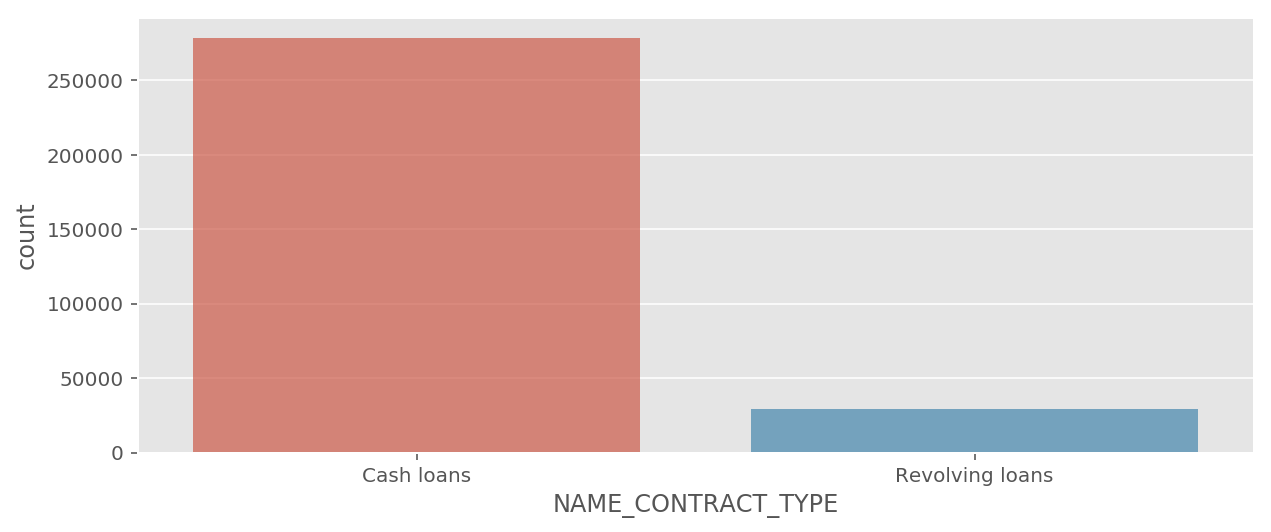

FLAG_DOCUMENT_18: 

Did client provide document 18

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_DOCUMENT_18, dtype: float64

   Percent   Total
0  0.99187  305011
1  0.00813    2500


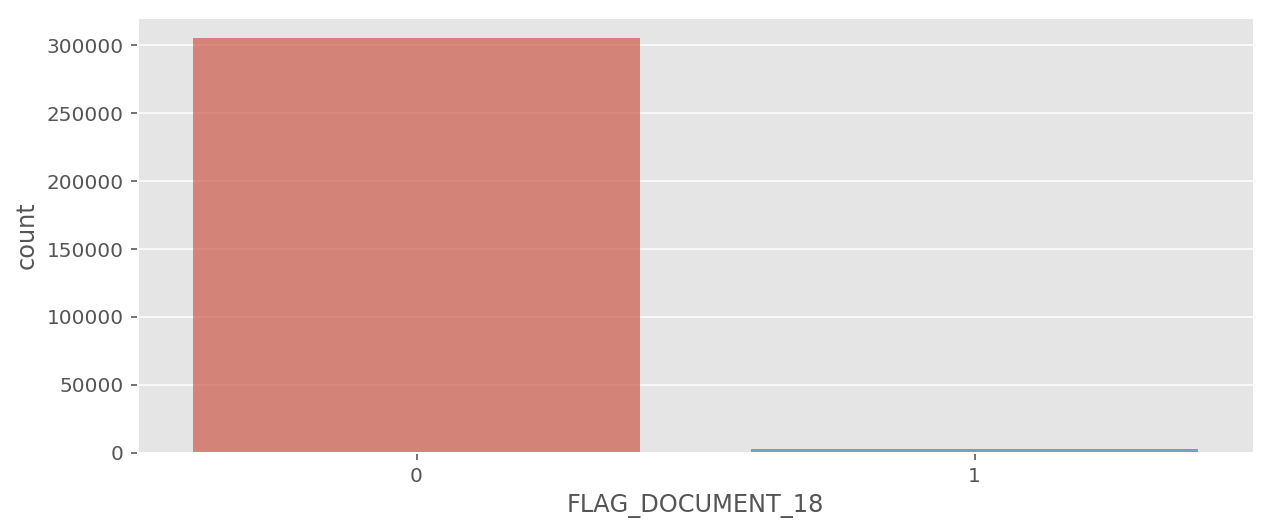

AMT_REQ_CREDIT_BUREAU_QRT: 

Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)

Table: ['application_{train|test}.csv']

Missing values:
Total      41519.000000
Percent       13.501631
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

        Percent   Total
0.0    0.809863  215417
1.0    0.127305   33862
2.0    0.054182   14412
3.0    0.006455    1717
4.0    0.001790     476
5.0    0.000241      64
6.0    0.000105      28
7.0    0.000026       7
8.0    0.000026       7
19.0   0.000004       1
261.0  0.000004       1


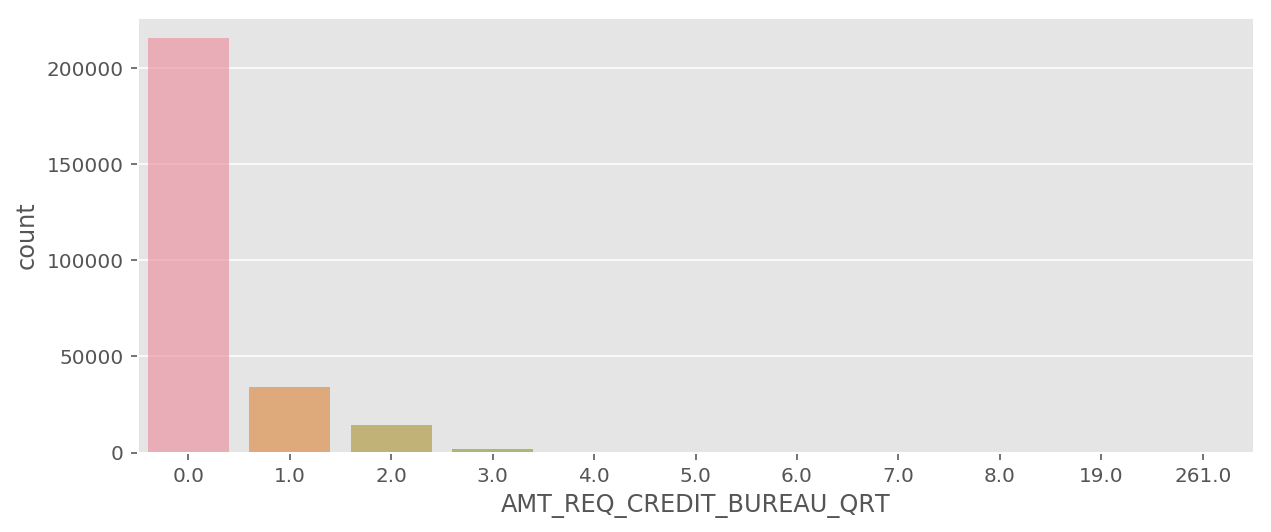

REG_CITY_NOT_WORK_CITY: 

Flag if client's permanent address does not match work address (1=different, 0=same, at city level)

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: REG_CITY_NOT_WORK_CITY, dtype: float64

    Percent   Total
0  0.769546  236644
1  0.230454   70867


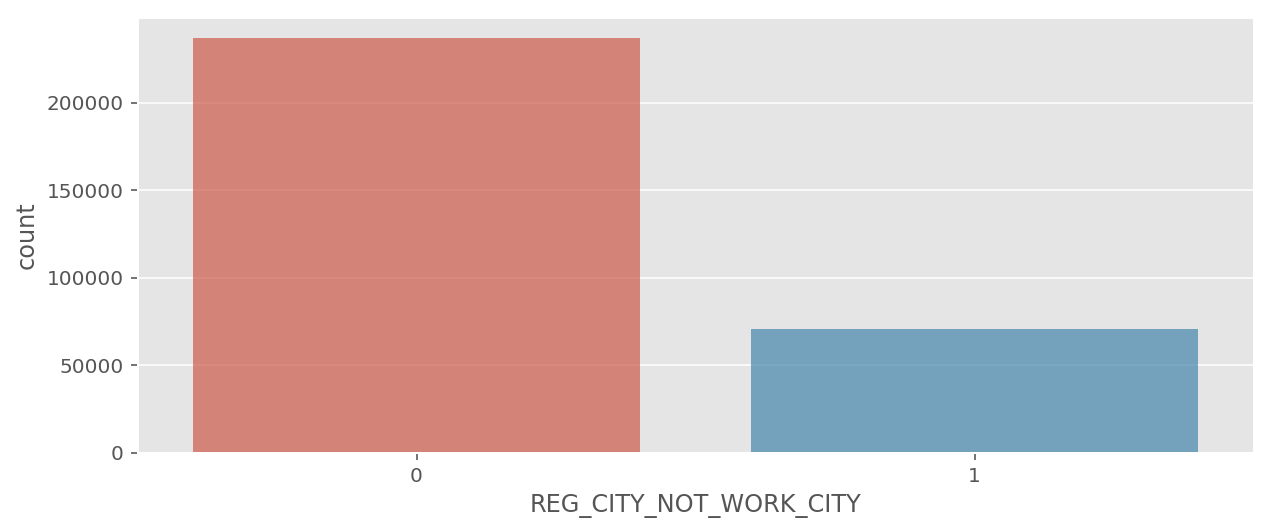

AMT_REQ_CREDIT_BUREAU_DAY: 

Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)

Table: ['application_{train|test}.csv']

Missing values:
Total      41519.000000
Percent       13.501631
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

      Percent   Total
0.0  0.994402  264503
1.0  0.004857    1292
2.0  0.000399     106
3.0  0.000169      45
4.0  0.000098      26
5.0  0.000034       9
6.0  0.000030       8
9.0  0.000008       2
8.0  0.000004       1


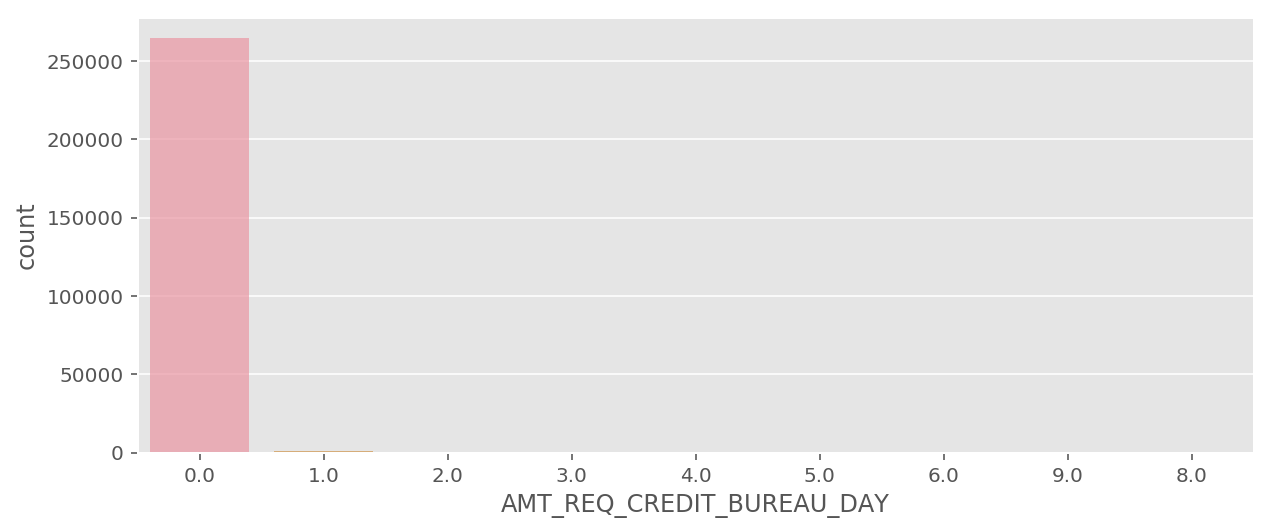

FLAG_DOCUMENT_9: 

Did client provide document 9

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_DOCUMENT_9, dtype: float64

    Percent   Total
0  0.996104  306313
1  0.003896    1198


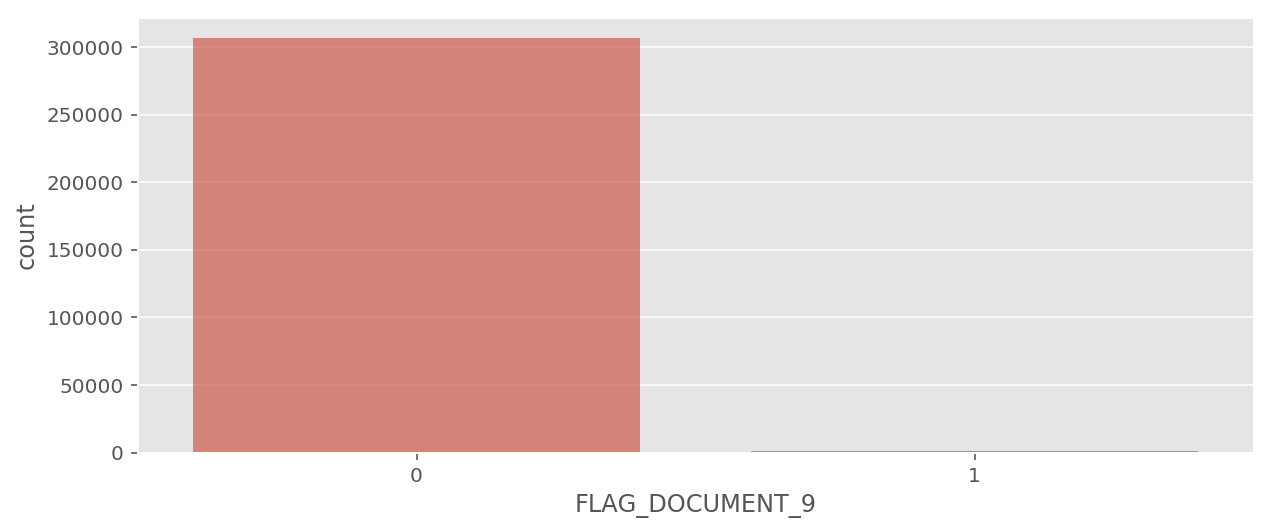

FLAG_DOCUMENT_13: 

Did client provide document 13

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_DOCUMENT_13, dtype: float64

    Percent   Total
0  0.996475  306427
1  0.003525    1084


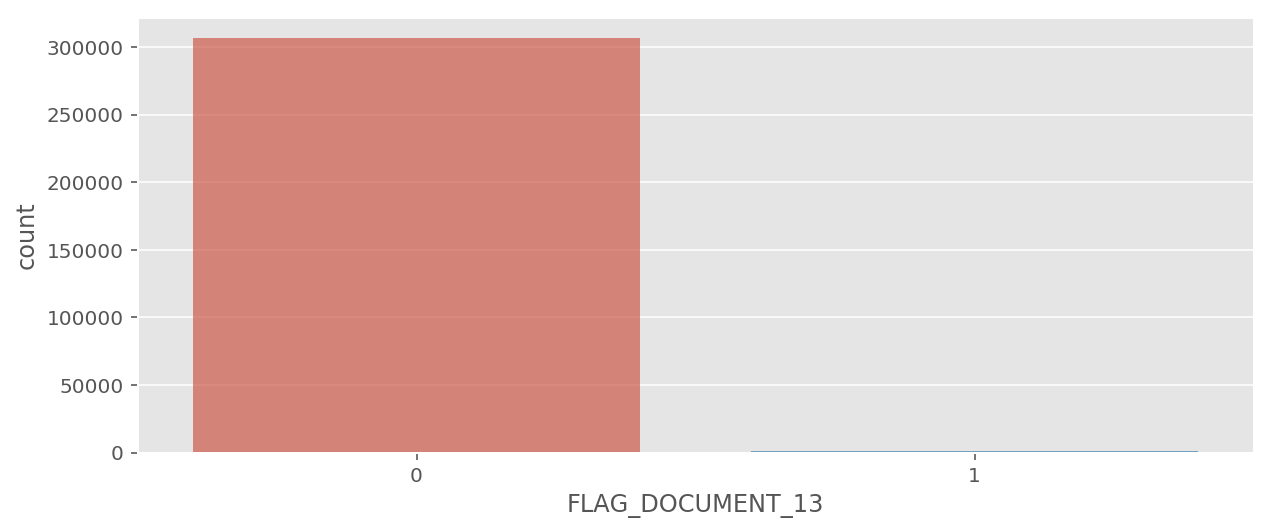

EMERGENCYSTATE_MODE: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      145755.000000
Percent        47.398304
Name: EMERGENCYSTATE_MODE, dtype: float64

      Percent   Total
No   0.985608  159428
Yes  0.014392    2328


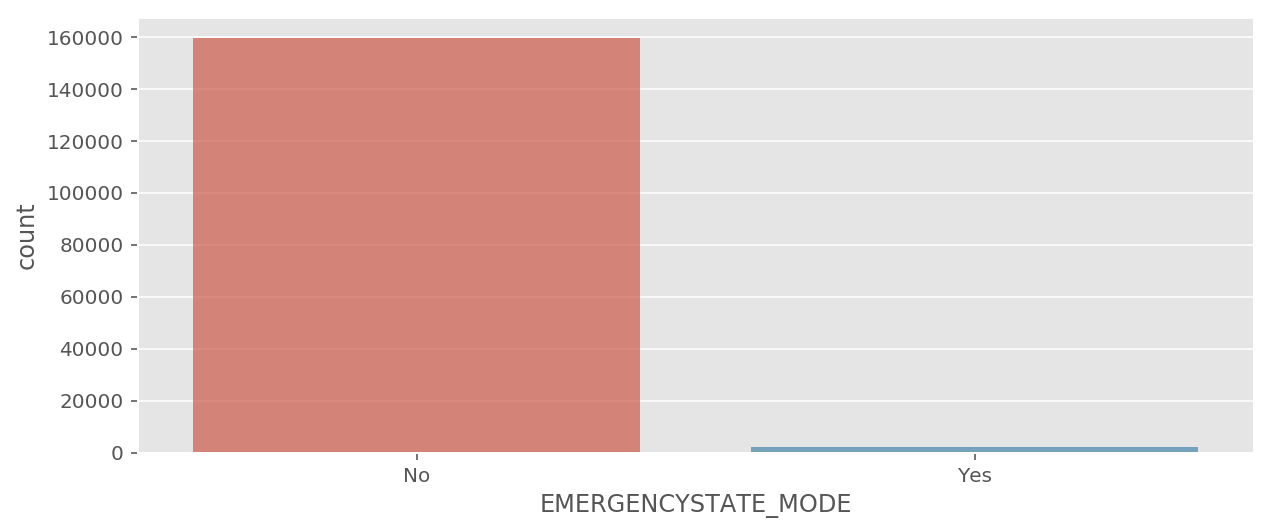

FLAG_CONT_MOBILE: 

Was mobile phone reachable (1=YES, 0=NO)

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_CONT_MOBILE, dtype: float64

    Percent   Total
1  0.998133  306937
0  0.001867     574


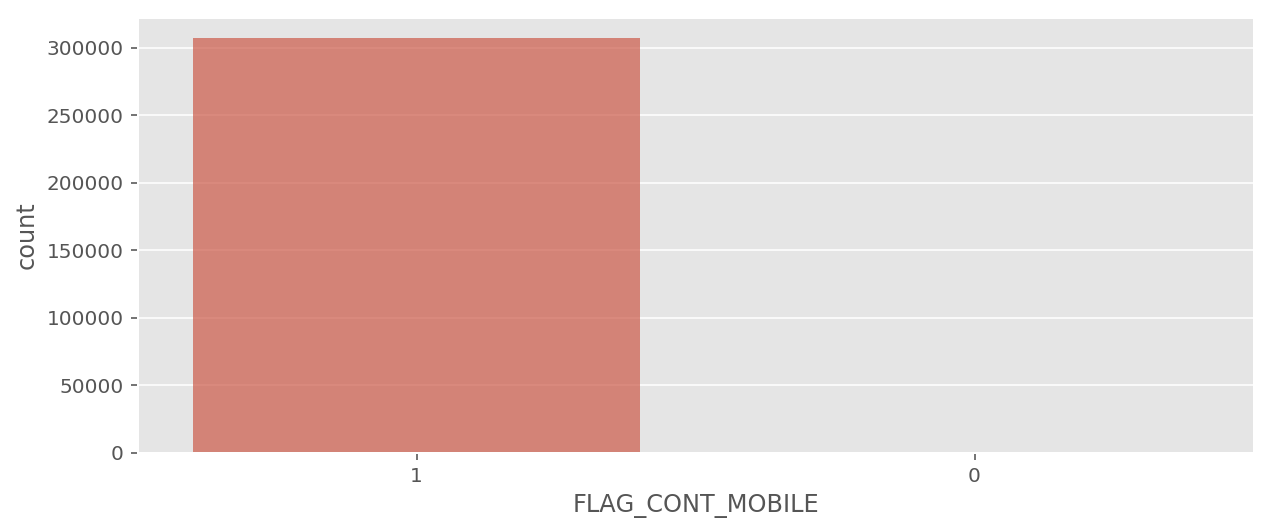

HOUSETYPE_MODE: 

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Table: ['application_{train|test}.csv']

Missing values:
Total      154297.000000
Percent        50.176091
Name: HOUSETYPE_MODE, dtype: float64

                   Percent   Total
block of flats    0.982306  150503
specific housing  0.009784    1499
terraced house    0.007911    1212


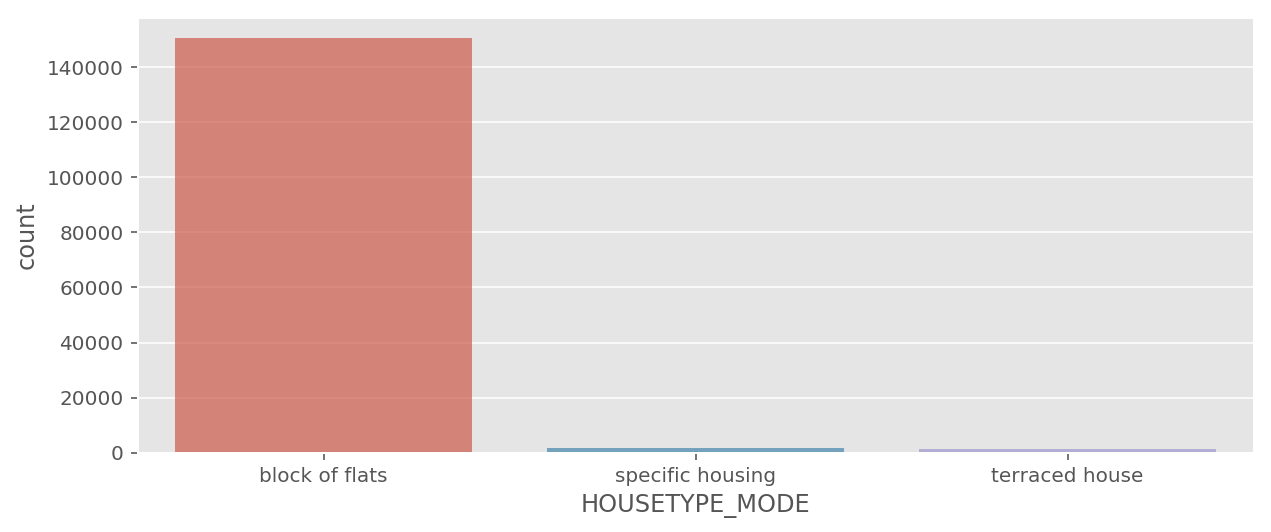

CNT_FAM_MEMBERS: 

How many family members does client have

Table: ['application_{train|test}.csv']

Missing values:
Total      2.00000
Percent    0.00065
Name: CNT_FAM_MEMBERS, dtype: float64

       Percent   Total
2.0   0.514967  158357
1.0   0.220634   67847
3.0   0.171055   52601
4.0   0.080313   24697
5.0   0.011310    3478
6.0   0.001327     408
7.0   0.000263      81
8.0   0.000065      20
9.0   0.000020       6
10.0  0.000010       3
14.0  0.000007       2
16.0  0.000007       2
12.0  0.000007       2
20.0  0.000007       2
11.0  0.000003       1
13.0  0.000003       1
15.0  0.000003       1


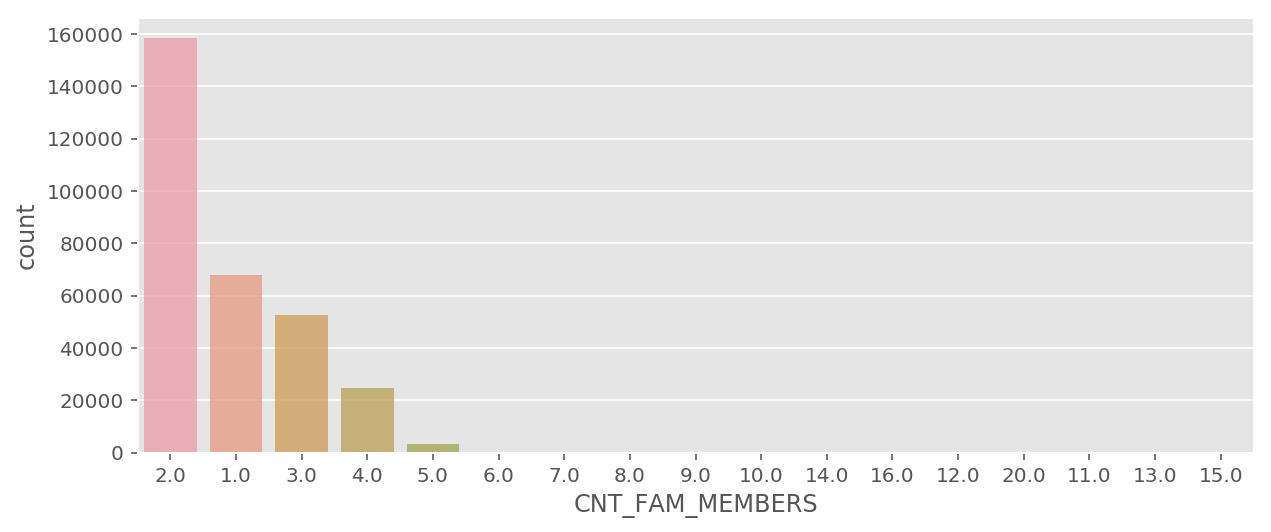

REGION_RATING_CLIENT: 

Our rating of the region where client lives (1,2,3)

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: REGION_RATING_CLIENT, dtype: float64

    Percent   Total
2  0.738133  226984
3  0.157165   48330
1  0.104702   32197


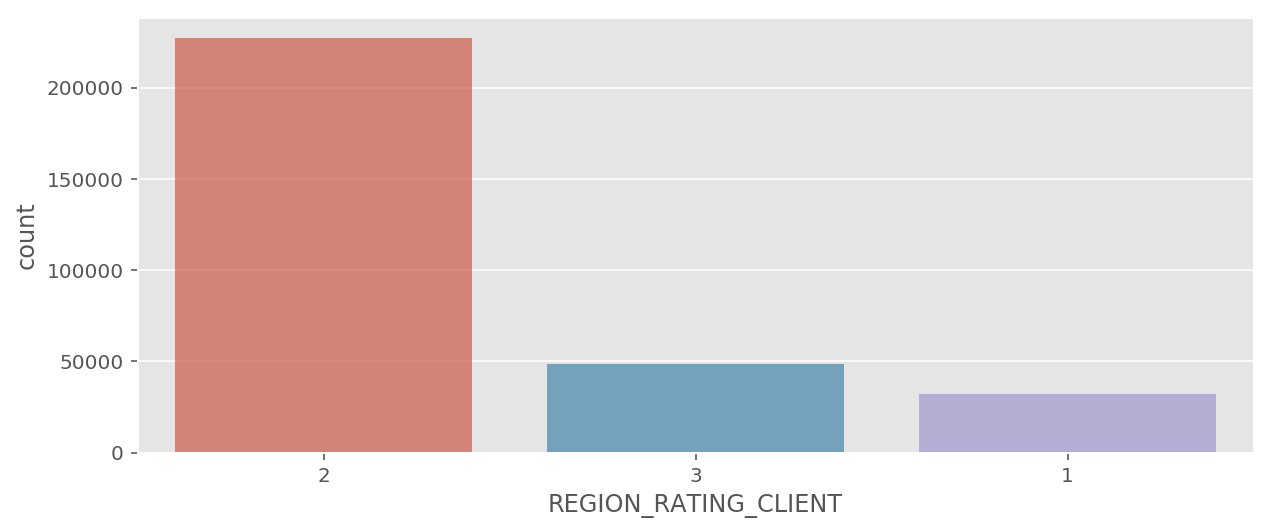

FLAG_EMP_PHONE: 

Did client provide work phone (1=YES, 0=NO)

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_EMP_PHONE, dtype: float64

    Percent   Total
1  0.819889  252125
0  0.180111   55386


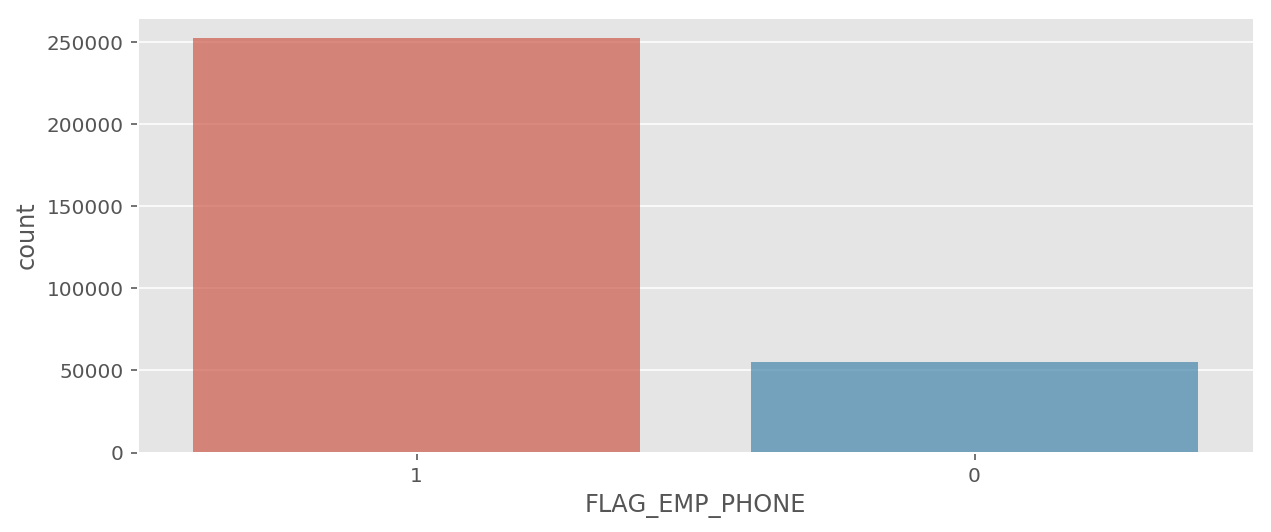

FLAG_MOBIL: 

Did client provide mobile phone (1=YES, 0=NO)

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_MOBIL, dtype: float64

    Percent   Total
1  0.999997  307510
0  0.000003       1


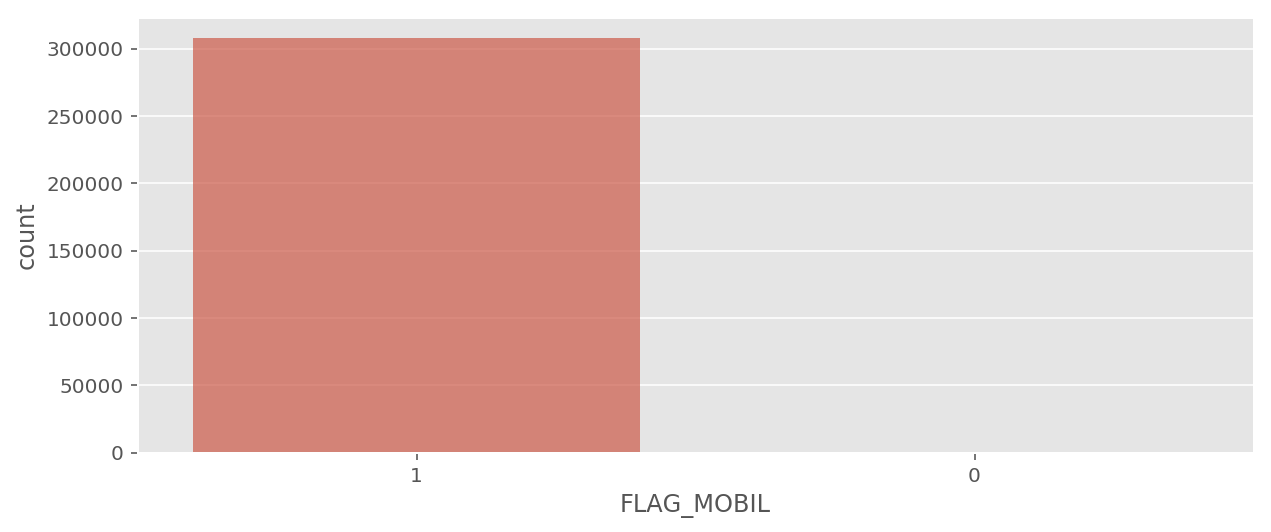

FLAG_DOCUMENT_5: 

Did client provide document 5

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_DOCUMENT_5, dtype: float64

    Percent   Total
0  0.984885  302863
1  0.015115    4648


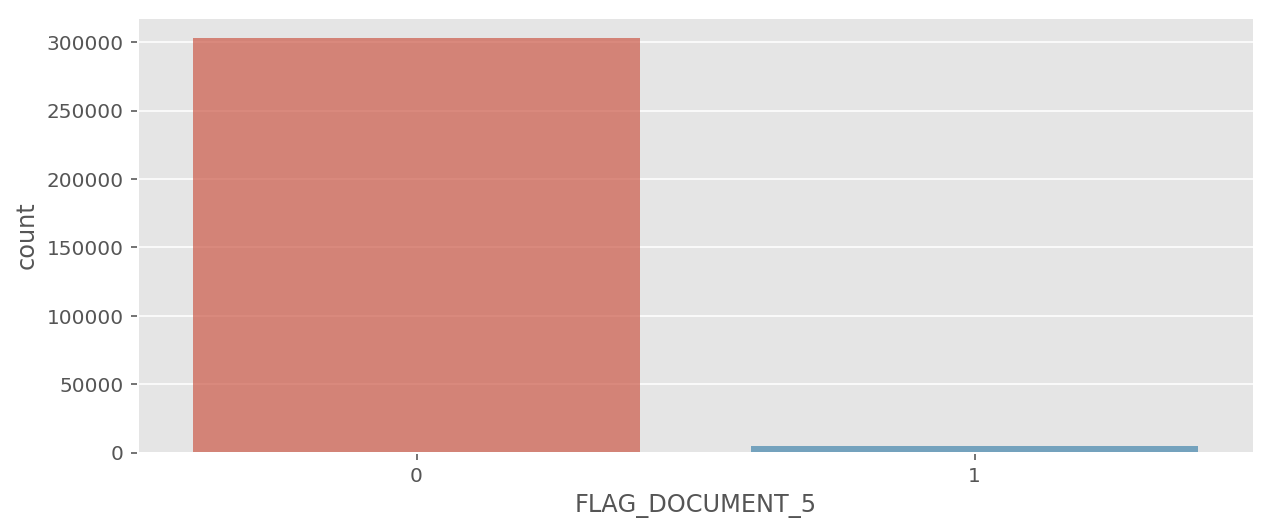

TARGET: 

Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: TARGET, dtype: float64

    Percent   Total
0  0.919271  282686
1  0.080729   24825


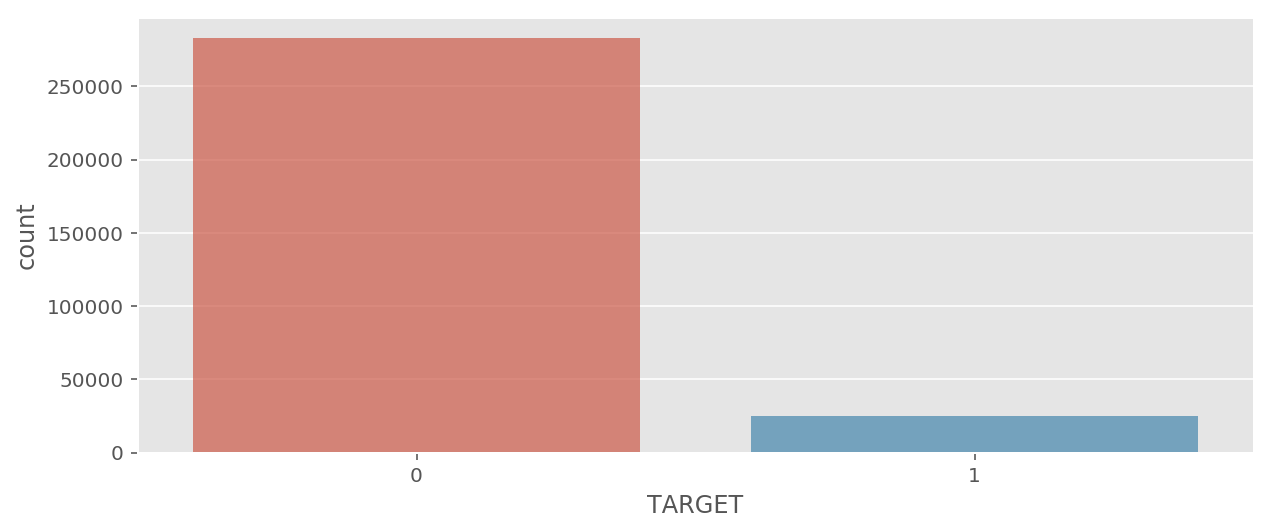

CNT_CHILDREN: 

Number of children the client has

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: CNT_CHILDREN, dtype: float64

     Percent   Total
0   0.700368  215371
1   0.198754   61119
2   0.086986   26749
3   0.012087    3717
4   0.001395     429
5   0.000273      84
6   0.000068      21
7   0.000023       7
14  0.000010       3
19  0.000007       2
12  0.000007       2
10  0.000007       2
9   0.000007       2
8   0.000007       2
11  0.000003       1


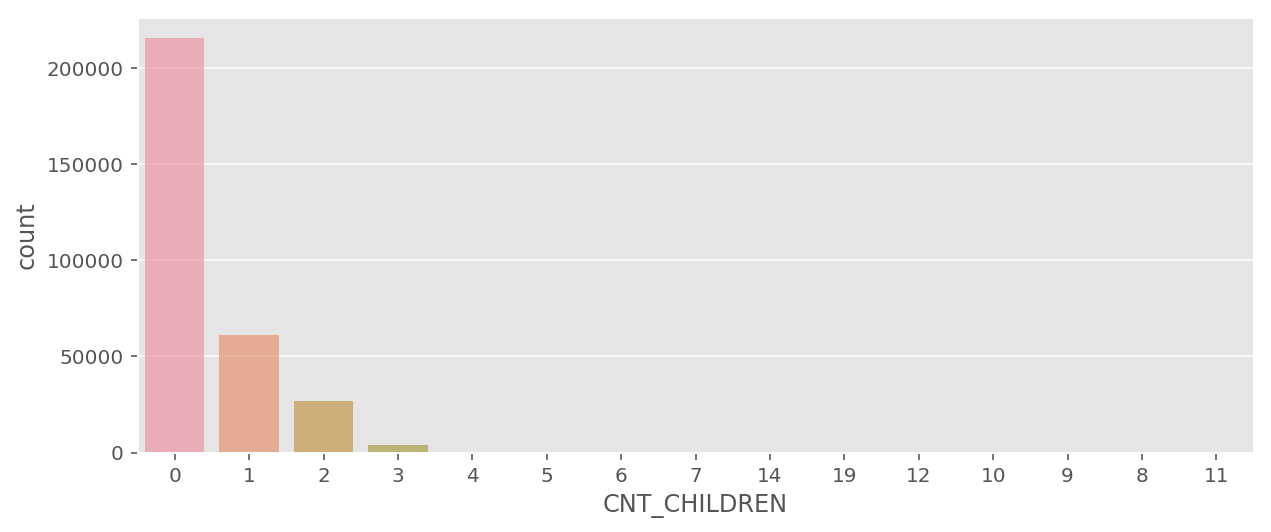

NAME_HOUSING_TYPE: 

What is the housing situation of the client (renting, living with parents, ...)

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: NAME_HOUSING_TYPE, dtype: float64

                      Percent   Total
House / apartment    0.887344  272868
With parents         0.048258   14840
Municipal apartment  0.036366   11183
Rented apartment     0.015873    4881
Office apartment     0.008510    2617
Co-op apartment      0.003649    1122


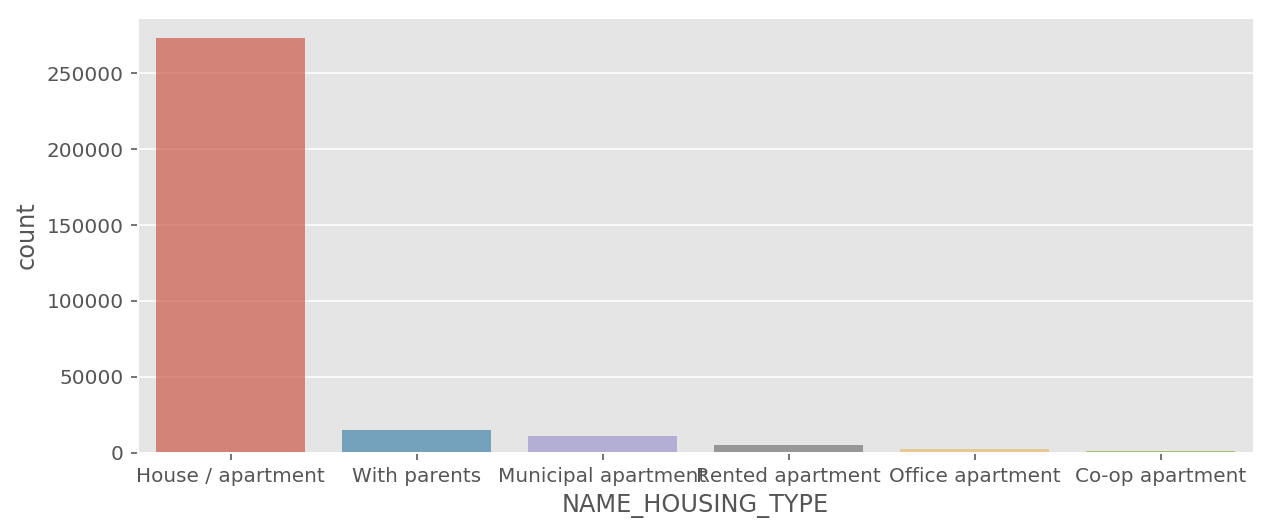

DEF_30_CNT_SOCIAL_CIRCLE: 

How many observation of client's social surroundings defaulted on 30 DPD (days past due) 

Table: ['application_{train|test}.csv']

Missing values:
Total      1021.000000
Percent       0.332021
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

       Percent   Total
0.0   0.885262  271324
1.0   0.092427   28328
2.0   0.017368    5323
3.0   0.003889    1192
4.0   0.000825     253
5.0   0.000183      56
6.0   0.000036      11
7.0   0.000003       1
8.0   0.000003       1
34.0  0.000003       1


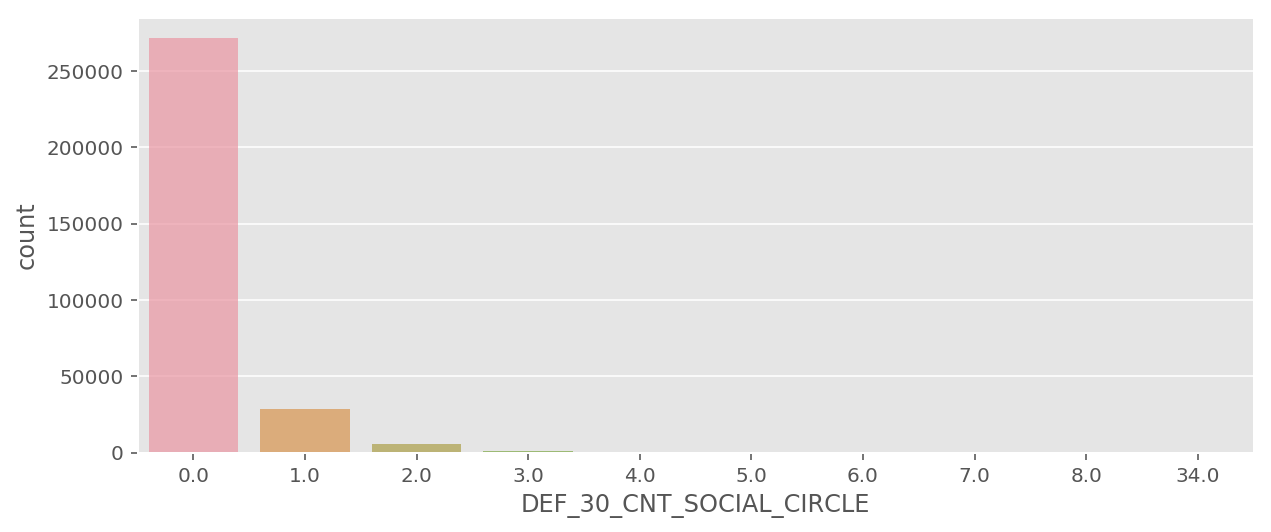

FLAG_WORK_PHONE: 

Did client provide home phone (1=YES, 0=NO)

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_WORK_PHONE, dtype: float64

    Percent   Total
0  0.800632  246203
1  0.199368   61308


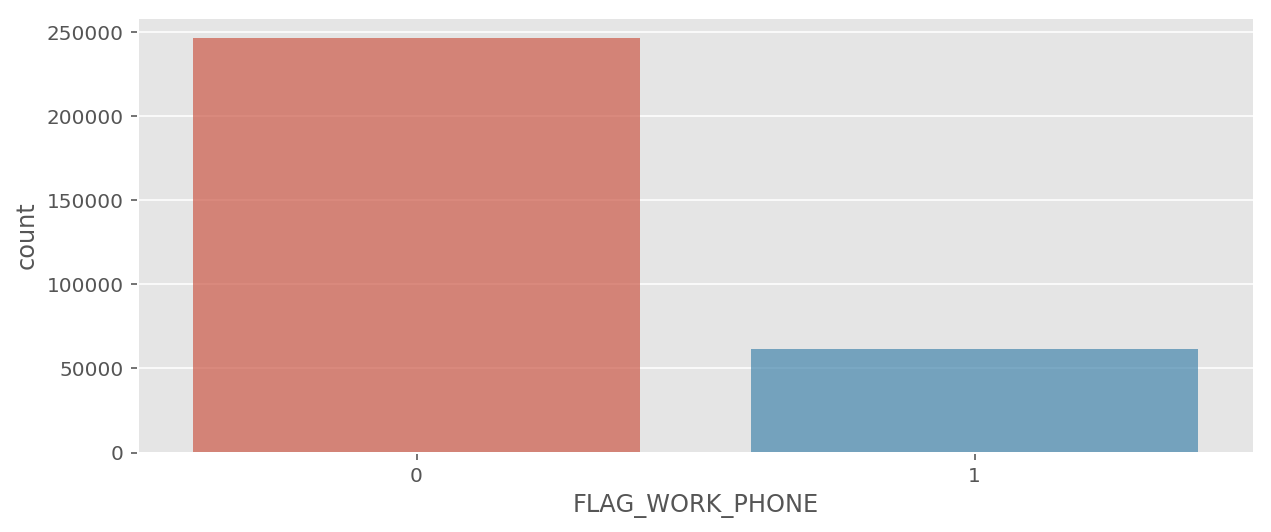

FLAG_DOCUMENT_8: 

Did client provide document 8

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: FLAG_DOCUMENT_8, dtype: float64

    Percent   Total
0  0.918624  282487
1  0.081376   25024


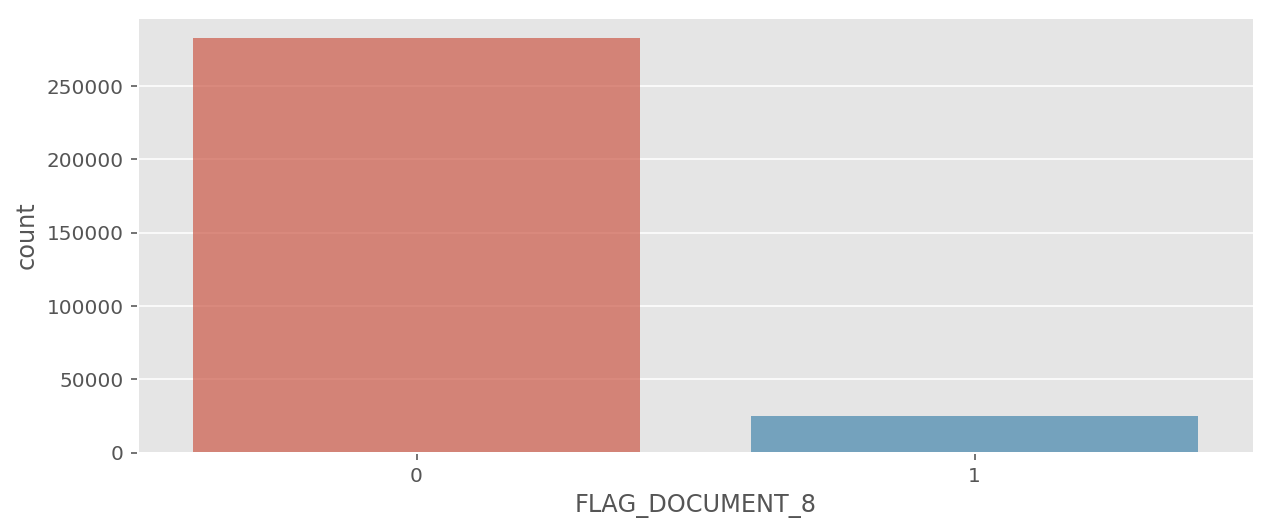

AMT_REQ_CREDIT_BUREAU_WEEK: 

Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)

Table: ['application_{train|test}.csv']

Missing values:
Total      41519.000000
Percent       13.501631
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

      Percent   Total
0.0  0.967909  257456
1.0  0.030858    8208
2.0  0.000748     199
3.0  0.000218      58
4.0  0.000128      34
6.0  0.000075      20
5.0  0.000038      10
8.0  0.000019       5
7.0  0.000008       2


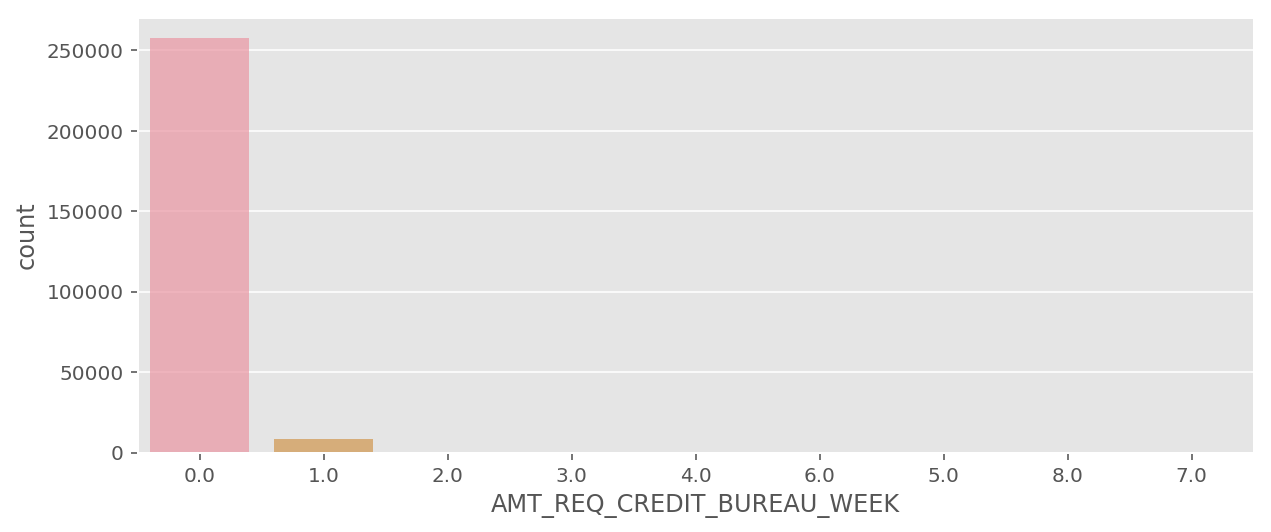

NAME_TYPE_SUITE: 

Who was accompanying client when he was applying for the loan

Who accompanied client when applying for the previous application

Table: ['application_{train|test}.csv' 'previous_application.csv']

Missing values:
Total      1292.000000
Percent       0.420148
Name: NAME_TYPE_SUITE, dtype: float64

                  Percent   Total
Unaccompanied    0.811596  248526
Family           0.131112   40149
Spouse, partner  0.037130   11370
Children         0.010669    3267
Other_B          0.005780    1770
Other_A          0.002828     866
Group of people  0.000885     271


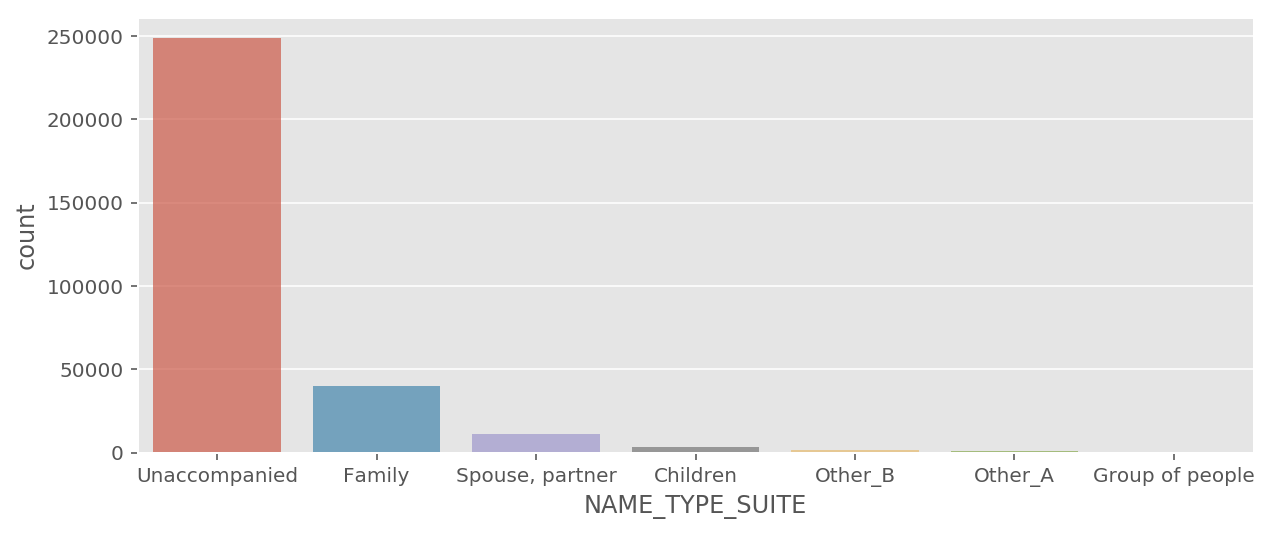

DEF_60_CNT_SOCIAL_CIRCLE: 

How many observation of client's social surroundings defaulted on 60 (days past due) DPD

Table: ['application_{train|test}.csv']

Missing values:
Total      1021.000000
Percent       0.332021
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

       Percent   Total
0.0   0.915922  280721
1.0   0.071262   21841
2.0   0.010343    3170
3.0   0.001951     598
4.0   0.000440     135
5.0   0.000065      20
6.0   0.000010       3
24.0  0.000003       1
7.0   0.000003       1


In [101]:
for col in cat_cols:
    col_name(col, col_description)
    pct = application_train[col].value_counts(1)
    cnt = application_train[col].value_counts()
    cnt_table = pd.concat([pct, cnt], axis=1, keys=['Percent', 'Total'])
    print('Missing values:\n{}'.format(missing_application_train_data.loc[col,:]) + '\n')
    print(cnt_table)
    
    plot_data(col, application_train, numeric=False)